# List of changes

8/17
initial state is 0 so that activity is positive.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np; np.set_printoptions(precision=2); np.random.seed(0)
import torch; torch.set_printoptions(precision=2)
seed = 1

torch.manual_seed(seed)
import torch.nn as nn
import matplotlib.pyplot as plt; plt.rc('font', size=50); plt.rc('font', family='Arial')
import matplotlib 
from matplotlib.font_manager import FontProperties
from mpl_toolkits import mplot3d

import seaborn as sns
import time
import sys
import itertools
import random; random.seed(0)
import datetime
import pickle
import copy
import pandas as pd
import scipy
import os

from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

import sys
sys.path.append("../two_module_rnn/code")
from model import *
from task import *
from functions import *

os.chdir('/home/yl4317/Documents/two_module_rnn/')

print(torch.__version__)
print(sys.version)
                
%matplotlib inline

1.9.0+cu111
3.8.6 (default, Oct 11 2020, 20:34:31) 
[GCC Intel(R) C++ gcc 8.3.1 mode]


# Train the network

In [3]:
""" 
    7/22/2021
    Fusi task, with trial history info. SimpleNet is able to switch after 1 error trial after 
    ~10^3 switches. Seems much more difficult for the 2AreaNet. Maybe add noise to the sensory stim?
    
    Fusi task (1 timestep for each epoch), trial history info. 2AreaNet with previous stimulus, choice and reward
    info given to the PFC each trial and PFC is reset at the start of each trial 
    is able to switch after 1 error trial after training on ~3000 switches. 
    Trying only giving PFC the previous reward information and not reset PFC.
    Then try longer task and the Siegel task.
"""

' \n    7/22/2021\n    Fusi task, with trial history info. SimpleNet is able to switch after 1 error trial after \n    ~10^3 switches. Seems much more difficult for the 2AreaNet. Maybe add noise to the sensory stim?\n    \n    Fusi task (1 timestep for each epoch), trial history info. 2AreaNet with previous stimulus, choice and reward\n    info given to the PFC each trial and PFC is reset at the start of each trial \n    is able to switch after 1 error trial after training on ~3000 switches. \n    Trying only giving PFC the previous reward information and not reset PFC.\n    Then try longer task and the Siegel task.\n'

# Analysis

success_20211015_SRonlytoPFCPV_oldGetPerf_newTask_varDelay_hpSearch_bpxtrials_2021-10-17-06-26-00
yes
1
self.train_rule=True
create self.w_out_rule
{'loss_type': 'mse', 'initialization_weights': 'kaiming_normal', 'initialization_bias': 'zero', 'optimizer': 'see optimizer', 'activation': 'relu', 'tau': 100, 'dt': 50, 'l1_h': 0, 'l2_h': 0.0001, 'l1_weight': 0, 'l2_weight': 0, 'l2_rec_e_weight_sr': 0, 'l2_h_sr': 0, 'l2_h_pfc': 0, 'target_perf': 1, 'n_input': 5, 'n_input_rule_cue': 4, 'n_output': 3, 'n_output_rule': 2, 'n_sr_esoma': 70, 'n_sr_edend': 70, 'n_sr_pv': 10, 'n_sr_sst': 10, 'n_sr_vip': 10, 'n_pfc_esoma': 70, 'n_pfc_edend': 70, 'n_pfc_pv': 10, 'n_pfc_sst': 10, 'n_pfc_vip': 10, 'save_model': True, 'save_figures': True, 'save_name': 'test_2AreaNet_prevrew_notresetPFC_easy&shortFusiTask_TrainRule_softgate_dend-1_fixOutRuleWeight_seedNA_block_siegel_2021-10-17-06-26-00', 'learning_rate': 0.001, 'explicit_rule': False, 'train_rule': True, 'n_batches_per_block': 200000000, 'n_blocks': 

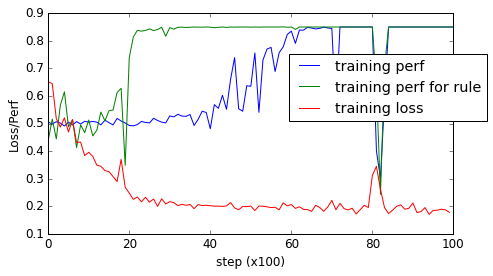

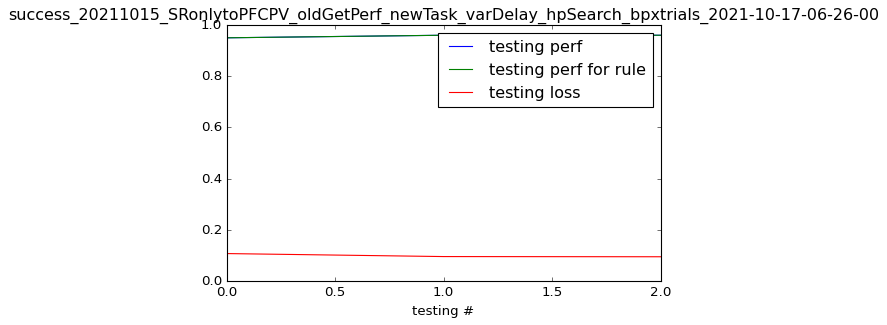

In [4]:
# Load model
# name = '3switches_600ms_12ts_test_2021-09-14-19-26-02'
# name = 'test_bp1tr_reducedModel_varDelay2021-10-07-17-40-40'
# name = 'success_20211007_newTask_varDelay_reducedModel_hpSearch_bpxtrials_2021-10-08-06-49-38'
# name = 'success_20211013_oldGetPerf_newTask_varDelay_fullModel_hpSearch_bpxtrials_2021-10-14-04-35-41'
# name = 'success_20211013_oldGetPerf_newTask_varDelay_fullModel_hpSearch_bpxtrials_2021-10-13-19-16-12'
# name = 'success_20211015_SRonlytoPFCPV_oldGetPerf_newTask_varDelay_hpSearch_bpxtrials_2021-10-16-00-29-48'
name = 'success_20211015_SRonlytoPFCPV_oldGetPerf_newTask_varDelay_hpSearch_bpxtrials_2021-10-17-06-26-00'    # used for lab meeting
# name = 'success_20211015_SRonlytoPFCPV_oldGetPerf_newTask_varDelay_hpSearch_bpxtrials_2021-10-17-06-11-06'
# name = 'success_20211015_SRonlytoPFCPV_oldGetPerf_newTask_varDelay_hpSearch_bpxtrials_2021-10-18-18-19-46'
# name= 'success_20211015_SRonlytoPFCPV_oldGetPerf_newTask_varDelay_hpSearch_bpxtrials_2021-10-19-23-58-26'
# name = 'success_20211021_useReLUforWeff_SRonlytoPFCPV_oldGetPerf_newTask_varDelay_hpSearch_bpxtrials_2021-10-21-16-12-20'
# name = 'success_20211021_useReLUforWeff_SRonlytoPFCPV_oldGetPerf_newTask_varDelay_hpSearch_bpxtrials_2021-10-23-07-34-38'
# name = 'success_20211021_useReLUforWeff_SRonlytoPFCPV_oldGetPerf_newTask_varDelay_hpSearch_bpxtrials_2021-10-23-12-50-48'
# name = 'success_20211021_useReLUforWeff_SRonlytoPFCPV_oldGetPerf_newTask_varDelay_hpSearch_bpxtrials_2021-10-23-16-06-34'
# name = 'success_20211104_randomInitRule_useReLUforWeff_SRonlytoPFCPV_oldGetPerf_newTask_varDelay_hpSearch_bpxtrials            _init=orthogonal_l2h=1e-05_torchseed=1_lr=0'
# name = 'success_20211104_randomInitRule_useReLUforWeff_SRonlytoPFCPV_oldGetPerf_newTask_varDelay_hpSearch_bpxtrials            _init=kaiming_uniform_l2h=1e-05_torchseed=1_lr=0'
# name = 'success_20211110_testwithnoise_randomInitRule_useReLUforWeff_SRonlytoPFCPV_oldGetPerf_newTask_varDelay_hpSearch_bpxtrials_init=kaiming_uniform_l2h=0.001_torchseed=1_lr=0.001_optim=Adam_2021-11-12-21-45-11'
# name = 'success_2021-11-24-16-19-14_salzman_correctWfix_2branches_testwithnoise_randomInitRule_useReLUforWeff_SRonlytoPFCPV_varDelay_hpSearch_bpxtrials_init=kaiming_uniform_l2h=0.0001_torchseed=1_lr=0.001_optim=Adam'


for model_name in os.listdir('saved_models/'):
    if model_name.startswith(name):
        print(model_name)
        
        model, hp_test, hp_task_test, optim, saved_data = load_model(name=model_name, simple=False)

        # make noiseless
#         model.rnn.network_noise = 0
#         hp_test['input_noise_perceptual'] = 0
#         hp_test['input_noise_rule'] = 0


        print(hp_test)
        print('\n')
        print(hp_task_test)
        print('\n')
        print(saved_data['optimizer'])

        # plot the trainig and testing performance
        fig = plt.figure(figsize=[7,4])
        fig.patch.set_facecolor('white')
        plt.style.use('classic')
#         plt.title(model_name)
        plt.plot(saved_data['perf_list'], label='training perf')
        plt.plot(saved_data['perf_rule_list'], label='training perf for rule')
        plt.plot(saved_data['loss_list'][1:], label='training loss')
        plt.legend(bbox_to_anchor=(1.1, 0.85))
        plt.xlabel('step (x100)')
        plt.ylabel('Loss/Perf')
        fig.tight_layout()
        plt.show()


        fig = plt.figure(figsize=[7,4])
        fig.patch.set_facecolor('white')
        plt.style.use('classic')
        plt.title(model_name)
        plt.plot(saved_data['test_perf_list'], label='testing perf')
        plt.plot(saved_data['test_perf_rule_list'], label='testing perf for rule')
        plt.plot(saved_data['test_loss_list'], label='testing loss')
        plt.xlabel('testing #')
        plt.legend()
        plt.show()

sr_esoma is connected to sr_esoma


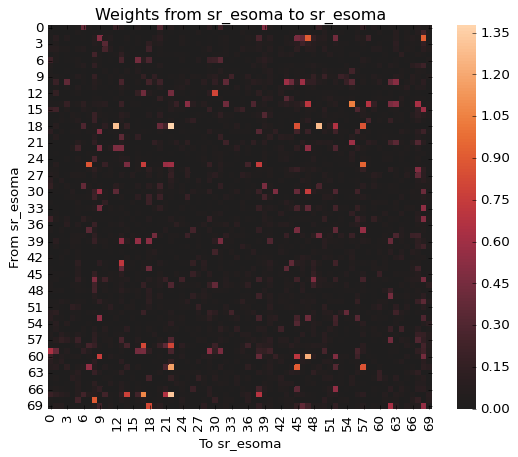

sr_esoma is not connected to sr_edend
sr_esoma is connected to sr_pv


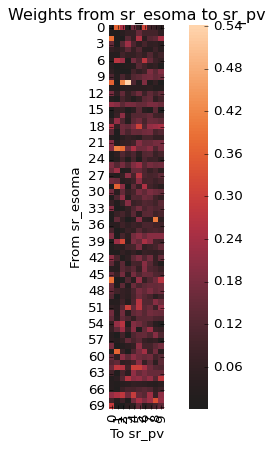

sr_esoma is connected to sr_sst


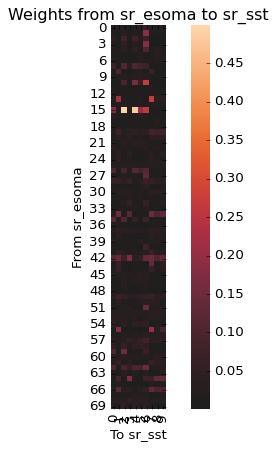

sr_esoma is not connected to sr_vip
sr_esoma is not connected to pfc_esoma
sr_esoma is connected to pfc_edend


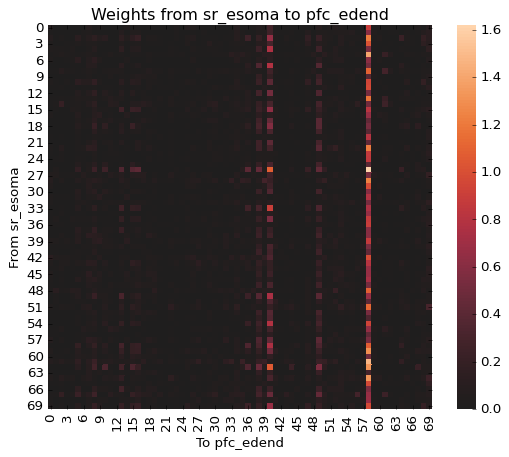

sr_esoma is connected to pfc_pv


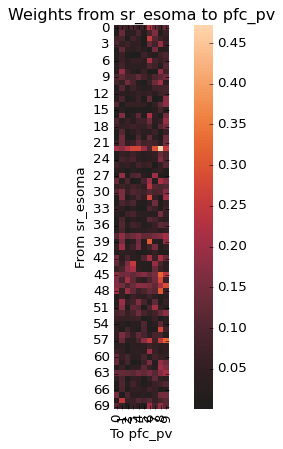

sr_esoma is not connected to pfc_sst
sr_esoma is not connected to pfc_vip
sr_edend is connected to sr_esoma


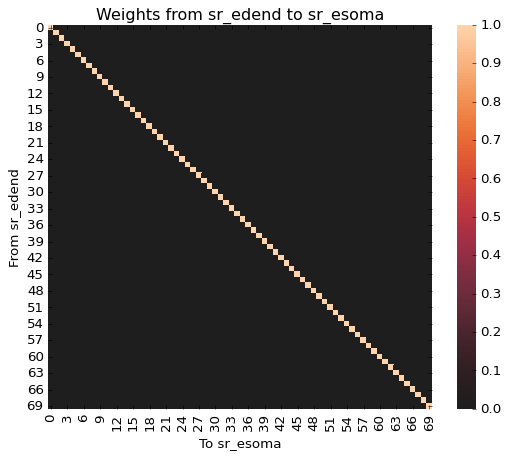

sr_edend is not connected to sr_edend
sr_edend is not connected to sr_pv
sr_edend is not connected to sr_sst
sr_edend is not connected to sr_vip
sr_edend is not connected to pfc_esoma
sr_edend is not connected to pfc_edend
sr_edend is not connected to pfc_pv
sr_edend is not connected to pfc_sst
sr_edend is not connected to pfc_vip
sr_pv is connected to sr_esoma


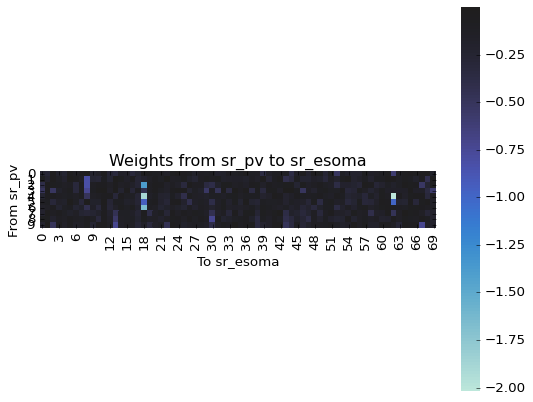

sr_pv is not connected to sr_edend
sr_pv is connected to sr_pv


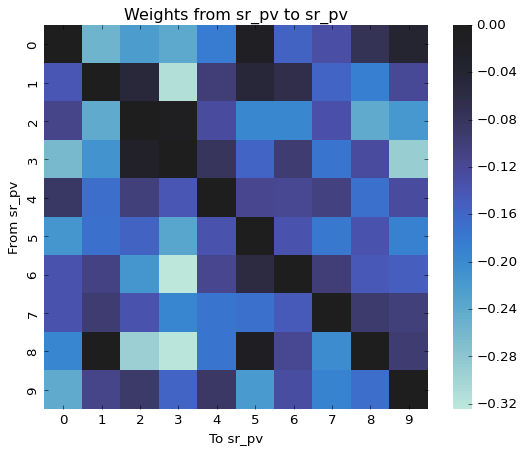

sr_pv is not connected to sr_sst
sr_pv is not connected to sr_vip
sr_pv is not connected to pfc_esoma
sr_pv is not connected to pfc_edend
sr_pv is not connected to pfc_pv
sr_pv is not connected to pfc_sst
sr_pv is not connected to pfc_vip
sr_sst is not connected to sr_esoma
sr_sst is connected to sr_edend


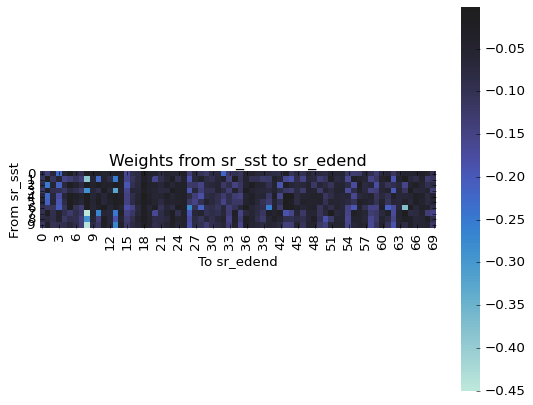

sr_sst is connected to sr_pv


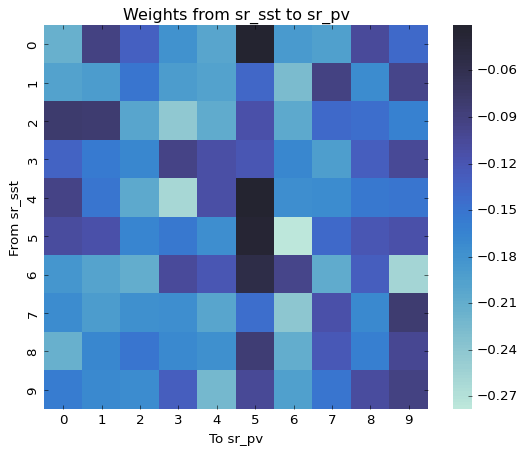

sr_sst is not connected to sr_sst
sr_sst is connected to sr_vip


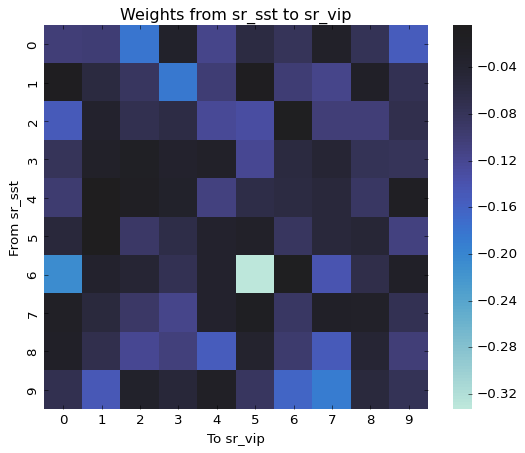

sr_sst is not connected to pfc_esoma
sr_sst is not connected to pfc_edend
sr_sst is not connected to pfc_pv
sr_sst is not connected to pfc_sst
sr_sst is not connected to pfc_vip
sr_vip is not connected to sr_esoma
sr_vip is not connected to sr_edend
sr_vip is not connected to sr_pv
sr_vip is connected to sr_sst


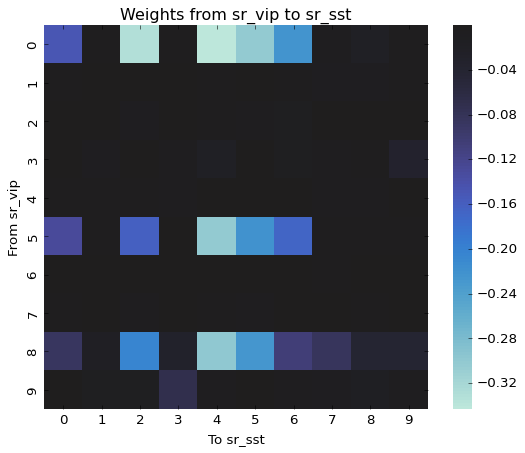

sr_vip is not connected to sr_vip
sr_vip is not connected to pfc_esoma
sr_vip is not connected to pfc_edend
sr_vip is not connected to pfc_pv
sr_vip is not connected to pfc_sst
sr_vip is not connected to pfc_vip
pfc_esoma is not connected to sr_esoma
pfc_esoma is not connected to sr_edend
pfc_esoma is not connected to sr_pv
pfc_esoma is not connected to sr_sst
pfc_esoma is connected to sr_vip


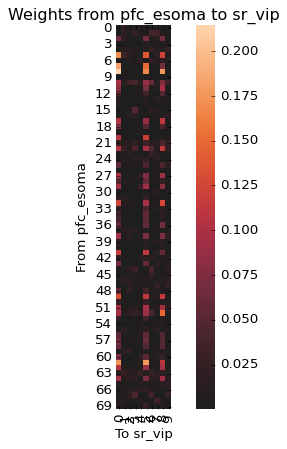

pfc_esoma is connected to pfc_esoma


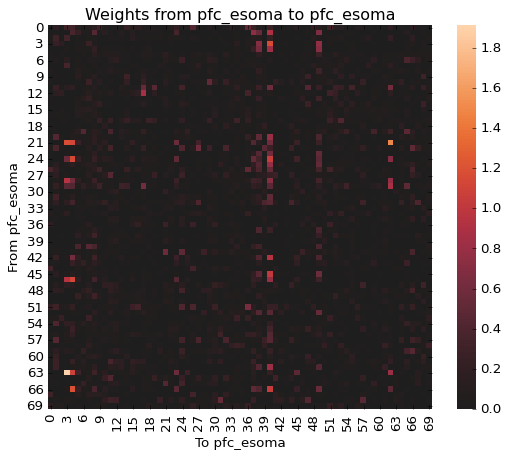

pfc_esoma is not connected to pfc_edend
pfc_esoma is connected to pfc_pv


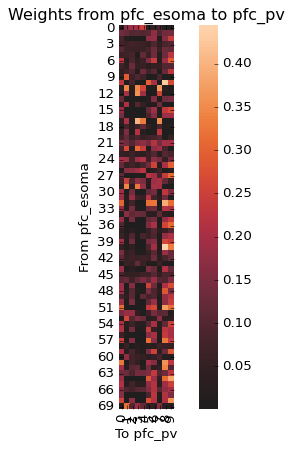

pfc_esoma is connected to pfc_sst


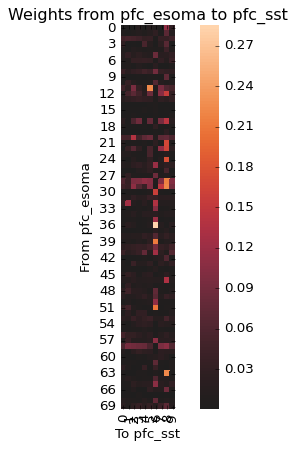

pfc_esoma is not connected to pfc_vip
pfc_edend is not connected to sr_esoma
pfc_edend is not connected to sr_edend
pfc_edend is not connected to sr_pv
pfc_edend is not connected to sr_sst
pfc_edend is not connected to sr_vip
pfc_edend is connected to pfc_esoma


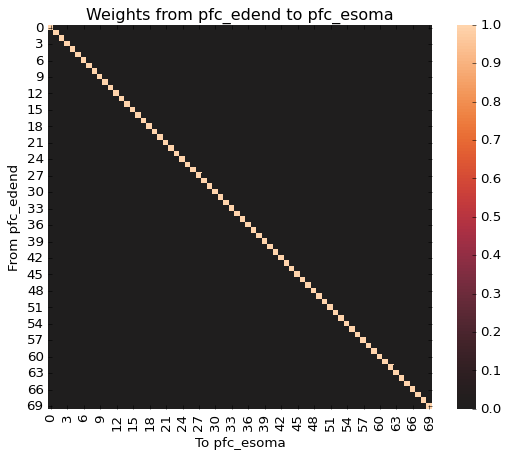

pfc_edend is not connected to pfc_edend
pfc_edend is not connected to pfc_pv
pfc_edend is not connected to pfc_sst
pfc_edend is not connected to pfc_vip
pfc_pv is not connected to sr_esoma
pfc_pv is not connected to sr_edend
pfc_pv is not connected to sr_pv
pfc_pv is not connected to sr_sst
pfc_pv is not connected to sr_vip
pfc_pv is connected to pfc_esoma


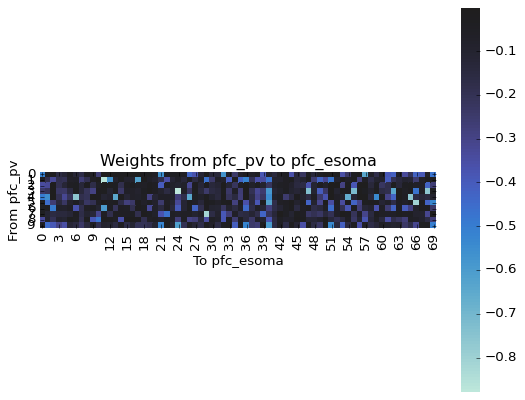

pfc_pv is not connected to pfc_edend
pfc_pv is connected to pfc_pv


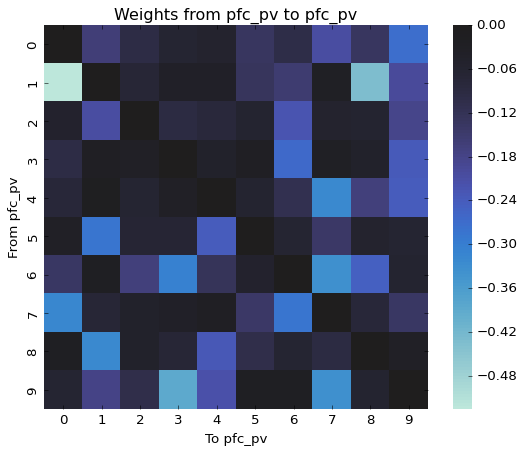

pfc_pv is not connected to pfc_sst
pfc_pv is not connected to pfc_vip
pfc_sst is not connected to sr_esoma
pfc_sst is not connected to sr_edend
pfc_sst is not connected to sr_pv
pfc_sst is not connected to sr_sst
pfc_sst is not connected to sr_vip
pfc_sst is not connected to pfc_esoma
pfc_sst is connected to pfc_edend


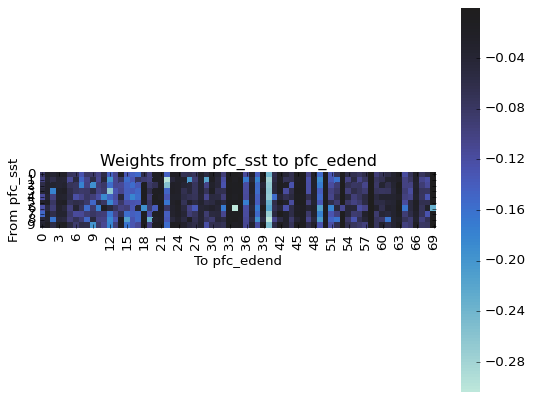

pfc_sst is connected to pfc_pv


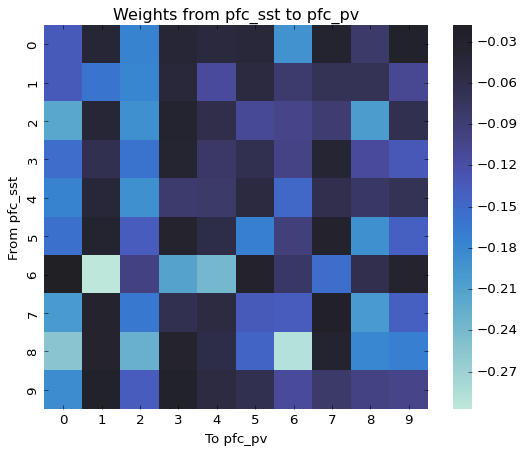

pfc_sst is not connected to pfc_sst
pfc_sst is connected to pfc_vip


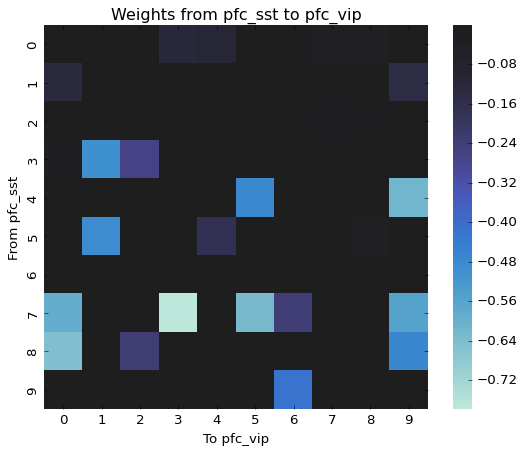

pfc_vip is not connected to sr_esoma
pfc_vip is not connected to sr_edend
pfc_vip is not connected to sr_pv
pfc_vip is not connected to sr_sst
pfc_vip is not connected to sr_vip
pfc_vip is not connected to pfc_esoma
pfc_vip is not connected to pfc_edend
pfc_vip is not connected to pfc_pv
pfc_vip is connected to pfc_sst


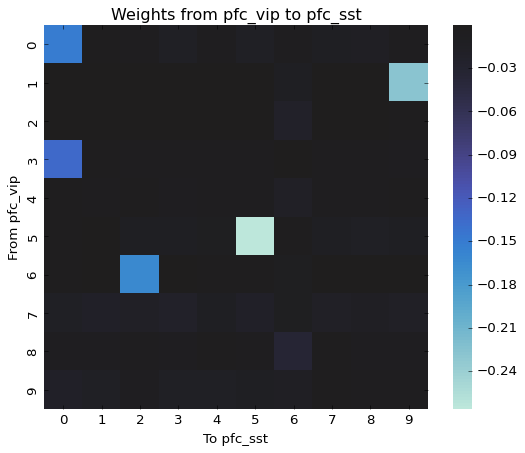

pfc_vip is not connected to pfc_vip


In [58]:
display_connectivity(model, plot=True)

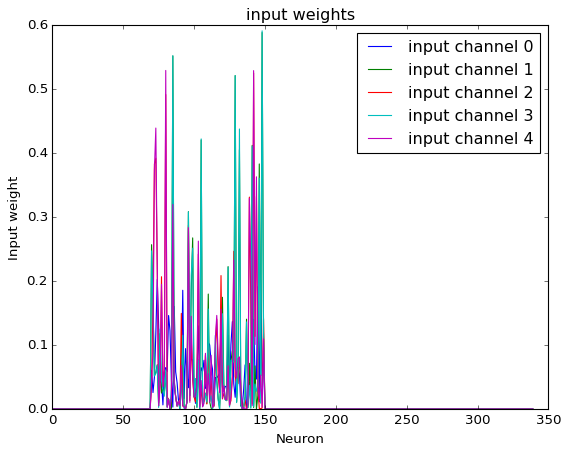

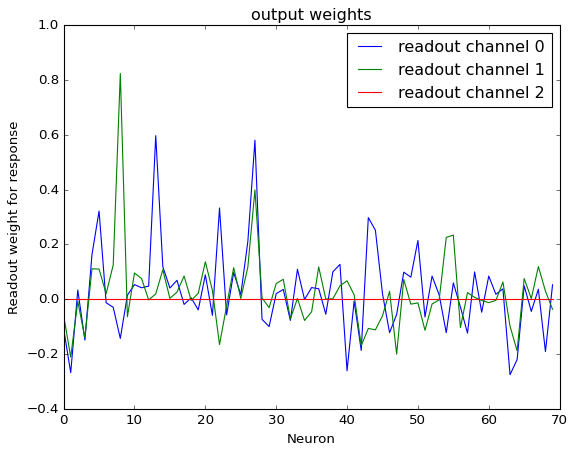

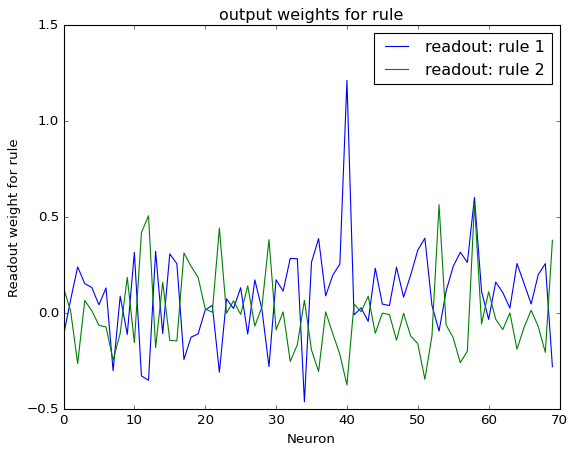

-0.589926
[[-0.59]]


In [21]:
# visualize w_in
w_in_eff = model.rnn.effective_weight(w=model.rnn.w_in, mask=model.rnn.mask_in).detach().cpu().numpy()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.style.use('classic')
plt.title('input weights')
for i in range(w_in_eff.shape[0]):
#     if i==0 or i==2 or i==4:
#         continue
    plt.plot(w_in_eff[i,:], label='input channel {}'.format(i))
plt.legend()
plt.xlabel('Neuron')
plt.ylabel('Input weight')
plt.show()


# visuzlize w_out
w_out_eff = (model.rnn.w_out*model.mask_out).detach().cpu().numpy()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.style.use('classic')
plt.title('output weights')
for i in range(w_out_eff.shape[1]):
#     if i==0 or i==2 or i==4:
#         continue
    plt.plot(w_out_eff[model.rnn.cg_idx['sr_esoma'],i], label='readout channel {}'.format(i))
plt.legend()
plt.xlabel('Neuron')
plt.ylabel('Readout weight for response')
plt.show()



# visualize w_out_rule
w_out_rule = (model.rnn.w_out_rule*model.mask_out_rule).detach().numpy()

# fig = plt.figure(figsize=[5,5])
# fig.patch.set_facecolor('white')
# plt.title('Readout weights for rule')
# sns.heatmap(w_out_rule, square=True)
# plt.show()

fig = plt.figure(); plt.rc('font', size=15)
fig.patch.set_facecolor('white')
plt.style.use('classic')
plt.title('output weights for rule')
plt.plot(w_out_rule[model.rnn.cg_idx['pfc_esoma'],0], label='readout: rule 1')
plt.plot(w_out_rule[model.rnn.cg_idx['pfc_esoma'],1], label='readout: rule 2')
plt.legend()
plt.xlabel('Neuron')
plt.ylabel('Readout weight for rule')
plt.show()

print(np.dot(w_out_rule[:, 0], w_out_rule[:, 1])/(np.linalg.norm(w_out_rule[:, 0]) * np.linalg.norm(w_out_rule[:, 1])))
print(cosine_similarity(w_out_rule[:,0].reshape(1,-1), w_out_rule[:,1].reshape(1,-1)))

In [38]:
# generate some neural data
n_trials_test=100; switch_every_test=10

# stretch the trial
# hp_task_test['resp_start'] += 2*hp_test['dt']
# hp_task_test['resp_end'] += 2*hp_test['dt']
# hp_task_test['trial_end'] = hp_task_test['resp_end']

# make the simulation noiseless
hp_test['network_noise'] = 0.0
hp_test['input_noise_perceptual'] = 0
hp_test['input_noise_rule'] = 0

model.rnn.batch_size = 50

plt.rcParams.update({'font.size': 12})

_, _, _, test_data = test_frozen_weights(model=model, n_trials_test=n_trials_test, switch_every_test=switch_every_test, 
                                         init_rule=random.choice(['cxt1', 'cxt2']), hp=hp_test, 
                                         loss_fnc=nn.MSELoss(), hp_task=hp_task_test, optim=optim,
                                         delay_var = 0, task='salzman',
                                         give_prev_choice=False, give_prev_stim=False, give_prev_rew=True, plot=False)

rnn_activity = torch.stack(test_data['rnn_activity'], dim=0)
rnn_activity = rnn_activity[:,0,:,:].unsqueeze(1)    # take the 1st sample in the batch

startfrom_tr = 20
trial_duration = (hp_task_test['trial_end'] - hp_task_test['trial_start'])/hp_test['dt']
startfrom_ts = int(startfrom_tr * trial_duration)
rnn_activity = rnn_activity[startfrom_tr:,:,:,:]    # get rid of the initial transient

for key in ['rules', 'stims', 'resps', 'perfs', 'perf_rules']:
    test_data[key] = test_data[key][startfrom_tr:]    # get rid of the initial transient
    

noise in hp: 0.0
noise in hp_copy: 0.0
mean test loss=0.1306, mean test perf=0.9100, mean test perf rule=0.9100, max test perf=0.9000, time=2.65s


In [24]:
# concatenate activity across trials
start = time.time()
rnn_activity_concat = concat_trials(rnn_activity)
print('{} seconds'.format(time.time()-start))
print(rnn_activity_concat.shape)

0.005953073501586914 seconds
torch.Size([1, 340, 1280])


In [25]:
# compute current
rnn_activity_moved = torch.movedim(rnn_activity.squeeze(1), 1, 2)    # n_trials * n_ts * n_neurons

n_neurons = rnn_activity.shape[-2]
n_timesteps = rnn_activity.shape[-1]
current_matrix = torch.zeros([rnn_activity.shape[0], n_timesteps, n_neurons, n_neurons])
w_rec_eff = model.rnn.effective_weight(w=model.rnn.w_rec, mask=model.rnn.mask, w_fix=model.rnn.w_fix)

for n_sender in range(n_neurons):
    for n_receiver in range(n_neurons):
        current_matrix[:, :, n_sender, n_receiver] = rnn_activity_moved[:,:,n_sender] * w_rec_eff[n_sender, n_receiver]
current_matrix = torch.movedim(current_matrix, (-2,-1), (-3,-2))    # n_trials*n_neurons(send)*n_neurons(receive)*n_timesteps
print(current_matrix.shape)
        

torch.Size([80, 340, 340, 16])


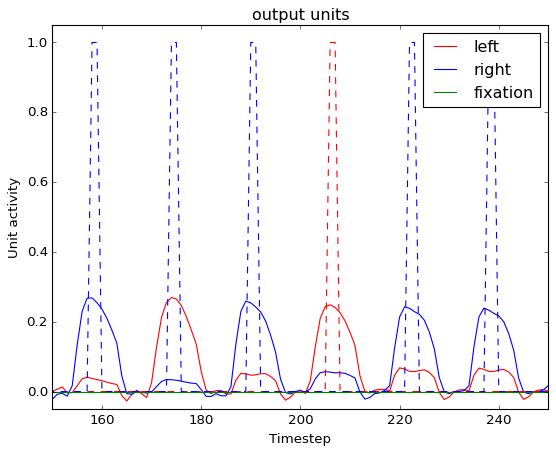

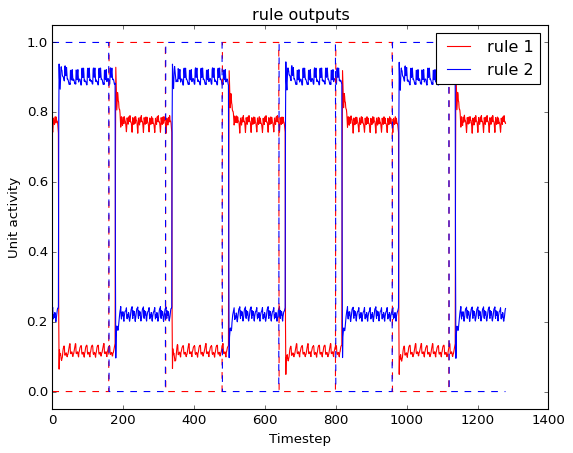

In [26]:
# plot outputs

_rnn_activity_concat = torch.moveaxis(rnn_activity_concat, 1, 2)
y = _rnn_activity_concat@w_out_eff

fig = plt.figure()
plt.rc('font', size=12)
plt.title('output units')
fig.patch.set_facecolor('white')
plt.style.use('classic')
plt.plot(y[0,:,0], color='red', label='left')    # take the 1st sample in a batch
plt.plot(y[0,:,1], color='blue', label='right')
plt.plot(y[0,:,2], color='green', label='fixation')
plt.plot(test_data['yhat'][0,0,startfrom_ts:], color='red', linestyle='dashed')
plt.plot(test_data['yhat'][0,1,startfrom_ts:], color='blue', linestyle='dashed')
plt.plot(test_data['yhat'][0,2,startfrom_ts:], color='green', linestyle='dashed')
plt.xlim([150,250])
plt.ylim([-0.05, 1.05])
plt.xlabel('Timestep')
plt.ylabel('Unit activity')
plt.legend()
plt.show()

y_rule = _rnn_activity_concat@w_out_rule
fig = plt.figure()
plt.title('rule outputs')
fig.patch.set_facecolor('white')
plt.style.use('classic')
plt.plot(y_rule[0,:,0], color='red', label='rule 1')    # take the 1st sample in a batch
plt.plot(y_rule[0,:,1], color='blue', label='rule 2')
plt.plot(test_data['yhat_rule'][0,0,startfrom_ts:], color='red', linestyle='dashed')
plt.plot(test_data['yhat_rule'][0,1,startfrom_ts:], color='blue', linestyle='dashed')
# plt.xlim([150,250])
plt.ylim([-0.05, 1.05])
plt.xlabel('Timestep')
plt.ylabel('Unit activity')
plt.legend()
plt.show()

In [39]:
# label trials by rule

_rules = test_data['rules']
rules = [_r[0] for _r in _rules]    # the rules for all the samples in a trial is the same
rule1_trs = [i for i in range(len(rules)) if rules[i]=='cxt1']
rule2_trs = [i for i in range(len(rules)) if rules[i]=='cxt2']

# define switch trials
switch_trs = [tr for tr in range(1, len(rules)) if rules[tr-1]!=rules[tr]]    # the index of the 1st trial of each rule block (the network does not know that rule has switched)



Text(0, 0.5, 'activity')

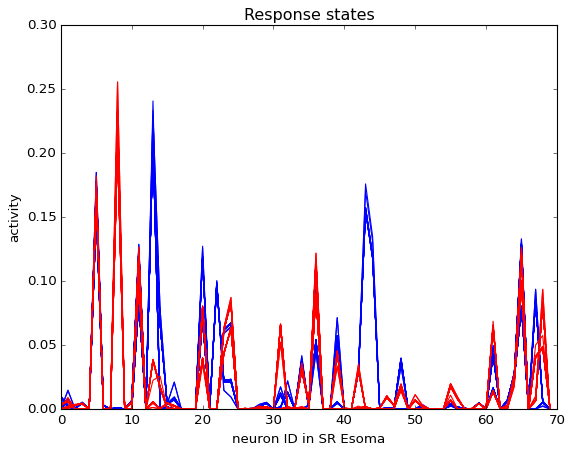

In [41]:
# label trials by response

_resp_list = test_data['resps']
resp_list = []
for r in _resp_list:
    if r[0].tolist()==[1,0]:    # take sample 0 from a batch
        resp_list.append('L')
    elif r[0].tolist()==[0,1]:
        resp_list.append('R')

# extract the mean response state
left_trs = [i for i in range(len(resp_list)) if resp_list[i]=='L']
left_trs_stable = [tr for tr in left_trs if tr-1 not in switch_trs]    # left trials excluding the trial that the network does rule switch
left_states = torch.mean(rnn_activity[left_trs, 0, :, hp_task_test['resp_start']//hp_test['dt']:hp_task_test['resp_end']//hp_test['dt']], axis=-1)    # take sample 0 from the batch
right_trs = [i for i in range(len(resp_list)) if resp_list[i]=='R']
right_trs_stable = [tr for tr in right_trs if tr-1 not in switch_trs]    # left trials excluding the trial that the network does rule switch
right_states = torch.mean(rnn_activity[right_trs, 0, :, hp_task_test['resp_start']//hp_test['dt']:hp_task_test['resp_end']//hp_test['dt']], axis=-1)

# plot the mean response state
fig = plt.figure()
plt.style.use('classic')
fig.patch.set_facecolor('white')
for i in range(1, left_states.shape[0]):
    plt.plot(left_states[i, model.rnn.cg_idx['sr_esoma']], color='blue')    # plot all left states
for i in range(1, right_states.shape[0]):
    plt.plot(right_states[i, model.rnn.cg_idx['sr_esoma']], color='red')
# plt.legend()
plt.title('Response states')
plt.xlabel('neuron ID in SR Esoma')
plt.ylabel('activity')

In [44]:
# label trials by correct/incorrect

# perfs = test_data['perfs']
perfs = [p[0] for p in test_data['perfs']]       # take the first element in the batch
# perf_rules = test_data['perf_rules']
perf_rules = [p[0] for p in test_data['perf_rules']]

error_trials = [i for i in range(len(perfs)) if perfs[i]==0]
error_trials_rule = [i for i in range(len(perf_rules)) if perf_rules[i]==0]
correct_trials = [i for i in range(len(perfs)) if perfs[i]==1]
correct_trials_rule = [i for i in range(len(perf_rules)) if perf_rules[i]==1]

In [47]:
# label trials by stimulus

stims = [s[0] for s in test_data['stims']]   # take the first sample of a batch
A_trs = [tr for tr in range(len(stims)) if stims[tr]=='A']
B_trs = [tr for tr in range(len(stims)) if stims[tr]=='B']
C_trs = [tr for tr in range(len(stims)) if stims[tr]=='C']
D_trs = [tr for tr in range(len(stims)) if stims[tr]=='D']
A_trs_prev_corr = [tr for tr in A_trs if perfs[tr-1]==1]    # A trials following a correct trial
B_trs_prev_corr = [tr for tr in B_trs if perfs[tr-1]==1]    # B trials following a correct trial
C_trs_prev_corr = [tr for tr in C_trs if perfs[tr-1]==1]    # C trials following a correct trial
D_trs_prev_corr = [tr for tr in D_trs if perfs[tr-1]==1]    # D trials following a correct trial

In [48]:
# further define trials

rule1_trs_stable = [tr for tr in rule1_trs if (tr-1 not in error_trials and tr not in error_trials)]    
rule2_trs_stable = [tr for tr in rule2_trs if (tr-1 not in error_trials and tr not in error_trials)]
rule1_after_error_trs = [tr for tr in rule1_trs if tr-1 in error_trials]
rule2_after_error_trs = [tr for tr in rule2_trs if tr-1 in error_trials]
stable_trs = [tr for tr in range(len(stims)) if (tr-1 not in error_trials and tr not in error_trials)]    

## Probing the network

In [49]:
# probe at random locations in phase space
start = time.time()

# n_probes = model.rnn.batch_size
delay_ts = (hp_task_test['resp_start'] - hp_task_test['stim_end'])//hp_test['dt']    # the number of timesteps for the delay
trial_duration = (hp_task_test['trial_end'] - hp_task_test['trial_start'])//hp_test['dt']    
n_timesteps = 1000    # total simulation time
 
# disconnect_pfc_to(model)
# disconnect_pfc_from(model)

probes_rdm = gen_rdm_probes(min=0, max=0.1, n_probes=1000, n_dim=model.rnn.total_n_neurons)
activity_probe_rdm, _ = probe_net(model=model, probes=probes_rdm, hp_task=hp_task_test, hp=hp_test, n_timesteps=n_timesteps)

# probe the network with real state
# probes_real = torch.mean(rnn_activity[:,0,:,hp_task_test['stim_end']//hp_test['dt']:hp_task_test['resp_start']//hp_test['dt']], axis=-1)    # mean activity during delay
# probes_real = rnn_activity[:,0,:,hp_task_test['stim_end']//hp_test['dt']]    # or, activity at the start of delay
probes_real = torch.stack([rnn_activity[p,0,:,random.choice(np.arange(trial_duration))] for p in range(rnn_activity.shape[0])], dim=0)
activity_probe_real, _ = probe_net(model=model, probes=probes_real, hp_task=hp_task_test, hp=hp_test, n_timesteps=n_timesteps)
stable_states = activity_probe_real[:,:,-1]
print('{} seconds'.format(time.time()-start))

model device: cpu
h_init device: cpu
model device: cpu
h_init device: cpu
10.791596174240112 seconds


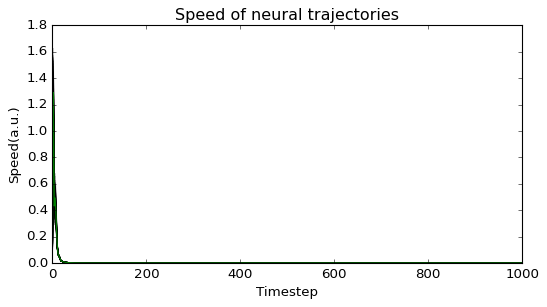

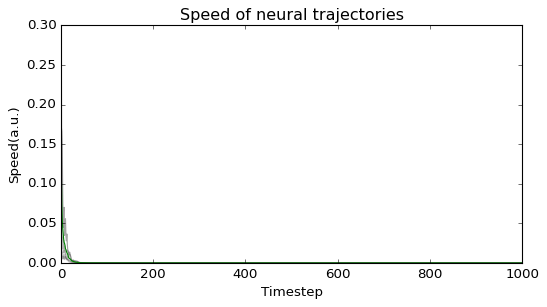

In [50]:
# compute speed of the neural trajectories
speed_rdm_probes = plot_spd_trajectory(activity=activity_probe_rdm[:, model.rnn.cg_idx['pfc_esoma'], :])
speed_real_probes = plot_spd_trajectory(activity=activity_probe_real[:, model.rnn.cg_idx['pfc_esoma'], :])

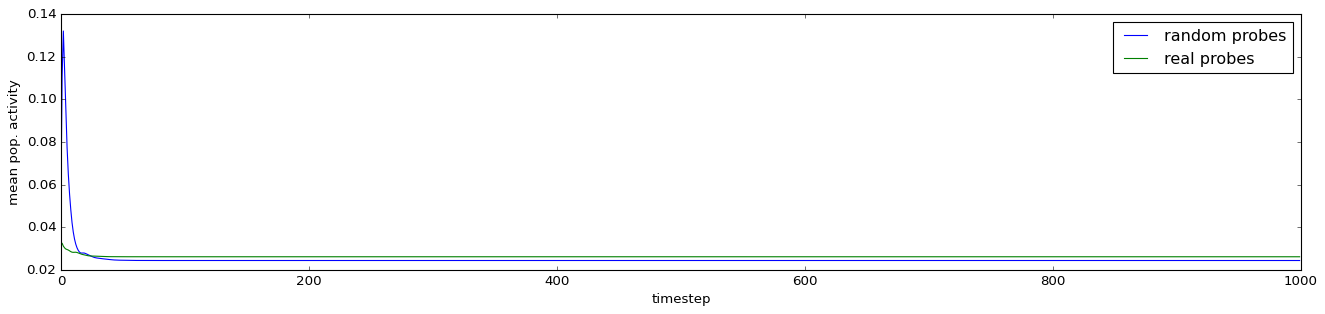

In [51]:
fig = plt.figure(figsize=[20,4])
fig.patch.set_facecolor('white')
plt.style.use('classic')
plt.plot(np.mean(activity_probe_rdm[:,model.rnn.cg_idx['pfc_esoma'],:], axis=(0,1)), label='random probes')
plt.plot(np.mean(activity_probe_real[:,model.rnn.cg_idx['pfc_esoma'],:], axis=(0,1)), label='real probes')
plt.xlim([0,1000])
plt.xlabel('timestep')
plt.ylabel('mean pop. activity')
plt.legend()
plt.show()

[0.91 0.03 0.02]


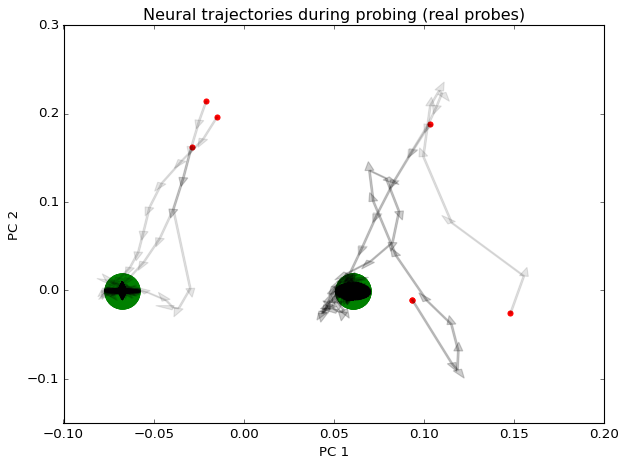

In [52]:
# state evolution during real probing

# neuron_id = np.arange(model.rnn.total_n_neurons)
neuron_id = model.rnn.cg_idx['sr_esoma']

activity_used = activity_probe_real[:, neuron_id, :]

n_probes = activity_used.shape[0]
n_tsteps = activity_used.shape[-1]

all_states = []
for p in range(n_probes):
    for t in range(n_tsteps):
        all_states.append(activity_used[p, :, t])
all_states = np.array(all_states)

## do PCA on all_states
pca = PCA(n_components=3)
pca.fit(all_states)
print(pca.explained_variance_ratio_)

left_states_lowd = pca.transform(left_states[:, neuron_id])
right_states_lowd = pca.transform(right_states[:, neuron_id])

stable_states_lowd = pca.transform(stable_states[:, neuron_id])


# debug: overlay the actual neural trajectory during task
rnn_activity_concat_lowd = pca.transform(np.transpose(rnn_activity_concat[0, neuron_id, :]))

## visualize states
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.style.use('classic')
plt.title('Neural trajectories during probing (real probes)')
for p in np.arange(0, n_probes, step=10):
    if p==0:
        continue
    print('probe {}'.format(p), end='\r')
    state_lowd = pca.transform(np.transpose(activity_used[p, :, :]))
    start_tstep = 0
#     plt.scatter(x=state_lowd[start_tstep:,0], y=state_lowd[start_tstep:,1], s=2, alpha=0.2)
    
    plt.scatter(x=state_lowd[0,0], y=state_lowd[0,1], marker='o', s=20, color='red')    # plot the initial state
    plt.scatter(x=state_lowd[-1,0], y=state_lowd[-1,1], marker='o', s=1000, color='green', alpha=1)    # plot the final state
    
    for t in range(n_tsteps-1):
        if t<start_tstep:
            continue    # omit the initial transient
#         if t>8:    # only plot the period that overlaps with the actual trajectories
#             continue
        plt.arrow(x=state_lowd[t,0], dx=state_lowd[t+1,0]-state_lowd[t,0], y=state_lowd[t,1], dy=state_lowd[t+1,1]-state_lowd[t,1],
                  width=0.001, head_length=0.01, head_width=0.005, color='k', alpha=0.1)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
fig.tight_layout()
plt.show()

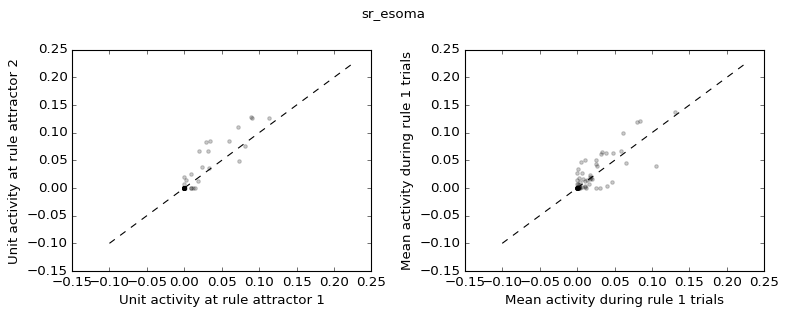

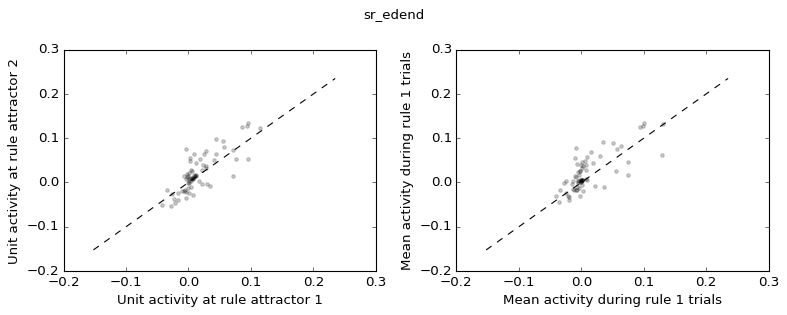

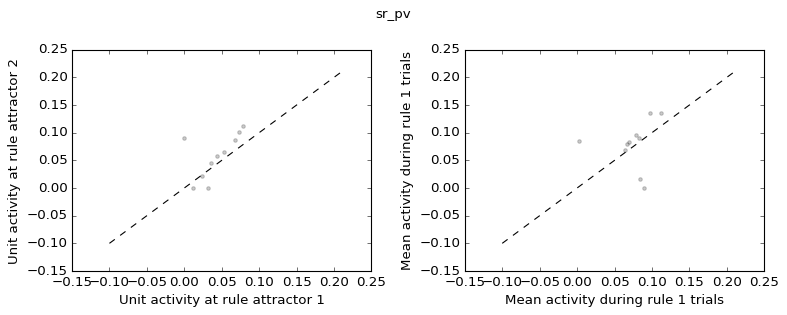

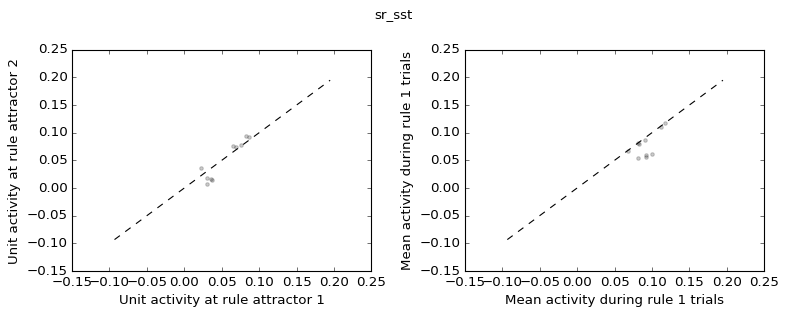

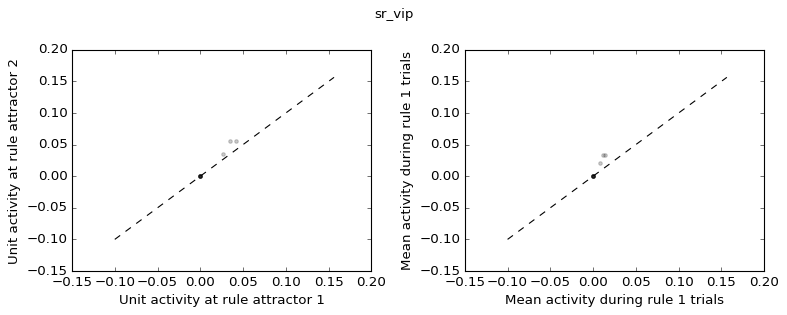

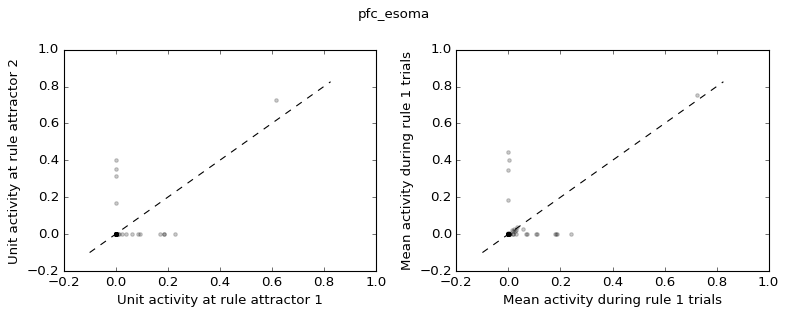

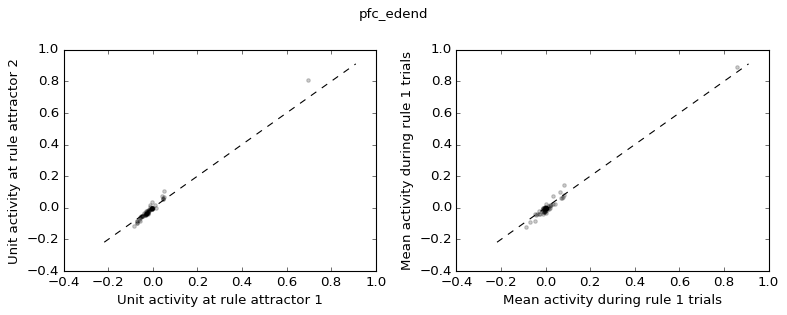

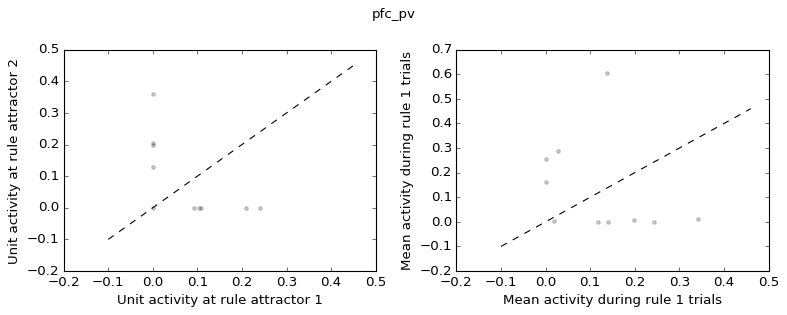

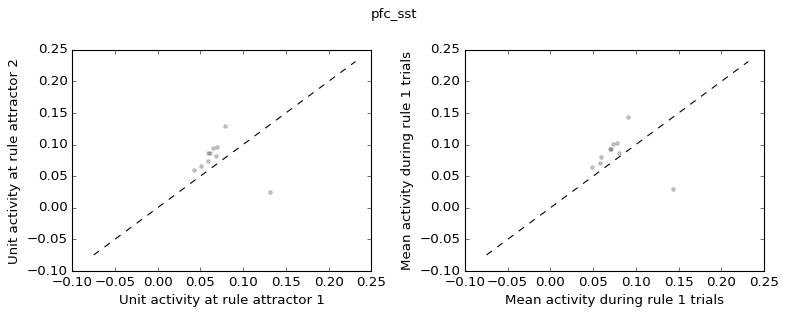

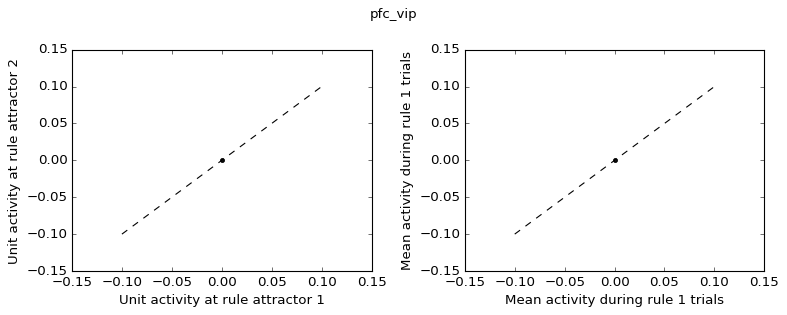

In [53]:
# rule neurons?
kmeans = KMeans(n_clusters=2, random_state=0).fit(stable_states)
attractors = kmeans.cluster_centers_

act_rule1 = np.mean(rnn_activity[rule1_trs_stable, 0, :, :].detach().cpu().numpy(), axis=(0,-1))    # mean activity during rule 1
act_rule2 = np.mean(rnn_activity[rule2_trs_stable, 0, :, :].detach().cpu().numpy(), axis=(0,-1))    # mean activity during rule 2

for cg in model.rnn.cell_group_list:
    cg_idx = model.rnn.cg_idx[cg]
    fig, ax = plt.subplots(1,2,figsize=[10,4])
    plt.style.use('classic')
    fig.patch.set_facecolor('white')
    fig.suptitle(cg)
    ax[0].scatter(x=attractors[0,cg_idx], y=attractors[1,cg_idx], s=10, color='k', alpha=0.2)
    ax[0].set_xlabel('Unit activity at rule attractor 1')
    ax[0].set_ylabel('Unit activity at rule attractor 2')
    ax[1].scatter(x=act_rule1[cg_idx], y=act_rule2[cg_idx], color='k', s=10, alpha=0.2)
    ax[1].set_xlabel('Mean activity during rule 1 trials')
    ax[1].set_ylabel('Mean activity during rule 1 trials')
    smallest = np.min([np.min(attractors[0,cg_idx]), np.min(attractors[1, cg_idx])])
    largest = np.max([np.max(attractors[0,cg_idx]), np.max(attractors[1, cg_idx])])
    ax[0].plot([smallest-0.1, largest+0.1], [smallest-0.1, largest+0.1], ls='--', color='k', lw=1)
    ax[1].plot([smallest-0.1, largest+0.1], [smallest-0.1, largest+0.1], ls='--', color='k', lw=1)
    fig.tight_layout()
    plt.show()
    

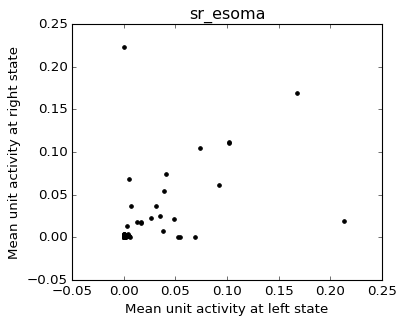

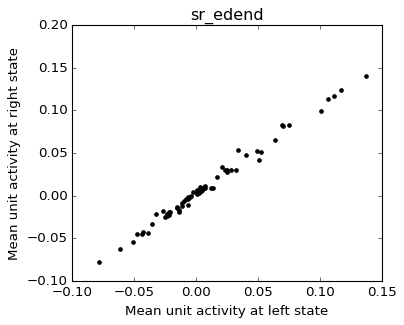

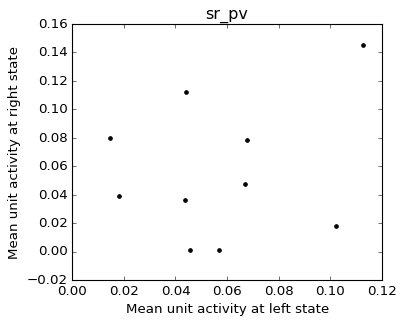

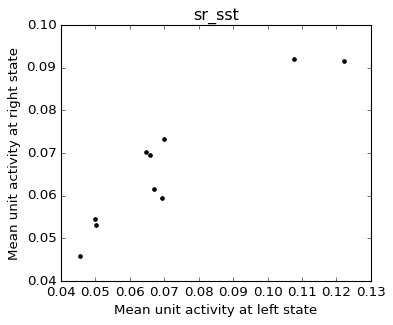

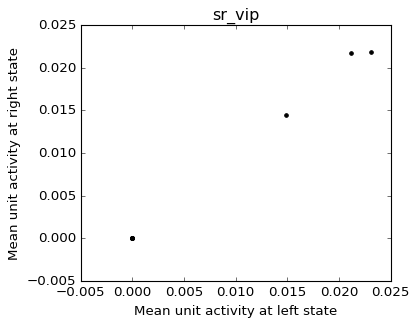

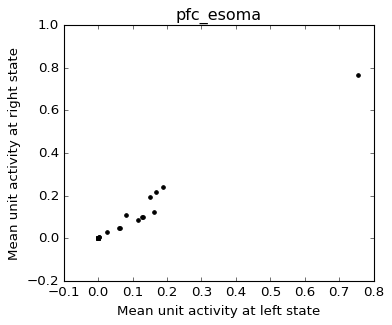

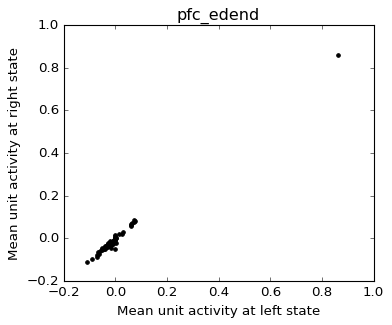

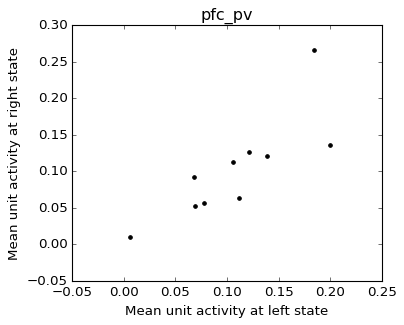

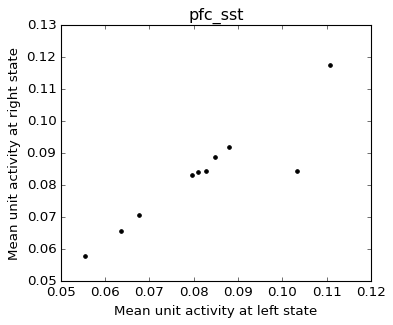

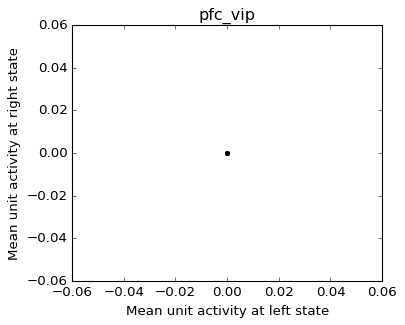

In [54]:
# response neurons?
resp_start_ts = hp_task_test['resp_start']//hp_test['dt']
resp_end_ts = hp_task_test['resp_end']//hp_test['dt']

mean_left_state = np.mean(rnn_activity[left_trs,0,:,resp_start_ts:resp_end_ts].detach().cpu().numpy(), axis=(0,-1))
mean_right_state = np.mean(rnn_activity[right_trs,0,:,resp_start_ts:resp_end_ts].detach().cpu().numpy(), axis=(0,-1))

for cg in model.rnn.cell_group_list:
    fig, ax = plt.subplots(figsize=[5,4])
    plt.style.use('classic')
    fig.patch.set_facecolor('white')
    plt.title(cg)
    for n in model.rnn.cg_idx[cg]:
#         if n not in model.rnn.cg_idx[cg]:
#             continue
        plt.scatter(x=mean_left_state[n], y=mean_right_state[n], s=10, color='k')
    plt.xlabel('Mean unit activity at left state')
    plt.ylabel('Mean unit activity at right state')
#     if 'dend' in cg:
#         plt.xlim([-1.1, 1.1])
#         plt.ylim([-1.1, 1.1])
#         ax.plot([-1.1,1.1], [-1.1,1.1], linestyle='--', color='k', linewidth=1)
#     else:
#         plt.xlim([-0.1, 1.1])
#         plt.ylim([-0.1, 1.1])
#         ax.plot([-0.1,1.1], [-0.1,1.1], linestyle='--', color='k', linewidth=1)
    plt.show()

In [55]:
# compute cell selectivity

rule_sel = {}    # a dict
rule_sel_normalized = {}    # a dict
rule_sel_activity = {}    # rule seletivity using the mean activity during a trial
rule_sel_normalized_activity = {}
rule_sel_stim = {}    # rule selectivity using the activity during the stimulus period
resp_sel = {}    # response selectivity 
resp_sel_normalized = {}
stim_sel = {}    # stimulus selectivity
cat_sel = {}    # category selectivity
cat_sel_normalized = {}

n_neurons = rnn_activity.shape[2]

for n in range(n_neurons):
#     if n in model.rnn.dend_idx:
#         continue

    
    # rule selectivity using fixed point activity
    act_rule1_fp = attractors[0,n]
    act_rule2_fp = attractors[1,n]    # alternatively, use the fixed point activity
    
    # normalized
    if act_rule1_fp==0 and act_rule2_fp==0:
        rule_sel_normalized[n] = 0
    else:
        rule_sel_normalized[n] = (act_rule1_fp - act_rule2_fp)/(act_rule1_fp + act_rule2_fp)
    
    # unnormalized
    rule_sel[n] = (act_rule1_fp - act_rule2_fp)    # such that low firing rate neurons have low rule selectivity
    
    
    
    # rule selectivity using the average activity during a trial
    act_rule1 = np.mean(rnn_activity[rule1_trs_stable, 0, n, :].detach().cpu().numpy())
    act_rule2 = np.mean(rnn_activity[rule2_trs_stable, 0, n, :].detach().cpu().numpy())
    rule_sel_activity[n] = act_rule1 - act_rule2
    # normalized
    if act_rule1==0 and act_rule2==0:
        rule_sel_normalized_activity[n] = 0
    else:
        rule_sel_normalized_activity[n] = (act_rule1 - act_rule2)/(act_rule1 + act_rule2)
    
    
    
    # rule seletivity using the stimulus period activity
    stim_start_ts = hp_task_test['stim_start']//hp_test['dt']
    stim_end_ts = hp_task_test['stim_end']//hp_test['dt']
    act_rule1_stim = np.mean(rnn_activity[rule1_trs_stable, 0, n, stim_start_ts:stim_end_ts].detach().cpu().numpy())
    act_rule2_stim = np.mean(rnn_activity[rule2_trs_stable, 0, n, stim_start_ts:stim_end_ts].detach().cpu().numpy())
    rule_sel_stim[n] = act_rule1_stim - act_rule2_stim
    
    
    
    
    # respose selectivity
    if mean_left_state[n]==0 and mean_right_state[n]==0:
        resp_sel[n] = 0
        resp_sel_normalized[n] = 0
    else:
        resp_sel_normalized[n] = (mean_left_state[n] - mean_right_state[n])/(mean_left_state[n] + mean_right_state[n])
        resp_sel[n] = mean_left_state[n] - mean_right_state[n]
    
    
    
    # stimulus selectivity
    stim_period = np.arange(stim_start_ts, stim_end_ts)
    mean_act_A = np.mean(rnn_activity.detach().cpu().numpy()[A_trs_prev_corr, 0, n, :], axis=(0,-1))
    mean_act_B = np.mean(rnn_activity.detach().cpu().numpy()[B_trs_prev_corr, 0, n, :], axis=(0,-1))
    mean_act_C = np.mean(rnn_activity.detach().cpu().numpy()[C_trs_prev_corr, 0, n, :], axis=(0,-1))
    mean_act_D = np.mean(rnn_activity.detach().cpu().numpy()[D_trs_prev_corr, 0, n, :], axis=(0,-1))
    
    mean_act_list = [mean_act_A, mean_act_B, mean_act_C, mean_act_D]
    
    stim_sel[n] = np.mean([np.abs(x-y) for x, y in itertools.combinations(mean_act_list, 2)])
    
    
    # category selectivity
    AC_trs_prev_corr = A_trs_prev_corr + C_trs_prev_corr
    BD_trs_prev_corr = B_trs_prev_corr + D_trs_prev_corr
    mean_act_AC = np.mean(rnn_activity.detach().cpu().numpy()[AC_trs_prev_corr, 0, n, :], axis=(0,-1))
    mean_act_BD = np.mean(rnn_activity.detach().cpu().numpy()[BD_trs_prev_corr, 0, n, :], axis=(0,-1))
    if mean_act_AC==0 and mean_act_BD==0:
        cat_sel[n] = 0
        cat_sel_normalized[n] = 0
    else:
        cat_sel[n] = mean_act_AC - mean_act_BD
        cat_sel_normalized[n] = (mean_act_AC-mean_act_BD)/(mean_act_AC+mean_act_BD)
        
        
        
        
## compute error signal    
w_rew_eff = model.rnn.effective_weight(w=model.rnn.w_rew, mask=model.rnn.mask_rew).detach().cpu().numpy()
error_signal_dict = {n: w_rew_eff[1, n] for n in range(model.rnn.total_n_neurons)}
correct_signal_dict = {n: w_rew_eff[0, n] for n in range(model.rnn.total_n_neurons)}

## compute error selectivity
error_selectivity = {}

time_period = np.arange(hp_task_test['trial_start']//hp_test['dt'], hp_task_test['trial_end']//hp_test['dt'])    # time period used for calculating neural activity

error_fdbk_trs = [tr+1 for tr in error_trials]    # 1 trial after the error trial (when the network receives the error feedback)
correct_fdbk_trs = [tr for tr in range(rnn_activity.shape[0]) if tr not in error_fdbk_trs]

FR_error = torch.mean(rnn_activity[error_fdbk_trs, 0, :, :], axis=0)
meanFR_error = torch.mean(FR_error[:, time_period], axis=-1)    # avg over time
FR_correct = torch.mean(rnn_activity[correct_fdbk_trs, 0, :, :], axis=0)
meanFR_correct = torch.mean(FR_correct[:, time_period], axis=-1)

for n in range(model.rnn.total_n_neurons):
    # error_selectivity = (act_error - act_correct)/(act_error + act_correct)
    error_selectivity[n] = (meanFR_error[n] - meanFR_correct[n]).numpy()


    
    
## sort the selectivity
rule_sel_sorted = {k: v for k, v in sorted(rule_sel.items(), key=lambda item: item[1])}
rule_sel_normalized_sorted = {k: v for k, v in sorted(rule_sel_normalized.items(), key=lambda item: item[1])}
rule_sel_activity_sorted = {k: v for k, v in sorted(rule_sel_activity.items(), key=lambda item: item[1])}
rule_sel_stim_sorted = {k: v for k, v in sorted(rule_sel_stim.items(), key=lambda item: item[1])}
resp_sel_sorted = {k: v for k, v in sorted(resp_sel.items(), key=lambda item: item[1])}
stim_sel_sorted = {k: v for k, v in sorted(stim_sel.items(), key=lambda item: item[1], reverse=True)}

In [ ]:
# correlation between different rule selectivities
rule_sel1 = rule_sel
rule_sel2 = rule_sel_normalized
for cg in model.rnn.cell_group_list:
    fig, ax = plt.subplots(figsize=[5,4])
    plt.style.use('classic')
    fig.patch.set_facecolor('white')
    plt.title(cg)
    for n in model.rnn.cg_idx[cg]:
        plt.scatter(x=rule_sel1[n]+np.random.uniform(-0.0, 0.0), y=rule_sel2[n]+np.random.uniform(-0.0, 0.0), s=20, alpha=0.2, color='k')
    plt.xlabel('Rule selectivity 1')
    plt.ylabel('Rule selectivity 2')
    plt.show()

In [ ]:
# plot the rule selectivity of the dend against soma
rule_sel_used = rule_sel_normalized_activity

fig, ax = plt.subplots(figsize=[5,5])
plt.style.use('classic')
fig.patch.set_facecolor('white')
for n in model.rnn.cg_idx['sr_esoma']:
    dend_idx = n + len(model.rnn.cg_idx['sr_esoma'])
    ax.scatter(x=rule_sel_used[n], y=rule_sel_used[dend_idx], color='k', s=2)
ax.set_xlabel('Rule selectivity, SR E soma')
ax.set_ylabel('Rule selectivity, SR E dendrite')
plt.show()

fig, ax = plt.subplots(figsize=[5,5])
plt.style.use('classic')
fig.patch.set_facecolor('white')
for n in model.rnn.cg_idx['pfc_esoma']:
    dend_idx = n + len(model.rnn.cg_idx['sr_esoma'])
    ax.scatter(x=rule_sel_used[n], y=rule_sel_used[dend_idx], color='k', s=2)
ax.set_xlabel('Rule selectivity, PFC E soma')
ax.set_ylabel('Rule selectivity, PFC E dendrite')
plt.show()

In [ ]:
# plot rule selectivity distribution

fig = plt.figure(figsize=[5,3])
fig.patch.set_facecolor('white')
plt.style.use('classic')
rule_sel_list = [rule_sel[n] for n in model.rnn.soma_idx if np.isnan(rule_sel[n])==False]
plt.hist(rule_sel_list, bins=100)
plt.title('All somas')
plt.xlabel('Rule selectivity')
plt.ylabel('# neurons')
plt.show()

fig = plt.figure(figsize=[5,3])
fig.patch.set_facecolor('white')
plt.style.use('classic')
rule_sel_list = [rule_sel[n] for n in model.rnn.dend_idx if np.isnan(rule_sel[n])==False]
plt.hist(rule_sel_list, bins=100)
plt.title('All dendrites')
plt.xlabel('Rule selectivity')
plt.ylabel('# neurons')
plt.show()

# plot rule selectivity for each cell group
for cg in model.rnn.cell_group_list:
    rule_sel_cg = []
    for n in rule_sel.keys():
        if n in model.rnn.cg_idx[cg] and np.isnan(rule_sel[n])==False:
            rule_sel_cg.append(rule_sel[n])
    fig = plt.figure(figsize=[5,3])
    fig.patch.set_facecolor('white')
    plt.hist(rule_sel_cg, bins=10)
    plt.title('Rule selectivity, {}'.format(cg))
    plt.xlabel('Rule selectivity')
    plt.ylabel('# neurons')
    plt.show()

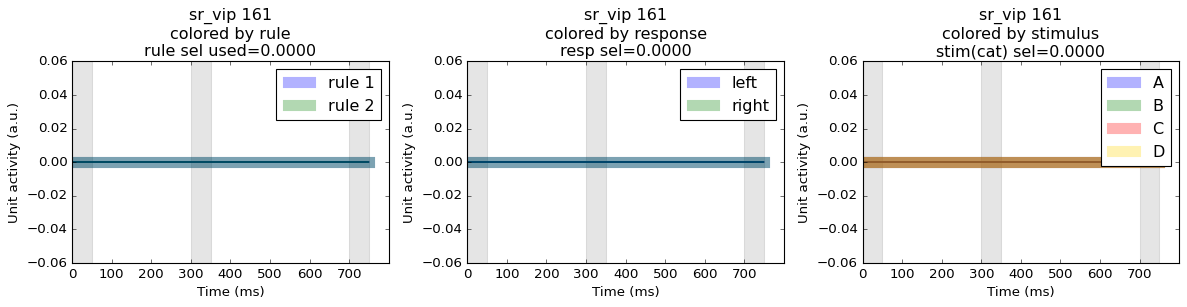

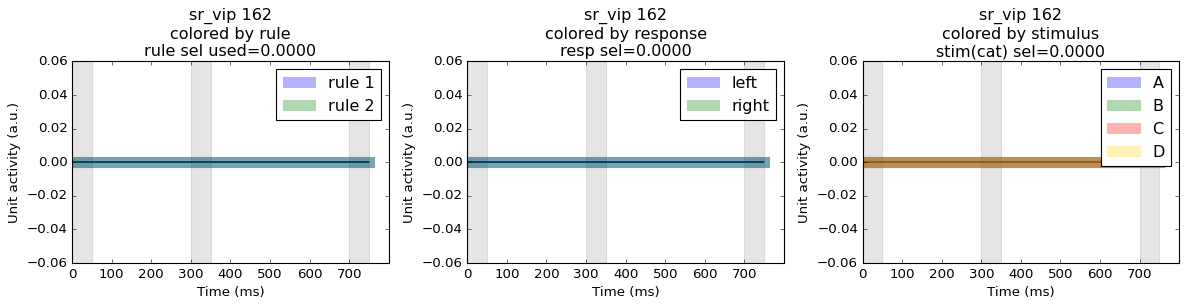

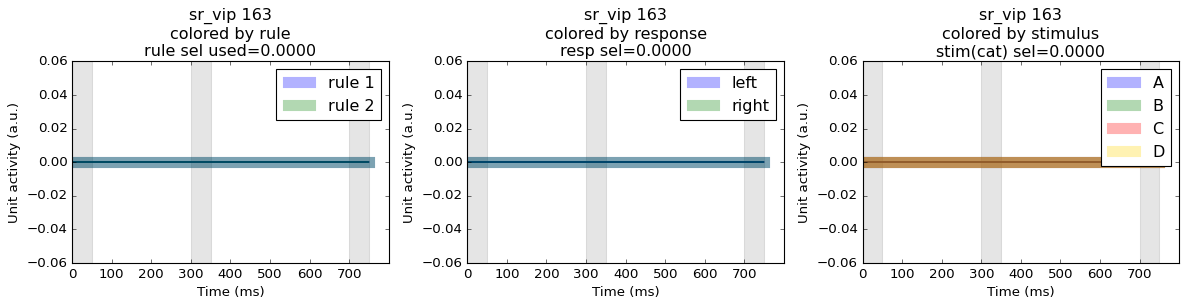

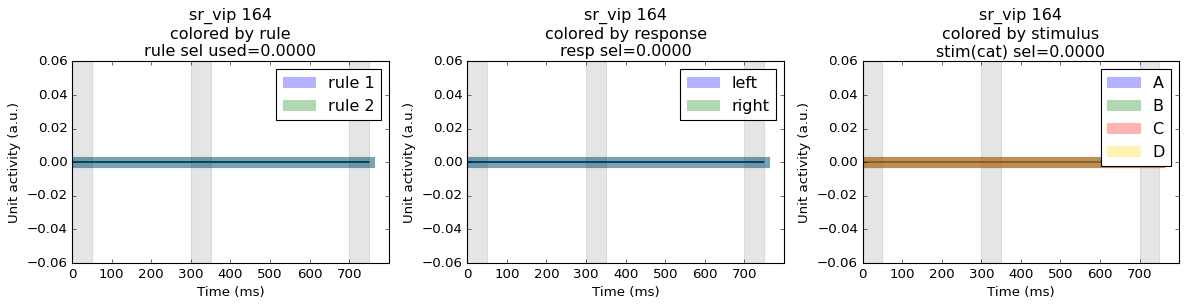

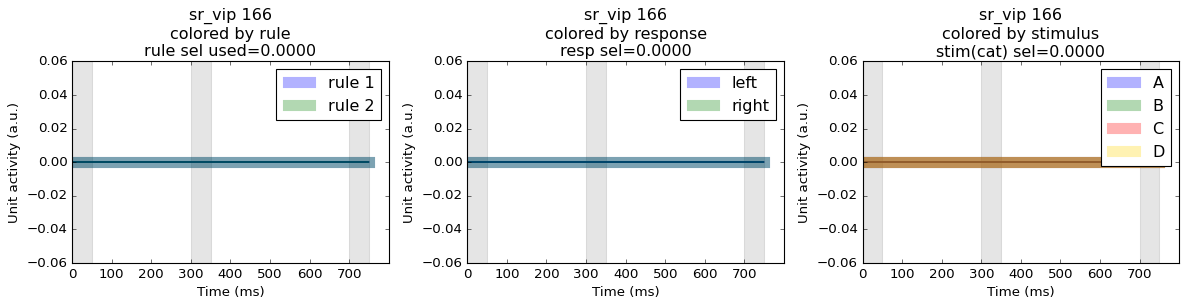

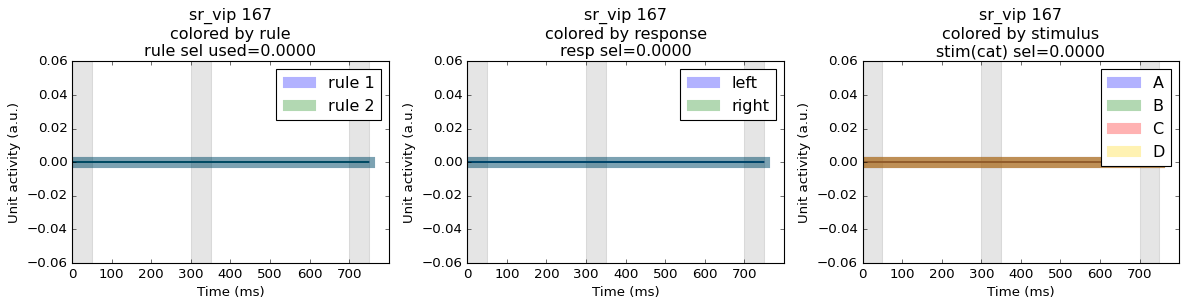

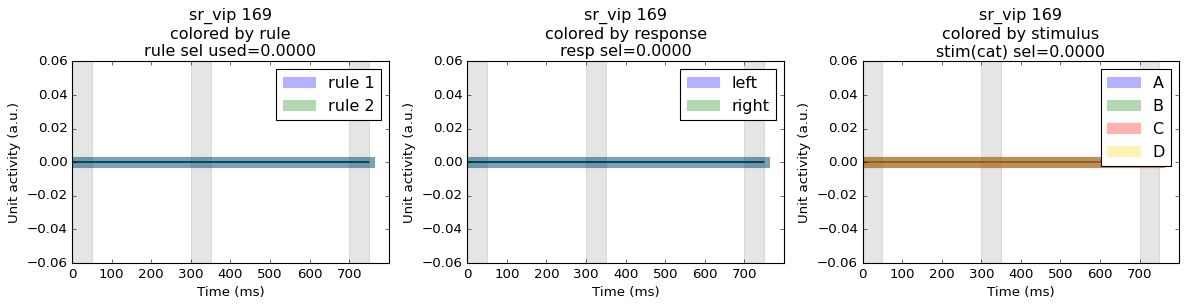

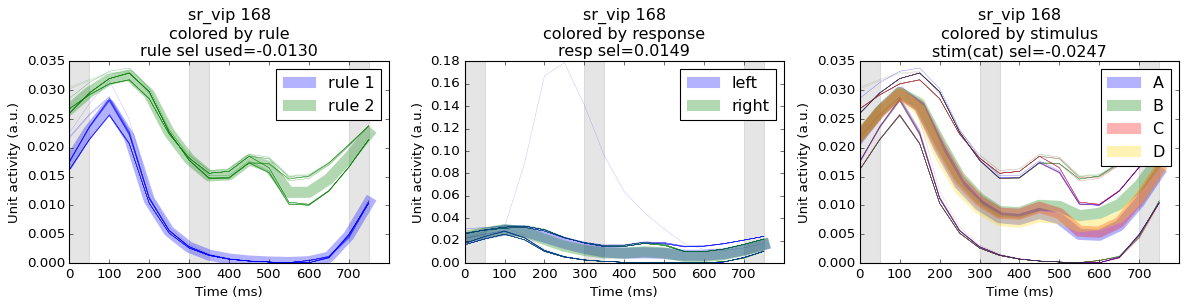

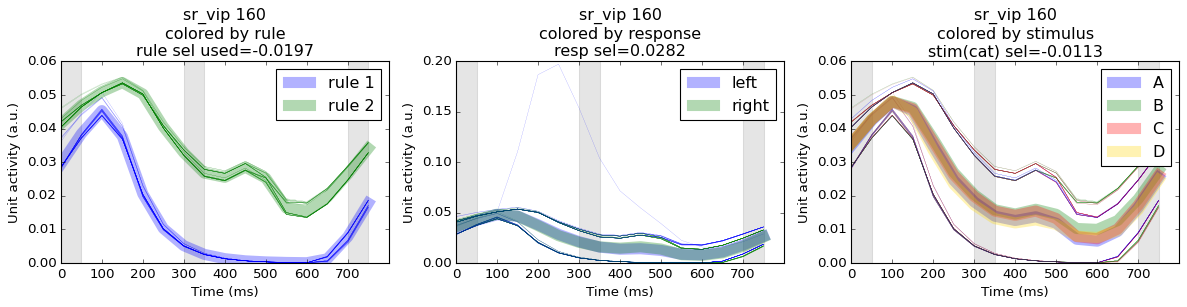

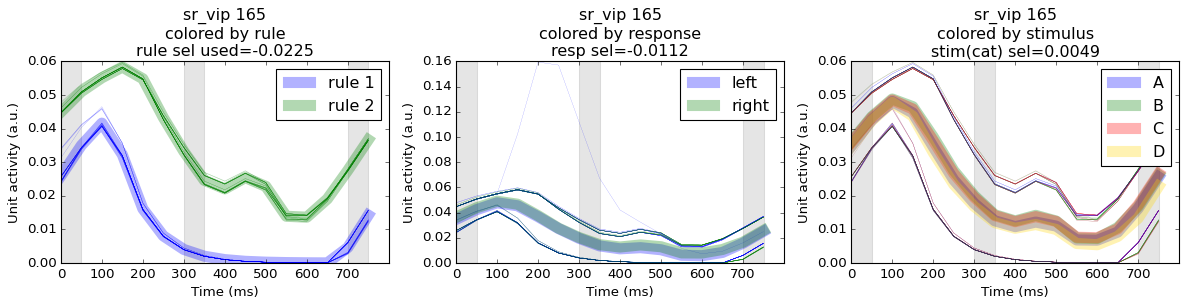

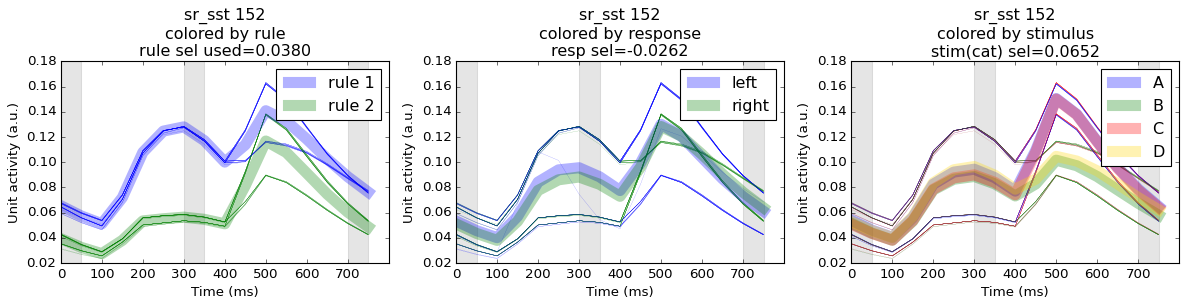

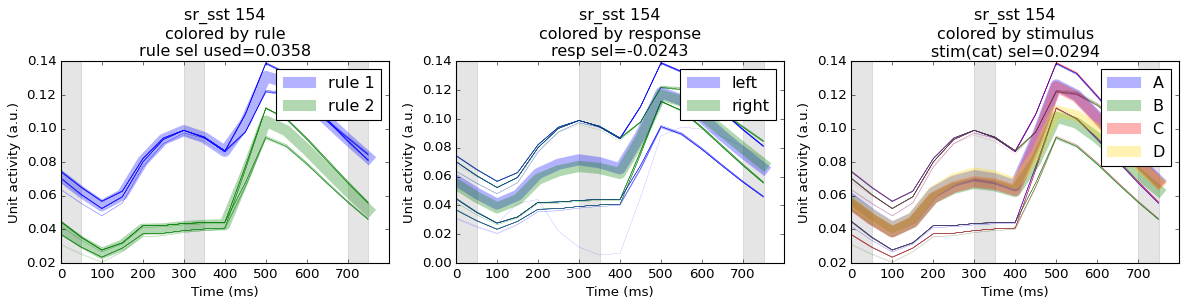

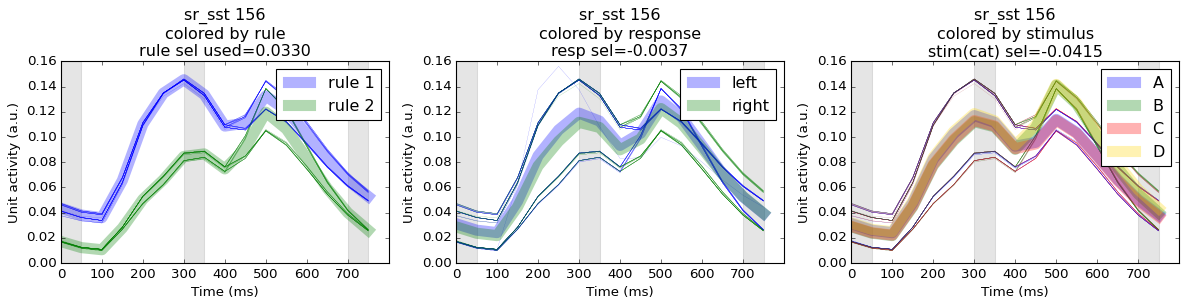

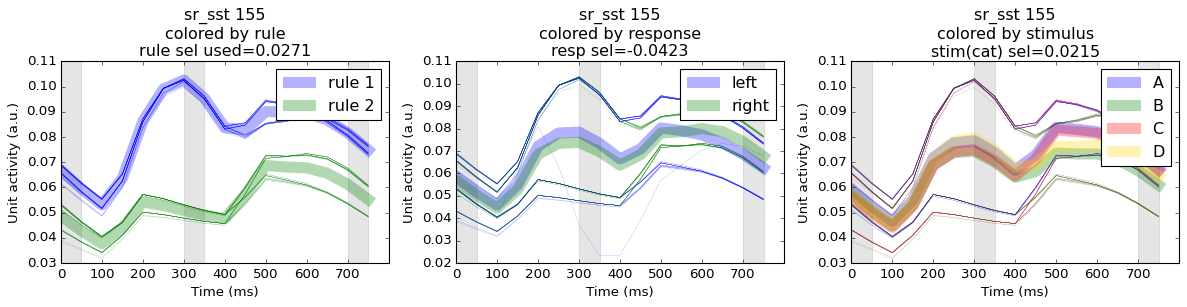

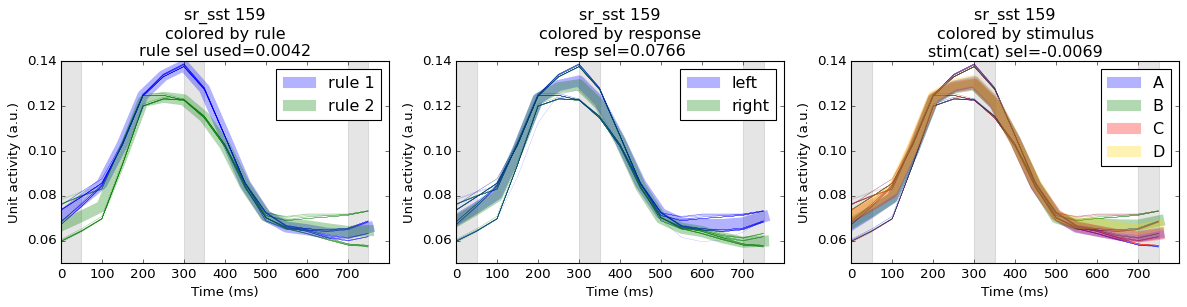

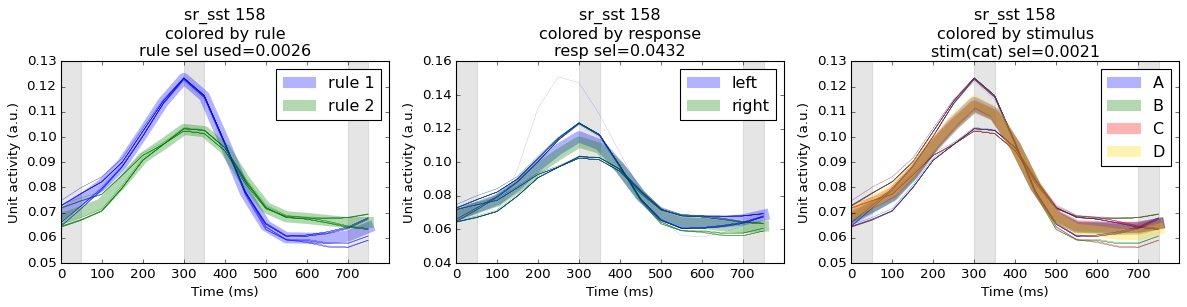

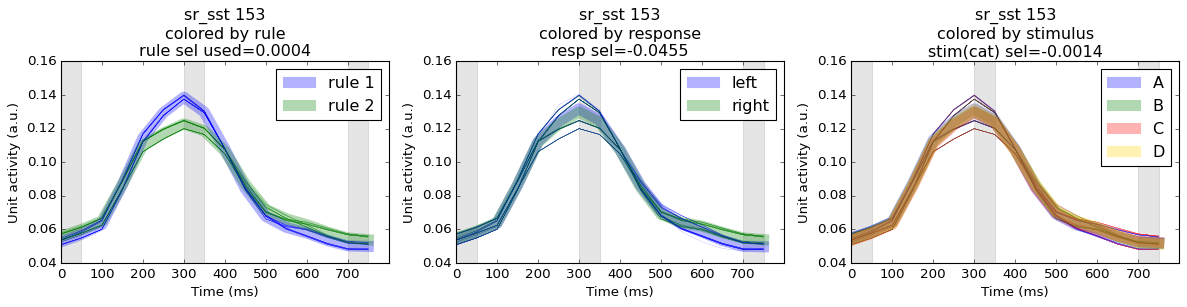

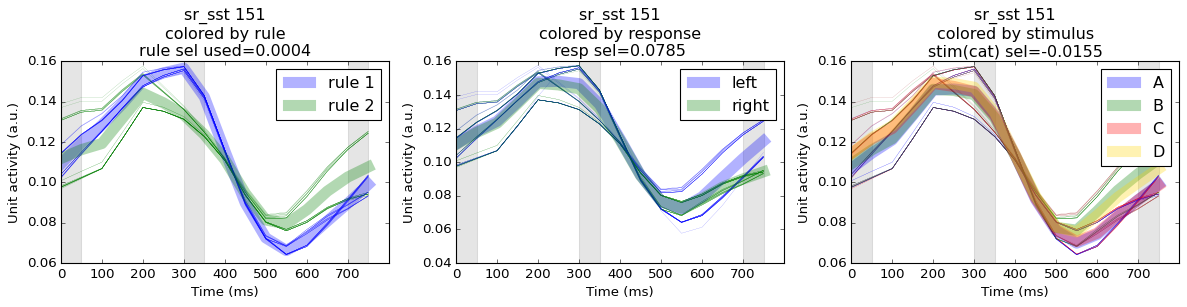

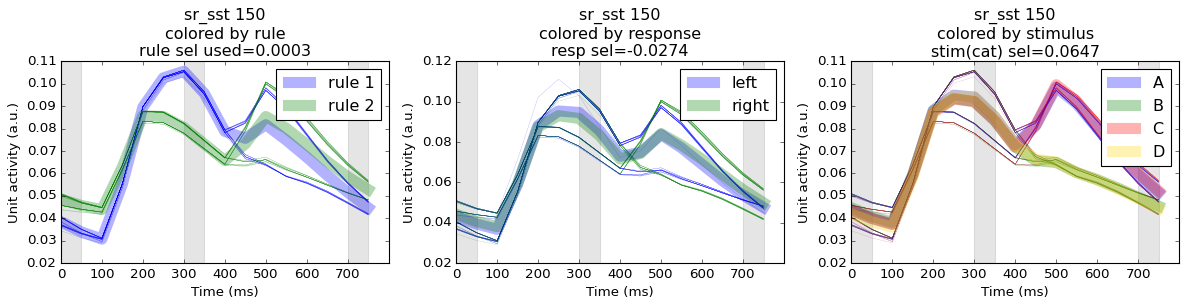

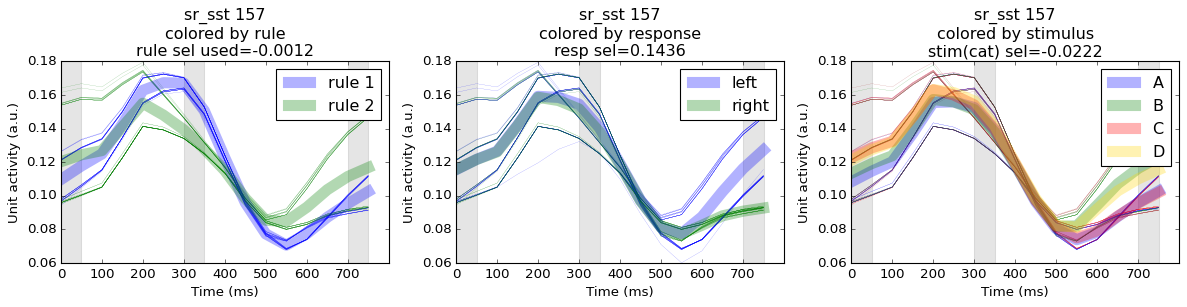

In [57]:
# plot single neuron activity within a trial

cgs = ['sr_vip', 'sr_sst']
# cgs = model.rnn.cell_group_list

rule_sel_displayed = rule_sel_activity
resp_sel_displayed = resp_sel_normalized
stim_sel_displayed = cat_sel_normalized

sel_sorted = {k: v for k, v in sorted(rule_sel_activity.items(), key=lambda item: item[1], reverse=True)}

for cg in cgs:
    cg_idx = model.rnn.cg_idx[cg]
    
    cg_idx_sorted = [n for n in sel_sorted.keys() if n in model.rnn.cg_idx[cg]]    # sort cell index based on some selectivity
#     if cg=='sr_esoma':
#         cg_idx_sorted = pfc_to_sr_dend_weight_dict_sorted.keys()
    
    for n in cg_idx_sorted:
        if cg=='sr_esoma':
            print('top-down weight onto its dendrite: {}'.format(pfc_to_sr_dend_weight_dict_sorted[n]))
            
        fig, ax = plt.subplots(1,3,figsize=[15,4])
        fig.patch.set_facecolor('white')
        plt.style.use('classic')
    
        ax[0].set_title('{} {}\ncolored by rule\nrule sel used={:0.4f}'.format(cg, n, rule_sel_displayed[n]))
        for tr in range(rnn_activity.shape[0]):
            if tr in rule1_trs_stable:
                color='blue'
                alpha=1
                lw=0.1
            elif tr in rule2_trs_stable:
                color='green'
                alpha=1
                lw=0.1
            else:
                continue
            ax[0].plot(rnn_activity[tr, 0, n, :], color=color, linewidth=lw, alpha=alpha)
        ax[0].plot(np.mean(rnn_activity.cpu().numpy()[rule1_trs_stable, 0, n,:], axis=0), alpha=0.3, linewidth=10, color='blue', label='rule 1')
        ax[0].plot(np.mean(rnn_activity.cpu().numpy()[rule2_trs_stable, 0, n,:], axis=0), alpha=0.3, linewidth=10, color='green', label='rule 2')
        ax[0].legend()
        plot_task_epochs(hp_task=hp_task_test, hp=hp_test, ax=ax[0])
    
    
        ax[1].set_title('{} {}\ncolored by response\nresp sel={:0.4f}'.format(cg, n, resp_sel_displayed[n]))
        for tr in range(rnn_activity.shape[0]):
            if tr in left_trs_stable:
                color='blue'
                alpha=1
                lw=0.1
            elif tr in right_trs_stable:
                color='green'
                alpha=1
                lw=0.1
            else:
                continue
            ax[1].plot(rnn_activity[tr, 0, n, :], color=color, linewidth=lw, alpha=alpha)
        ax[1].plot(np.mean(rnn_activity.cpu().numpy()[left_trs_stable, 0, n,:], axis=0), alpha=0.3, linewidth=10, color='blue', label='left')
        ax[1].plot(np.mean(rnn_activity.cpu().numpy()[right_trs_stable, 0, n,:], axis=0), alpha=0.3, linewidth=10, color='green', label='right')
        plot_task_epochs(hp_task=hp_task_test, hp=hp_test, ax=ax[1])
        ax[1].legend()

        
        ax[2].set_title('{} {}\ncolored by stimulus\nstim(cat) sel={:0.4f}'.format(cg, n, stim_sel_displayed[n]))
        for tr in range(rnn_activity.shape[0]):
            if tr in A_trs_prev_corr:
                color='blue'
                alpha=1
                lw=0.1
            elif tr in B_trs_prev_corr:
                color='green'
                alpha=1
                lw=0.1
            elif tr in C_trs_prev_corr:
                color='red'
                alpha=1
                lw=0.1
            elif tr in D_trs_prev_corr:
                color='brown'
                alpha=1
                lw=0.1
            else:
                continue
            ax[2].plot(rnn_activity[tr, 0, n, :], color=color, linewidth=lw, alpha=alpha)
        ax[2].plot(np.mean(rnn_activity.cpu().numpy()[A_trs_prev_corr, 0, n,:], axis=0), alpha=0.3, linewidth=10, color='blue', label='A')
        ax[2].plot(np.mean(rnn_activity.cpu().numpy()[B_trs_prev_corr, 0, n,:], axis=0), alpha=0.3, linewidth=10, color='green', label='B')
        ax[2].plot(np.mean(rnn_activity.cpu().numpy()[C_trs_prev_corr, 0, n,:], axis=0), alpha=0.3, linewidth=10, color='red', label='C')
        ax[2].plot(np.mean(rnn_activity.cpu().numpy()[D_trs_prev_corr, 0, n,:], axis=0), alpha=0.3, linewidth=10, color='gold', label='D')
        plot_task_epochs(hp_task=hp_task_test, hp=hp_test, ax=ax[2])
        ax[2].legend()
        
        
        # label x axis
        xticks = np.arange(0, rnn_activity.shape[-1], step=2)
        xticklabels = [hp_test['dt']*x for x in xticks]
        for i in range(3):
            ax[i].set_xticks(xticks)
            ax[i].set_xticklabels(xticklabels)
            ax[i].set_xlabel('Time (ms)')
            ax[i].set_ylabel('Unit activity (a.u.)')
        
        
        fig.tight_layout()
        plt.show()

In [ ]:
# sporadic firing

n = {}
n[0,0] = 21
n[0,1] = 52
n[1,0] = 17
n[1,1] = 12

fig, ax=plt.subplots(2,2,figsize=[12,10])
plt.style.use('classic')
fig.patch.set_facecolor('white')
fig.suptitle('Example units with sporadic firing')

ax[0,0].set_title('Unit {}'.format(n[0,0]))
ax[0,0].plot(rnn_activity_concat[0,n[0,0],:])

ax[0,1].set_title('Unit {}'.format(n[0,1]))
ax[0,1].plot(rnn_activity_concat[0,n[0,1],:])

ax[1,0].set_title('Unit {}'.format(n[1,0]))
ax[1,0].plot(rnn_activity_concat[0,n[1,0],:])

ax[1,1].set_title('Unit {}'.format(n[1,1]))
ax[1,1].plot(rnn_activity_concat[0,n[1,1],:])

In [ ]:
# E-I balance? Comparing neural activity when single neuron is isolated vs. connected

n = 18
plt.rcParams.update({'font.size': 12})

rdm_probes = np.random.uniform(0, 0, [model.rnn.batch_size, model.rnn.total_n_neurons])
print('rdm_probes shape: {}'.format(rdm_probes.shape))

model_copy = copy.deepcopy(model)
model_copy.rnn.w_rec = nn.Parameter(torch.zeros(model.rnn.w_rec.size()))    # disconnect every neuron

rnn_activity_probe_copy, total_input_copy = probe_net(model=model_copy, probes=rdm_probes, hp_task=hp_task_test, hp=hp_test, n_timesteps=1000, noise=0.01)
rnn_activity_probe, total_input = probe_net(model=model, probes=rdm_probes, hp_task=hp_task_test, hp=hp_test, n_timesteps=1000, noise=0.01)

fig, ax=plt.subplots(1,3,figsize=[15,5])
fig.patch.set_facecolor('white')
plt.style.use('classic')
ax[0].set_title('Neural activity of unit {} in the intact network'.format(n))
ax[0].plot(rnn_activity_probe[0,n,0:100])
ax[1].set_title('Neural activity of unit {} when disconnected from the network'.format(n))
ax[1].plot(rnn_activity_probe_copy[0,n,0:100])
ax[2].set_title('Incoming weights to unit {}'.format(n))
ax[2].plot(w_rec_eff[:,n])
fig.tight_layout()
plt.show()

print(rnn_activity_probe[0,n,:100], np.mean(rnn_activity_probe[:,n,:]))
print(rnn_activity_probe_copy[0,n,:100], np.mean(rnn_activity_probe_copy[:,n,:]))


fig, ax=plt.subplots(1,3,figsize=[15,5])
fig.patch.set_facecolor('white')
plt.style.use('classic')
ax[0].set_title('Total current to unit {} in the intact network'.format(n))
ax[0].plot(total_input[0,n,0:])
ax[1].set_title('Total current to unit {} when disconnected from the network'.format(n))
ax[1].plot(total_input_copy[0,n,0:])
ax[2].set_title('Incoming weights to unit {}'.format(n))
ax[2].plot(w_rec_eff[:,n])
fig.tight_layout()
plt.show()

print(total_input[0,n,:100], np.mean(total_input[:,n,:]))
print(total_input_copy[0,n,:100], np.mean(total_input_copy[:,n,:]))

In [ ]:
# define subpopulations within PFC

subcg_pfc = ['rule1_esoma',
             'rule1_edend',
             'rule2_esoma',
             'rule2_edend',
             'rule1_pv',
             'rule2_pv',
             'rule1_sst',
             'rule2_sst',
             'mix_err_esoma_rule1',
             'mix_err_edend_rule1',
             'mix_err_esoma_rule2',
             'mix_err_edend_rule2', 
             'mix_err_pv_rule1',
             'mix_err_pv_rule2',
             'mix_err_sst_rule1',
             'mix_err_sst_rule2',
             'mix_corr_esoma_rule1', 
             'mix_corr_edend_rule1', 
             'mix_corr_esoma_rule2',
             'mix_corr_edend_rule2',
             'mix_corr_pv_rule1',
             'mix_corr_pv_rule2',
             'mix_corr_sst_rule1',
             'mix_corr_sst_rule2',
             'unclassified']
subcg_pfc_idx = {}
for subcg in subcg_pfc:
    subcg_pfc_idx[subcg] = []

err_fdbk_trs = [n for n in range(rnn_activity.shape[0]) if n-1 in error_trials]
stable_trs = [n for n in range(rnn_activity.shape[0]) if n not in error_trials and n-1 not in error_trials]




for n in model.rnn.pfc_idx:
    
#     if np.max(rnn_activity.cpu().numpy()[:, 0, n, :])<=1e-3:
#         continue   # don't include low-firing neurons

    if np.abs(rule_sel[n])>=0.05:    # rule neurons
#     if np.abs(rule_sel_normalized[n])>=0.5:
        if np.mean(rnn_activity.cpu().numpy()[rule1_trs_stable, 0, n,:])>np.mean(rnn_activity.cpu().numpy()[rule2_trs_stable, 0, n,:]):     # rule 1 neurons
        # just write "if rule_sel[n]>0"?
            if n in model.rnn.cg_idx['pfc_esoma']:
                subcg_pfc_idx['rule1_esoma'].append(n)
                subcg_pfc_idx['rule1_edend'].append(n+70)
            elif n in model.rnn.cg_idx['pfc_pv']:
                subcg_pfc_idx['rule1_pv'].append(n)
            elif n in model.rnn.cg_idx['pfc_sst']:
                subcg_pfc_idx['rule1_sst'].append(n)
        else:
            if n in model.rnn.cg_idx['pfc_esoma']:
                subcg_pfc_idx['rule2_esoma'].append(n)
                subcg_pfc_idx['rule2_edend'].append(n+70)
            elif n in model.rnn.cg_idx['pfc_pv']:
                subcg_pfc_idx['rule2_pv'].append(n)
            elif n in model.rnn.cg_idx['pfc_sst']:
                subcg_pfc_idx['rule2_sst'].append(n)
    
    # mixed-selective neurons
    elif np.mean(rnn_activity.cpu().numpy()[err_fdbk_trs, 0, n, :])>np.mean(rnn_activity.cpu().numpy()[stable_trs, 0, n, :]):
        if np.mean(rnn_activity.cpu().numpy()[rule1_after_error_trs, 0, n, :])>np.mean(rnn_activity.cpu().numpy()[rule2_after_error_trs, 0, n, :]):
            if n in model.rnn.cg_idx['pfc_esoma']:
                subcg_pfc_idx['mix_err_esoma_rule1'].append(n)
                subcg_pfc_idx['mix_err_edend_rule1'].append(n+70)
            elif n in model.rnn.cg_idx['pfc_pv']:
                subcg_pfc_idx['mix_err_pv_rule1'].append(n)
            elif n in model.rnn.cg_idx['pfc_sst']:
                subcg_pfc_idx['mix_err_sst_rule1'].append(n)
        else:
            if n in model.rnn.cg_idx['pfc_esoma']:
                subcg_pfc_idx['mix_err_esoma_rule2'].append(n)
                subcg_pfc_idx['mix_err_edend_rule2'].append(n+70)
            elif n in model.rnn.cg_idx['pfc_pv']:
                subcg_pfc_idx['mix_err_pv_rule2'].append(n)
            elif n in model.rnn.cg_idx['pfc_sst']:
                subcg_pfc_idx['mix_err_sst_rule2'].append(n)
    elif np.mean(rnn_activity.cpu().numpy()[err_fdbk_trs, 0, n, :])<=np.mean(rnn_activity.cpu().numpy()[stable_trs, 0, n, :]):
        if np.mean(rnn_activity.cpu().numpy()[rule1_trs_stable, 0, n, :])>np.mean(rnn_activity.cpu().numpy()[rule2_trs_stable, 0, n, :]):
            if n in model.rnn.cg_idx['pfc_esoma']:
                subcg_pfc_idx['mix_corr_esoma_rule1'].append(n)
                subcg_pfc_idx['mix_corr_edend_rule1'].append(n+70)
            elif n in model.rnn.cg_idx['pfc_pv']:
                subcg_pfc_idx['mix_corr_pv_rule1'].append(n)
            elif n in model.rnn.cg_idx['pfc_sst']:
                subcg_pfc_idx['mix_corr_sst_rule1'].append(n)
        else:
            if n in model.rnn.cg_idx['pfc_esoma']:
                subcg_pfc_idx['mix_corr_esoma_rule2'].append(n)
                subcg_pfc_idx['mix_corr_edend_rule2'].append(n+70)
            elif n in model.rnn.cg_idx['pfc_pv']:
                subcg_pfc_idx['mix_corr_pv_rule2'].append(n)
            elif n in model.rnn.cg_idx['pfc_sst']:
                subcg_pfc_idx['mix_corr_sst_rule2'].append(n)

                
                
# combine them into the model
for subcg in subcg_pfc_idx.keys():
    model.rnn.cg_idx['subcg_pfc_'+subcg] = subcg_pfc_idx[subcg]
    
# show the number of neurons for each subpopulation
for subcg in subcg_pfc:
    print(subcg, len(subcg_pfc_idx[subcg]))

In [60]:
# define subpopulations within SR

subcg_sr =  ['ac_esoma',
             'bd_esoma',
             'left_esoma',
             'right_esoma',
             'rule1_esoma',
             'rule2_esoma',
             'ac_edend',
             'bd_edend',
             'left_edend',
             'right_edend',
             'rule1_edend',
             'rule2_edend',
             'ac_pv',
             'bd_pv',
             'left_pv',
             'right_pv',
             'rule1_pv',
             'rule2_pv',
             'ac_sst',
             'bd_sst',
             'left_sst',
             'right_sst',
             'rule1_sst',
             'rule2_sst',
             'ac_vip',
             'bd_vip',
             'left_vip',
             'right_vip',
             'rule1_vip',
             'rule2_vip',
             'acxrule1xleft_esoma',
             'acxrule1xleft_edend',
             'acxrule1xleft_pv',
             'acxrule1xleft_sst',
             'acxrule1xleft_vip',
             'acxrule2xright_esoma',
             'acxrule2xright_edend',
             'acxrule2xright_pv',
             'acxrule2xright_sst',
             'acxrule2xright_vip',
             'bdxrule1xright_esoma',
             'bdxrule1xright_edend',
             'bdxrule1xright_pv',
             'bdxrule1xright_sst',
             'bdxrule1xright_vip',
             'bdxrule2xleft_esoma',
             'bdxrule2xleft_edend',
             'bdxrule2xleft_pv',
             'bdxrule2xleft_sst',
             'bdxrule2xleft_vip',
             'unselective_esoma',
             'unselective_edend',
             'unselective_pv',
             'unselective_sst',
             'unselective_vip']
subcg_sr_idx = {}
for subcg in subcg_sr:
    subcg_sr_idx[subcg] = []

    


for n in model.rnn.sr_idx:
    
#     if np.max(rnn_activity.cpu().numpy()[:, 0, n, :])<=1e-3:
#         continue   # don't include low-firing neurons
    
    # response neurons
    if np.abs(resp_sel_normalized[n])>=0.5:   
        if resp_sel_normalized[n]>0:     # left neurons
            if n in model.rnn.cg_idx['sr_esoma']:
                subcg_sr_idx['left_esoma'].append(n)
                subcg_sr_idx['left_edend'].append(n+70)
            elif n in model.rnn.cg_idx['sr_pv']:
                subcg_sr_idx['left_pv'].append(n)
            elif n in model.rnn.cg_idx['sr_sst']:
                subcg_sr_idx['left_sst'].append(n)
            elif n in model.rnn.cg_idx['sr_vip']:
                subcg_sr_idx['left_vip'].append(n)
        else:    # right neurons
            if n in model.rnn.cg_idx['sr_esoma']:
                subcg_sr_idx['right_esoma'].append(n)
                subcg_sr_idx['right_edend'].append(n+70)
            elif n in model.rnn.cg_idx['sr_pv']:
                subcg_sr_idx['right_pv'].append(n)
            elif n in model.rnn.cg_idx['sr_sst']:
                subcg_sr_idx['right_sst'].append(n)
            elif n in model.rnn.cg_idx['sr_vip']:
                subcg_sr_idx['right_vip'].append(n)
    
    # rule neurons
    if np.abs(rule_sel_normalized_activity[n])>=0.5:
        if rule_sel_normalized_activity[n]>0:     # rule 1 neurons
            if n in model.rnn.cg_idx['sr_esoma']:
                subcg_sr_idx['rule1_esoma'].append(n)
                subcg_sr_idx['rule1_edend'].append(n+70)
            elif n in model.rnn.cg_idx['sr_pv']:
                subcg_sr_idx['rule1_pv'].append(n)
            elif n in model.rnn.cg_idx['sr_sst']:
                subcg_sr_idx['rule1_sst'].append(n)
            elif n in model.rnn.cg_idx['sr_vip']:
                subcg_sr_idx['rule1_vip'].append(n)
        else:    # rule 2 neurons
            if n in model.rnn.cg_idx['sr_esoma']:
                subcg_sr_idx['rule2_esoma'].append(n)
                subcg_sr_idx['rule2_edend'].append(n+70)
            elif n in model.rnn.cg_idx['sr_pv']:
                subcg_sr_idx['rule2_pv'].append(n)
            elif n in model.rnn.cg_idx['sr_sst']:
                subcg_sr_idx['rule2_sst'].append(n)
            elif n in model.rnn.cg_idx['sr_vip']:
                subcg_sr_idx['rule2_vip'].append(n)
                
      
    # category neurons
    if np.abs(cat_sel_normalized[n])>=0.5:
        if cat_sel_normalized[n]>0:     # AC neurons
            if n in model.rnn.cg_idx['sr_esoma']:
                subcg_sr_idx['ac_esoma'].append(n)
                subcg_sr_idx['ac_edend'].append(n+70)
            elif n in model.rnn.cg_idx['sr_pv']:
                subcg_sr_idx['ac_pv'].append(n)
            elif n in model.rnn.cg_idx['sr_sst']:
                subcg_sr_idx['ac_sst'].append(n)
            elif n in model.rnn.cg_idx['sr_vip']:
                subcg_sr_idx['ac_vip'].append(n)
        else:    # BD neurons
            if n in model.rnn.cg_idx['sr_esoma']:
                subcg_sr_idx['bd_esoma'].append(n)
                subcg_sr_idx['bd_edend'].append(n+70)
            elif n in model.rnn.cg_idx['sr_pv']:
                subcg_sr_idx['bd_pv'].append(n)
            elif n in model.rnn.cg_idx['sr_sst']:
                subcg_sr_idx['bd_sst'].append(n)
            elif n in model.rnn.cg_idx['sr_vip']:
                subcg_sr_idx['bd_vip'].append(n)
                
    else:
        if n in model.rnn.cg_idx['sr_esoma']:
            subcg_sr_idx['unselective_esoma'].append(n)
            subcg_sr_idx['unselective_edend'].append(n+70)
        elif n in model.rnn.cg_idx['sr_pv']:
            subcg_sr_idx['unselective_pv'].append(n)
        elif n in model.rnn.cg_idx['sr_sst']:
            subcg_sr_idx['unselective_sst'].append(n)
        elif n in model.rnn.cg_idx['sr_vip']:
            subcg_sr_idx['unselective_vip'].append(n)


 
            
            
# mixed-selective neurons
for n in model.rnn.sr_idx:
    if n in subcg_sr_idx['ac_esoma'] and n in subcg_sr_idx['rule1_esoma']:
        print('acxrule1xleft_e', n, n in subcg_sr_idx['left_esoma'])
        subcg_sr_idx['acxrule1xleft_esoma'].append(n)
        subcg_sr_idx['acxrule1xleft_edend'].append(n+70)
    if n in subcg_sr_idx['ac_esoma'] and n in subcg_sr_idx['rule2_esoma']:
        print('acxrule2xright_e', n, n in subcg_sr_idx['right_esoma'])
        subcg_sr_idx['acxrule2xright_esoma'].append(n)
        subcg_sr_idx['acxrule2xright_edend'].append(n+70)
    if n in subcg_sr_idx['bd_esoma'] and n in subcg_sr_idx['rule1_esoma']:
        print('bdxrule1xright_e', n, n in subcg_sr_idx['right_esoma'])
        subcg_sr_idx['bdxrule1xright_esoma'].append(n)
        subcg_sr_idx['bdxrule1xright_edend'].append(n+70)
    if n in subcg_sr_idx['bd_esoma'] and n in subcg_sr_idx['rule2_esoma']:
        print('bdxrule2xleft_e', n, n in subcg_sr_idx['left_esoma'])
        subcg_sr_idx['bdxrule2xleft_esoma'].append(n)
        subcg_sr_idx['bdxrule2xleft_edend'].append(n+70)
        
    if n in subcg_sr_idx['ac_pv'] and n in subcg_sr_idx['rule1_pv']:
        print('acxrule1xleft_pv', n, n in subcg_sr_idx['left_esoma'])
        subcg_sr_idx['acxrule1xleft_pv'].append(n)
    if n in subcg_sr_idx['ac_pv'] and n in subcg_sr_idx['rule2_pv']:
        print('acxrule2xright_pv', n, n in subcg_sr_idx['right_pv'])
        subcg_sr_idx['acxrule2xright_pv'].append(n)
    if n in subcg_sr_idx['bd_pv'] and n in subcg_sr_idx['rule1_pv']:
        print('bdxrule1xright_pv', n, n in subcg_sr_idx['right_pv'])
        subcg_sr_idx['bdxrule1xright_pv'].append(n)
    if n in subcg_sr_idx['bd_pv'] and n in subcg_sr_idx['rule2_pv']:
        print('bdxrule2xleft_pv', n, n in subcg_sr_idx['left_pv'])
        subcg_sr_idx['bdxrule2xleft_pv'].append(n)
        
    if n in subcg_sr_idx['ac_sst'] and n in subcg_sr_idx['rule1_sst']:
        print('acxrule1xleft_sst', n, n in subcg_sr_idx['left_sst'])
        subcg_sr_idx['acxrule1xleft_sst'].append(n)
    if n in subcg_sr_idx['ac_sst'] and n in subcg_sr_idx['rule2_sst']:
        print('acxrule2xright_sst', n, n in subcg_sr_idx['right_esoma'])
        subcg_sr_idx['acxrule2xright_sst'].append(n)
    if n in subcg_sr_idx['bd_sst'] and n in subcg_sr_idx['rule1_sst']:
        print('bdxrule1xright_sst', n, n in subcg_sr_idx['right_sst'])
        subcg_sr_idx['bdxrule1xright_sst'].append(n)
    if n in subcg_sr_idx['bd_sst'] and n in subcg_sr_idx['rule2_sst']:
        print('bdxrule2xleft_sst', n, n in subcg_sr_idx['left_sst'])
        subcg_sr_idx['bdxrule2xleft_sst'].append(n)
    
    if n in subcg_sr_idx['ac_vip'] and n in subcg_sr_idx['rule1_vip']:
        print('acxrule1xleft_vip', n, n in subcg_sr_idx['left_vip'])
        subcg_sr_idx['acxrule1xleft_vip'].append(n)
    if n in subcg_sr_idx['ac_vip'] and n in subcg_sr_idx['rule2_vip']:
        print('acxrule2xright_vip', n, n in subcg_sr_idx['right_vip'])
        subcg_sr_idx['acxrule2xright_vip'].append(n)
    if n in subcg_sr_idx['bd_vip'] and n in subcg_sr_idx['rule1_vip']:
        print('bdxrule1xright_vip', n, n in subcg_sr_idx['right_vip'])
        subcg_sr_idx['bdxrule1xright_vip'].append(n)
    if n in subcg_sr_idx['bd_vip'] and n in subcg_sr_idx['rule2_vip']:
        print('bdxrule2xleft_vip', n, n in subcg_sr_idx['left_vip'])
        subcg_sr_idx['bdxrule2xleft_vip'].append(n)

                
# combine them into the model
for subcg in subcg_sr_idx.keys():
    model.rnn.cg_idx['subcg_sr_'+subcg] = subcg_sr_idx[subcg]                          
                

    
# show the number of neurons for each subpopulation
for subcg in subcg_sr:
    print(subcg, len(subcg_sr_idx[subcg]))

bdxrule1xright_e 2 True
bdxrule2xleft_e 4 False
acxrule1xleft_e 6 True
bdxrule1xright_e 9 True
acxrule1xleft_e 16 True
acxrule1xleft_e 22 True
acxrule2xright_e 31 True
bdxrule1xright_e 33 True
bdxrule2xleft_e 43 True
bdxrule2xleft_e 44 True
bdxrule1xright_e 45 True
bdxrule1xright_e 46 True
bdxrule1xright_e 47 True
acxrule2xright_e 50 True
acxrule1xleft_e 54 True
acxrule2xright_e 56 True
bdxrule1xright_e 58 True
bdxrule1xright_e 69 True
acxrule1xleft_pv 141 False
ac_esoma 15
bd_esoma 17
left_esoma 10
right_esoma 16
rule1_esoma 15
rule2_esoma 11
ac_edend 15
bd_edend 17
left_edend 10
right_edend 16
rule1_edend 15
rule2_edend 11
ac_pv 2
bd_pv 0
left_pv 3
right_pv 1
rule1_pv 2
rule2_pv 1
ac_sst 0
bd_sst 0
left_sst 0
right_sst 0
rule1_sst 0
rule2_sst 0
ac_vip 0
bd_vip 0
left_vip 0
right_vip 0
rule1_vip 0
rule2_vip 0
acxrule1xleft_esoma 4
acxrule1xleft_edend 4
acxrule1xleft_pv 1
acxrule1xleft_sst 0
acxrule1xleft_vip 0
acxrule2xright_esoma 3
acxrule2xright_edend 3
acxrule2xright_pv 0
acxrule2x

## 1. Rule state in the PFC network

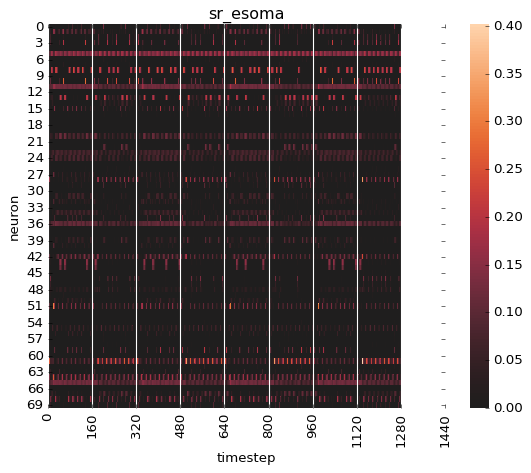

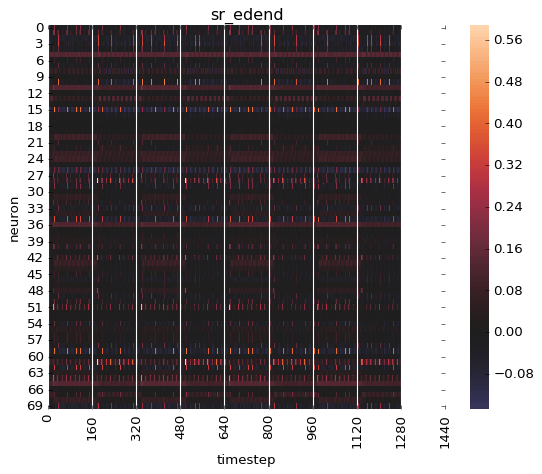

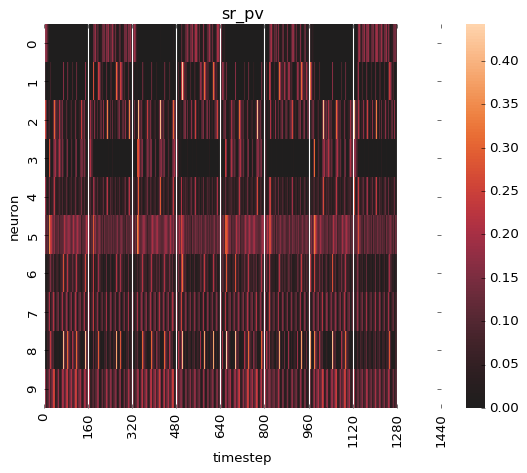

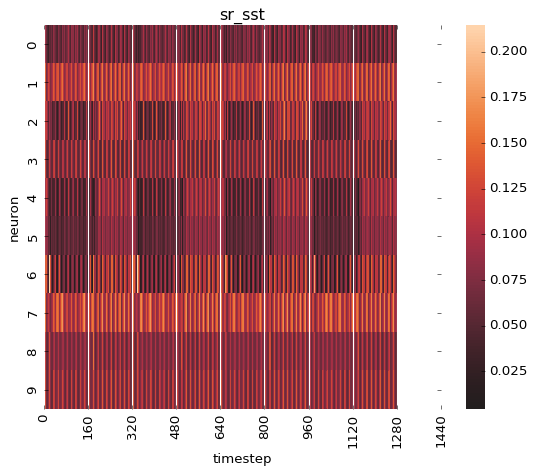

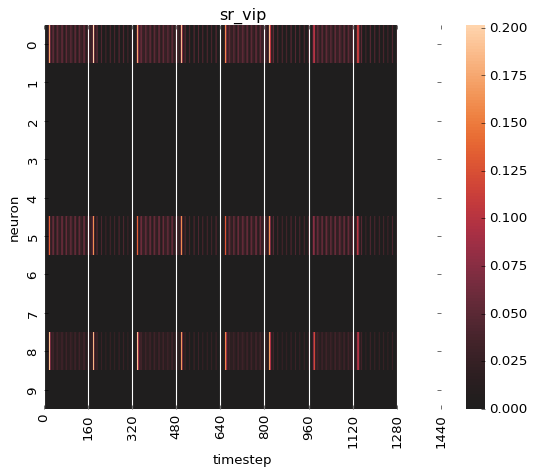

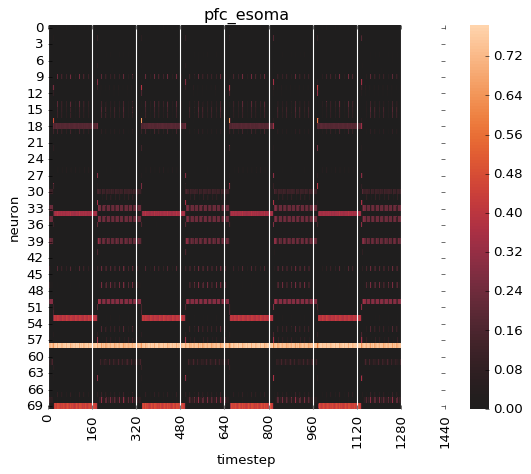

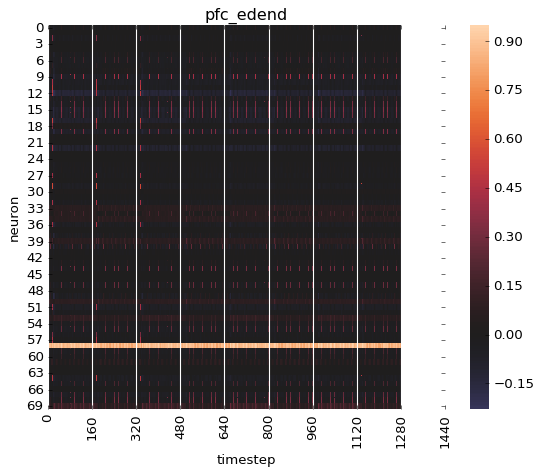

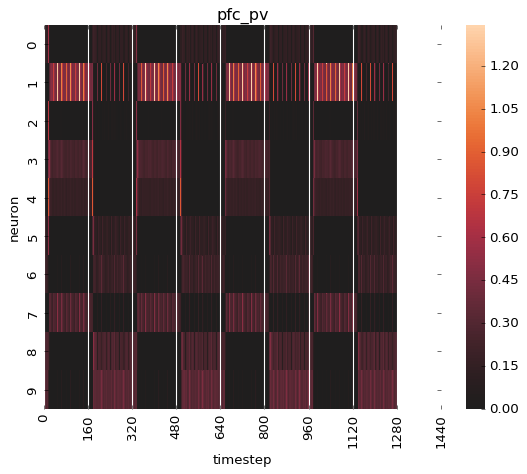

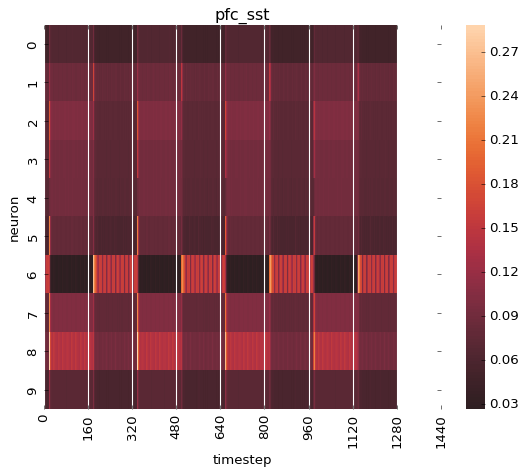

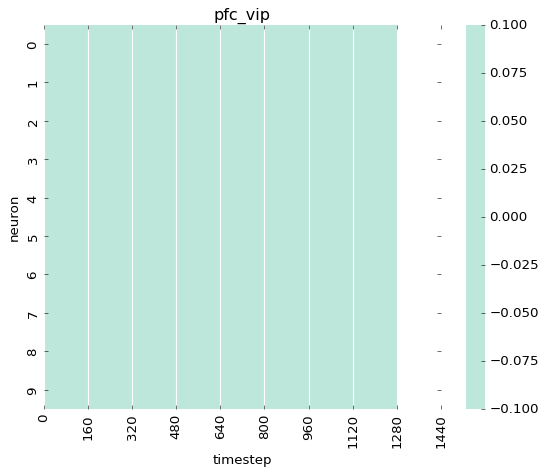

In [61]:
# plot the single neuron activity across trials

trial_len_ts = hp_task_test['trial_end']//hp_test['dt']

cgs = ['pfc_esoma', 'sr_edend', 'sr_sst', 'sr_vip']

for cg in model.rnn.cell_group_list:
#     fig = plt.figure(figsize=[15,5])
#     fig.patch.set_facecolor('white')
#     plt.style.use('classic')
#     cg_idx = model.rnn.cg_idx[cg]
#     plt.title(cg)
#     for n in cg_idx:
#         plt.plot(rnn_activity_concat[0,n,:])
#     plt.show()
    
    fig = plt.figure()
    fig.patch.set_facecolor('white')
    plt.style.use('classic')
    cg_idx = model.rnn.cg_idx[cg]
    plt.title(cg)
    sns.heatmap(rnn_activity_concat[0,cg_idx,:], center=0, square=False)
    for tr in np.arange(0, n_trials_test, step=switch_every_test):
        x = trial_len_ts*tr
        plt.axvline(x=x, color='white', linewidth=1)
    plt.xlabel('timestep')
    plt.xticks(ticks=np.arange(0, n_trials_test*trial_len_ts, step=switch_every_test*trial_len_ts), 
               labels=np.arange(0, n_trials_test*trial_len_ts, step=switch_every_test*trial_len_ts))
    plt.ylabel('neuron')
#     plt.xlim([0,1000])
    plt.show()



pfc_esoma
[0.79 0.11 0.05 0.02]
(1280, 4)


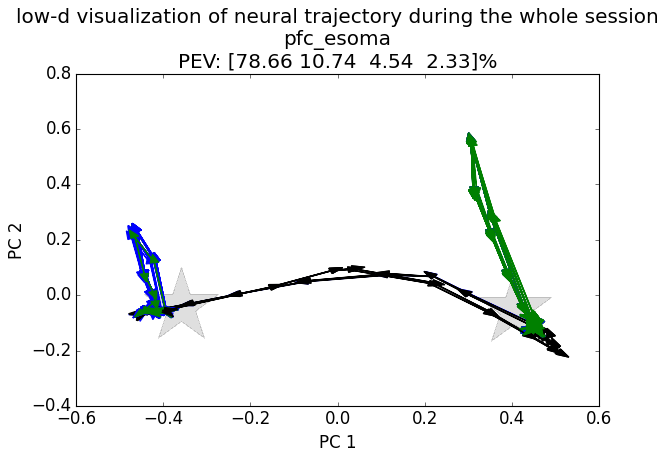

sr_esoma
[0.29 0.18 0.15 0.11]
(1280, 4)


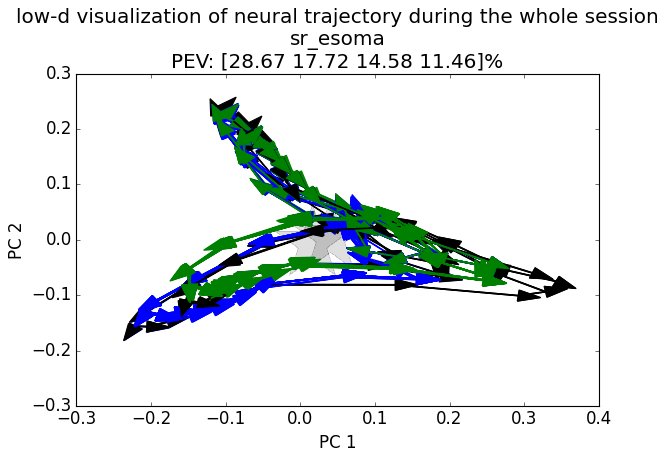

sr_edend
[0.45 0.22 0.17 0.09]
(1280, 4)


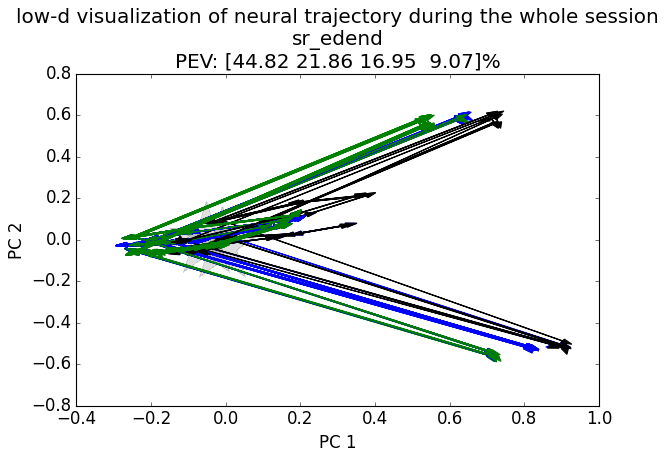

In [62]:
# Plot state space trajectory across trials
def plot_lowd_neural_traj(cg_idx, n_trs, switch_every, hp_task, hp):
    # TODO
    pass


trial_duration = (hp_task_test['trial_end'] - hp_task_test['trial_start'])//hp_test['dt']
total_tsteps = rnn_activity_concat.shape[-1]

switch_trs = [tr for tr in range(1, len(rules)) if rules[tr-1]!=rules[tr]]    # the index of the 1st trial of each rule block (during this trial, the network does not know that rule has switched)
switch_tsteps = np.array([np.arange(tr*trial_duration, tr*trial_duration+2*trial_duration) for tr in switch_trs]).flatten()
# switch_ts = [t for t in range(rnn_activity_concat.shape[-1]) if (((t//trial_duration)%switch_every_test==1 or (t//trial_duration)%switch_every_test==2)
#              and (t//trial_duration)//switch_every_test!=0)]    # the timesteps during the switching period

# for cg in model.rnn.cell_group_list:
for cg in ['pfc_esoma', 'sr_esoma', 'sr_edend']:
    print(cg)
    cg_idx = model.rnn.cg_idx[cg]
#     cg_idx = np.arange(model.rnn.total_n_neurons)
    
    pca = PCA(n_components=4)
    pca.fit(np.transpose(rnn_activity_concat[0, cg_idx, :]))
    
    
#     if cg not in ['pfc_esoma', 'sr_esoma']:    # pca on only the actual trajectories
#         pca.fit(np.transpose(rnn_activity_concat[0, cg_idx, :]))
#     elif cg in ['pfc_esoma', 'sr_esoma']:    # pca on the actual+probe trajectories
#         probe_data = []
#         for p in range(activity_probe_real.shape[0]):
#             probe_data.extend(np.transpose(activity_probe_real[p, cg_idx, :]))
#         probe_data = np.asarray(probe_data)
#         pca_data = np.concatenate((probe_data, np.transpose(rnn_activity_concat[0, cg_idx, :])), axis=0)
#         pca.fit(pca_data)

                                  
    rnn_activity_concat_lowd = pca.transform(np.transpose(rnn_activity_concat[0, cg_idx, :]))    # can change the neuron ids here
#     rnn_activity_concat_lowd = rnn_activity_concat_lowd[:,0:2]
    print(pca.explained_variance_ratio_)
    print(rnn_activity_concat_lowd.shape)
    
    left_states_lowd = pca.transform(left_states[:, cg_idx])
    right_states_lowd = pca.transform(right_states[:, cg_idx])
    
    stable_states_lowd = pca.transform(stable_states[:, cg_idx])
    
    
    
    
    fig = plt.figure(figsize=[8,6]); plt.rc('font', size=15)
    fig.patch.set_facecolor('white')
#     plt.scatter(x=rnn_activity_concat_lowd[:,0], y=rnn_activity_concat_lowd[:,1], alpha=0)    # to create an appropriate xlim and ylim for plt.arrow
    
    for t in range(total_tsteps):
        tr_id = t//trial_duration
        t_within_trial = t%trial_duration
        
        if False:
            continue
#         if tr_id!=0:
#             continue
#         if tr_id-1 not in switch_trs[2:3] and tr_id not in switch_trs[2:3]:
#             continue
#         if tr_id!=2:
#             continue
#         if stims[tr_id]!='A':
#             continue
#         if perfs[tr_id]!=1:
#             continue
#         if rules[tr_id]!='cxt1':
#             continue
#         if tr_id<=10:
#             continue
#         if tr_id in rule1_trs or tr_id in switch_trs or tr_id-1 in switch_trs:
#             continue
#         if tr_id in error_trials or tr_id==0:    # only look at correct trials and not include the first trial
#             continue
#         if stims[tr_id] not in ['C', 'D'] or rules[tr_id]!='cxt1':    # only look at 1 stimulus condition (to better look into the response states)
#             continue
#         if tr_id != 256:
#             continue
#         if tr_id-1 in switch_trs:    # plot the switch trial (2nd trial of the new rule block)
#             color = 'k'
#             alpha = 1
#         elif tr_id in switch_trs:     # plot the error trial (1st trial of the new rule block)
#             color = 'k'
#             alpha = 0.1
#         if tr_id not in rule2_trs_stable:
#             continue
            
#       # color by rule
        if tr_id in rule1_trs and tr_id-1 not in switch_trs:
            color = 'blue'
        elif tr_id in rule2_trs and tr_id-1 not in switch_trs:
            color = 'green'
        if tr_id-1 in switch_trs:
            color = 'k'

        # color by stimulus
#         if stims[tr_id]=='A':
#             color = 'blue'
#         elif stims[tr_id]=='B':
#             color = 'red'
#         elif stims[tr_id]=='C':
#             color = 'yellow'
#         elif stims[tr_id]=='D':
#             color = 'green'

        # color by response
#         if resp_list[tr_id]=='L':
#             color = 'blue'
#         elif resp_list[tr_id]=='R':
#             color = 'green'

#         if t not in switch_tsteps:
#             continue
#         if t>trial_duration:
#             continue
        
        # plot the actual neural trajectories
#         alpha = (t+10)/(rnn_activity_concat.shape[-1]+10)
        alpha = (t+1000)/(total_tsteps+1000)
#             alpha = 0
        x_pc = 0    # plot which PC on the x axis
        y_pc = 1    # plot which PC on the y axis
        if t>0:
            plt.arrow(x=rnn_activity_concat_lowd[t-1,x_pc], dx=rnn_activity_concat_lowd[t,x_pc]-rnn_activity_concat_lowd[t-1,x_pc], 
                      y=rnn_activity_concat_lowd[t-1,y_pc], dy=rnn_activity_concat_lowd[t,y_pc]-rnn_activity_concat_lowd[t-1,y_pc], 
                      width=0.001, head_width=0.02, color=color, alpha=1)

#         # label the epochs in the switch trials
#         if tr_id-1 in switch_trs and t_within_trial in np.arange(hp_task_test['stim_start']//hp_test['dt'], hp_task_test['stim_end']//hp_test['dt']):
#             plt.scatter(x=rnn_activity_concat_lowd[t, x_pc], y=rnn_activity_concat_lowd[t, y_pc], s=1000, color='k', marker='$s$')
#         if tr_id-1 in switch_trs and t_within_trial in np.arange(hp_task_test['stim_end']//hp_test['dt'], hp_task_test['resp_start']//hp_test['dt']):
#             plt.scatter(x=rnn_activity_concat_lowd[t, x_pc], y=rnn_activity_concat_lowd[t, y_pc], s=1000, color='k', marker='$d$')
#         if tr_id-1 in switch_trs and t_within_trial in np.arange(hp_task_test['resp_start']//hp_test['dt'], hp_task_test['resp_end']//hp_test['dt']):
#             plt.scatter(x=rnn_activity_concat_lowd[t, x_pc], y=rnn_activity_concat_lowd[t, y_pc], s=1000, color='k', marker='$r$')
        
#         # label the epochs in other trials
#         if t_within_trial in np.arange(hp_task_test['trial_history_start']/hp_test['dt'], hp_task_test['trial_history_end']/hp_test['dt']):    
#             plt.scatter(x=rnn_activity_concat_lowd[t,x_pc], y=rnn_activity_concat_lowd[t,y_pc], s=300, color=color, marker='s', alpha=0.5)    # mark the feedback period
#         if t_within_trial in np.arange(hp_task_test['trial_history_end']/hp_test['dt'], hp_task_test['stim_start']/hp_test['dt']):    
#             plt.scatter(x=rnn_activity_concat_lowd[t,x_pc], y=rnn_activity_concat_lowd[t,y_pc], s=300, color=color, marker='^', alpha=0.5)    # mark the first delay period
#         if t_within_trial in np.arange(hp_task_test['stim_start']/hp_test['dt'], hp_task_test['stim_end']/hp_test['dt']):    # mark the stimulus period
#             plt.scatter(x=rnn_activity_concat_lowd[t,x_pc], y=rnn_activity_concat_lowd[t,y_pc], s=1000, color=color, marker='o', alpha=0.5)
#         if t_within_trial in np.arange(hp_task_test['stim_end']/hp_test['dt'], hp_task_test['resp_start']/hp_test['dt']):    # mark the second delay period
#             plt.scatter(x=rnn_activity_concat_lowd[t,x_pc], y=rnn_activity_concat_lowd[t,y_pc], s=300, color=color, marker='1', alpha=0.5)
#         if t_within_trial in np.arange(hp_task_test['resp_start']/hp_test['dt'], hp_task_test['resp_end']/hp_test['dt']):    # mark the response period
#             plt.scatter(x=rnn_activity_concat_lowd[t,x_pc], y=rnn_activity_concat_lowd[t,y_pc], s=1000, color=color, marker='P', alpha=1)
        #         if t_within_trial==0:
#             plt.scatter(x=rnn_activity_concat_lowd[t,x_pc], y=rnn_activity_concat_lowd[t,y_pc], s=1000, color='red', marker='o', alpha=0.5)
        
    
#     # plot the probe trajectories
#     if cg in ['pfc_esoma', 'sr_esoma']:
#         for p in np.arange(0, n_probes, step=10):
# #             print(p)
#             state_lowd = pca.transform(np.transpose(activity_probe_real[p, cg_idx, :]))
#             start_tstep = 0
#         #     plt.scatter(x=state_lowd[start_tstep:,0], y=state_lowd[start_tstep:,1], s=2, alpha=0.2)
#             for t in range(n_tsteps-1):
#                 if t==0:
#                     plt.scatter(x=state_lowd[t,0], y=state_lowd[t,1], marker='o', s=200, color='red')
#                 if t<start_tstep:
#                     continue    # omit the initial transient
#         #         if t>8:    # only plot the period that overlaps with the actual trajectories
#         #             continue
#                 plt.arrow(x=state_lowd[t,0], dx=state_lowd[t+1,0]-state_lowd[t,0], y=state_lowd[t,1], dy=state_lowd[t+1,1]-state_lowd[t,1],
#                           width=0.01, head_length=0.2, head_width=0.2, color='k', alpha=0.01)
                
    # plot the stable states
    plt.scatter(x=stable_states_lowd[rule1_trs_stable, x_pc], y=stable_states_lowd[rule1_trs_stable, y_pc], s=5000, alpha=0.005, color='k', marker='*')
    plt.scatter(x=stable_states_lowd[rule2_trs_stable, x_pc], y=stable_states_lowd[rule2_trs_stable, y_pc], s=5000, alpha=0.005, color='k', marker='*')
    # plot the response states          
#     plt.scatter(x=left_states_lowd[:,x_pc], y=left_states_lowd[:,x_pc], s=1000, color='yellow', marker='.')
#     plt.scatter(x=right_states_lowd[:,x_pc], y=right_states_lowd[:,x_pc], s=1000, color='green', marker='.')
    
    plt.xlabel('PC {}'.format(x_pc+1))
    plt.ylabel('PC {}'.format(y_pc+1))
#     plt.xlim([0.7, 1.5])
#     plt.ylim([-0.5, 1.25])
    plt.title('low-d visualization of neural trajectory during the whole session\n{}\nPEV: {}%'.format(cg, pca.explained_variance_ratio_*100))
    fig.tight_layout()
    plt.show()

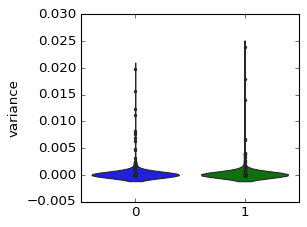

In [63]:
# compare the variability across time for individual neurons during different rules
n_neurons = rnn_activity.shape[2]
var_rule1 = np.zeros(n_neurons)
var_rule2 = np.zeros(n_neurons)
for n in model.rnn.cg_idx['pfc_esoma']:
    var_rule1[n] = np.var(rnn_activity[rule1_trs, 0, n, :].cpu().numpy())
    var_rule2[n] = np.var(rnn_activity[rule2_trs, 0, n, :].cpu().numpy())
    
fig = plt.figure(figsize=[4,3])
plt.rc('font', size=30)
plt.style.use('classic')
fig.patch.set_facecolor('white')
# plt.hist(var_rule1, alpha=0.5)
# plt.hist(var_rule2, alpha=0.5)
# plt.violinplot([var_rule1, var_rule2])
sns.violinplot(data = [var_rule1, var_rule2], inner="points")
plt.ylabel('variance')
fig.tight_layout()
plt.show()

In [64]:
# # look at drift

# state_over_trials = []

# nTrials = rnn_activity.shape[0]

# time_period = np.arange(hp_task_test['stim_start']//hp_test['dt'], hp_task_test['stim_end']//hp_test['dt'])
# neuron_id = model.rnn.cg_idx['sr_esoma']    # neuron groups to look at   

# for tr in range(nTrials):
#     if tr==0:
#         continue    # do not include the first trial
#     if stims[tr]!='A' or stims[tr-1]!='B' or perfs[tr]!=1 or rules[tr]!='cxt2':
# #         state_over_trials.append(np.zeros(len(neuron_id)))
#         continue    # only look at certain trials
#     rnn_activity_selected = rnn_activity[tr, 0, :, time_period][neuron_id, :]
#     state_at_this_tr = torch.mean(rnn_activity_selected, axis=-1)
#     state_over_trials.append(state_at_this_tr.detach().cpu().numpy())
# state_over_trials = np.asarray(state_over_trials)

# correlation_matrix = cosine_similarity(state_over_trials, state_over_trials)

# # print(correlation_matrix)

# fig = plt.figure()
# fig.patch.set_facecolor('white')
# plt.style.use('classic')
# sns.heatmap(correlation_matrix, square=True, center=0)
# # plt.xlim([0,200]);plt.ylim([0,200])
# plt.title('cosine similarity between neural states at different trials')
# plt.xlabel('trial')
# plt.ylabel('trial')
# plt.show()


# # clustering
# pca = PCA(n_components=2).fit(state_over_trials)
# state_over_trials_lowD = pca.transform(state_over_trials)
# # state_over_trials_lowD += 0.1*np.random.normal(size=state_over_trials_lowD.shape)

# fig = plt.figure()
# plt.style.use('classic')
# fig.patch.set_facecolor('white')
# plt.scatter(x=state_over_trials_lowD[:,0], y=state_over_trials_lowD[:,1], color='k', s=2)

## 2. What happens during switch?

In [ ]:
# Look at population dynamics during switching as well as the error signal

w_rew_eff = model.rnn.effective_weight(w=model.rnn.w_rew, mask=model.rnn.mask_rew).detach().cpu().numpy()
# error_signal = w_rew_eff[1, model.rnn.cg_idx['pfc_edend']] - w_rew_eff[0, model.rnn.cg_idx['pfc_edend']]    # difference between error and correct input
error_signal = w_rew_eff[1, model.rnn.cg_idx['pfc_edend']]

trial_duration = (hp_task_test['trial_end'] - hp_task_test['trial_start'])//hp_test['dt']
# total_tsteps = rnn_activity_concat.shape[-1]
switch_trs = [tr for tr in range(1, len(rules)) if rules[tr-1]!=rules[tr]]    # the index of the 1st trial of each rule block (the network does not know that rule has switched)
switch_tsteps = np.array([np.arange(tr*trial_duration+trial_duration, tr*trial_duration+2*trial_duration) for tr in switch_trs]).flatten()

cg_idx = model.rnn.cg_idx['pfc_esoma']
pca = PCA(n_components=2)
rule_state_lowd = pca.fit_transform(np.transpose(rnn_activity_concat[0, cg_idx, :]))    # can change the neuron ids here
error_signal_lowd = pca.transform(error_signal.reshape(1,-1))
print(pca.explained_variance_ratio_)

fig = plt.figure(figsize=[6,4]); plt.rc('font', size=12)
fig.patch.set_facecolor('white')
plt.scatter(x=rule_state_lowd[:,0], y=rule_state_lowd[:,1], alpha=0)    # to create an appropriate xlim and ylim for plt.arrow

for t in range(rnn_activity_concat.shape[-1]):
    tr_id = t//trial_duration
    if tr_id-1 not in switch_trs:
        continue
    if tr_id in rule1_trs:
        color = 'blue'
#         continue
    elif tr_id in rule2_trs:
        color = 'green'
#         continue

    if t>0:
#             plt.plot([rnn_activity_concat_lowd[t-1,0],rnn_activity_concat_lowd[t,0]],[rnn_activity_concat_lowd[t-1,1],rnn_activity_concat_lowd[t,1]], 
#                      color=color, linestyle='-', alpha=(t+100)/(rnn_activity_concat.shape[-1]+100))
        plt.arrow(x=rule_state_lowd[t-1,0], dx=rule_state_lowd[t,0]-rule_state_lowd[t-1,0], 
                  y=rule_state_lowd[t-1,1], dy=rule_state_lowd[t,1]-rule_state_lowd[t-1,1], 
                  width=0.001, head_width=0.05, color=color, alpha=(t+10)/(rnn_activity_concat.shape[-1]+10))
    plt.arrow(x=0, dx=error_signal_lowd[0][0], y=0, dy=error_signal_lowd[0][1], width=0.01, head_width=0.1, color='k')
    
#     if t%trial_duration in np.arange(hp_task_test['resp_start']/hp_test['dt'], hp_task_test['resp_end']/hp_test['dt']):    # mark the response period
#             plt.scatter(x=rule_state_lowd[t,0], y=rule_state_lowd[t,1], s=500, color='k', alpha=1, marker='$r$')
#     if t%trial_duration in np.arange(hp_task_test['stim_start']/hp_test['dt'], hp_task_test['stim_end']/hp_test['dt']):    # mark the stimulus period
#         plt.scatter(x=rule_state_lowd[t,0], y=rule_state_lowd[t,1], s=500, color='k', alpha=1, marker='$s$')
    
plt.xlabel('PC 1')
plt.ylabel('PC 2')
# plt.title('low-d visualization of neural trajectory during the whole session\n{}\nPEV: {}%'.format(, pca.explained_variance_ratio_*100))
fig.tight_layout()
plt.show()

In [ ]:
# single cell activity during switch and normal trials

cgs = ['pfc_esoma', 'pfc_pv', 'pfc_sst']
# cgs = ['pfc_sst']
switch_trs = [tr for tr in range(1, len(rules)) if rules[tr-1]!=rules[tr]]    # the index of the 1st trial of each rule block (the network does not know that rule has switched)
error_trials_after = [tr+1 for tr in error_trials]    # the trial after the error trial (the network receives the error feedback)
error_trials_after_rule1 = [tr for tr in error_trials_after if tr in rule1_trs]
error_trials_after_rule2 = [tr for tr in error_trials_after if tr in rule2_trs]
rule1_trs_after_correct = [tr for tr in rule1_trs if tr not in error_trials_after and tr not in error_trials]    # trials following a correct trial and belong to rule 1 and is itself not an error trial
rule2_trs_after_correct = [tr for tr in rule2_trs if tr not in error_trials_after and tr not in error_trials]

for cg in cgs:
    cg_idx = model.rnn.cg_idx[cg]
    cg_idx_sorted = [n for n in rule_sel_sorted.keys() if n in model.rnn.cg_idx[cg]]
    for n in cg_idx_sorted:
        fig = plt.figure(figsize=[8,5])
        plt.title('{} {}\nrule_sel={:0.4f}, norm. rule_sel={:0.4f}'.format(cg, n, rule_sel[n], rule_sel_normalized[n]))
        fig.patch.set_facecolor('white')
        for tr in range(rnn_activity.shape[0]):
            if tr in error_trials_after:    # plot the trials follow an error feedback
                if tr in rule1_trs:
                    color = 'green'
                    linestyle = 'dotted'
                elif tr in rule2_trs:
                    color = 'blue'
                    linestyle = 'dotted'
            elif tr in rule1_trs:
                color = 'blue'
                linestyle = 'solid'
            elif tr in rule2_trs:
                color = 'green'
                linestyle = 'solid'
#             plt.plot(rnn_activity[tr, 0, n, :], color=color, linestyle=linestyle, alpha=1, linewidth=0)
            
        plt.plot(np.mean(rnn_activity.cpu().numpy()[error_trials_after_rule1, 0, n,:], axis=0), alpha=0.5, linewidth=5, color='blue', linestyle='dashed', label='previous incorrect, now rule 1')
        plt.plot(np.mean(rnn_activity.cpu().numpy()[error_trials_after_rule2, 0, n,:], axis=0), alpha=0.5, linewidth=5, color='green', linestyle='dashed', label='previous incorrect, now rule 2')
        plt.plot(np.mean(rnn_activity.cpu().numpy()[rule1_trs_after_correct, 0, n,:], axis=0), alpha=0.5, linewidth=5, color='blue', linestyle='solid', label='previous correct, rule 1')
        plt.plot(np.mean(rnn_activity.cpu().numpy()[rule2_trs_after_correct, 0, n,:], axis=0), alpha=0.5, linewidth=5, color='green', linestyle='solid', label='previous correct, rule 2')
        
        plt.legend()
        plot_task_epochs(hp_task=hp_task_test, hp=hp_test, ax=fig.gca())
        plt.xlabel('Timestep')
        plt.ylabel('Activity')
        ax = plt.gca()
        ax.legend(bbox_to_anchor=(1, 1), prop={'size': 12})
        fig.tight_layout()
        plt.show()

In [ ]:
# input weights for reward/non-reward signal

w_rew_eff = model.rnn.effective_weight(w=model.rnn.w_rew, mask=model.rnn.mask_rew).detach().cpu().numpy()

fig = plt.figure()
fig.patch.set_facecolor('white')
plt.style.use('classic')
sns.heatmap(w_rew_eff.T, square=False)
plt.show()

fig = plt.figure(figsize=[15,5])
fig.patch.set_facecolor('white')
plt.style.use('classic')
for i in range(w_rew_eff.shape[0]):
    if i==0:
        label='reward'
#         continue
    if i==1:
        label='non-reward'
    plt.plot(w_rew_eff[i,model.rnn.input_targ_idx_pfc], label=label)
plt.legend()
plt.xlabel('PFC Edend idx')
plt.show()    # TODO: reward  signal targets broad population, non-reward signal targets narrow population?

In [ ]:
# does the conflict signal target neurons with higher rule selectivity?

w_rew_eff = model.rnn.effective_weight(w=model.rnn.w_rew, mask=model.rnn.mask_rew).detach().cpu().numpy()

fig = plt.figure(figsize=[5,4])
fig.patch.set_facecolor('white')
plt.style.use('classic')
plt.scatter(x=[error_signal_dict[n] for n in model.rnn.cg_idx['pfc_edend']], y=[rule_sel[k] for k in model.rnn.cg_idx['pfc_esoma']])
# plt.ylim([-1, 1])
plt.xlabel('input weight for conflict signal (to the dendrites)')
plt.ylabel('rule selectivity (for the corresponding soma)')
plt.show()


fig = plt.figure(figsize=[5,4])
fig.patch.set_facecolor('white')
plt.style.use('classic')
plt.scatter(x=[correct_signal_dict[n] for n in model.rnn.cg_idx['pfc_edend']], y=[rule_sel[k] for k in model.rnn.cg_idx['pfc_esoma']])
# plt.ylim([-1, 1])
plt.xlabel('input weight for correct feedback signal (to the dendrites)')
plt.ylabel('rule selectivity (for the corresponding soma)')
plt.show()

In [ ]:
# compute error selectivity
# trial_history_period = np.arange(hp_task_test['stim_start']//hp_test['dt'], hp_task_test['stim_end']//hp_test['dt'])
# error_trial_after = [tr+1 for tr in error_trials]    # 1 trial after the error trial (when the network receives the error feedback)

# FR_error = torch.mean(rnn_activity[error_trials_after, 0, :, hp_task_test['stim_start']//hp_test['dt']:hp_task_test['stim_end']//hp_test['dt']], axis=0)
# FR_correct = torch.mean(rnn_activity[correct_trials, 0, :, hp_task_test['stim_start']//hp_test['dt']:hp_task_test['stim_end']//hp_test['dt']], axis=0)

# # FR_error = torch.mean(rnn_activity[error_trial_after, 0, :, :], axis=0)
# # FR_correct = torch.mean(rnn_activity[correct_trials, 0, :, :], axis=0)

# act_error = torch.mean(FR_error, axis=-1)
# act_correct = torch.mean(FR_correct, axis=-1)
# # error_selectivity = (act_error - act_correct)/(act_error + act_correct)
# error_selectivity = (act_error - act_correct)
# error_selectivity = error_selectivity.numpy()

error_selectivity_array = np.array([error_selectivity[n] for n in error_selectivity.keys()])
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.style.use('classic')
plt.hist(error_selectivity_array[~np.isnan(error_selectivity_array)], bins=100)
plt.xlabel('error selectivity')
plt.ylabel('# neurons')

In [ ]:
# plot rule selectivity against error selectivity
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.style.use('classic')
for n in range(model.rnn.total_n_neurons):
    if n not in model.rnn.cg_idx['pfc_esoma']: 
        continue
    _rule_sel = rule_sel[n]
    _error_sel = error_selectivity[n]
    if np.isnan(_rule_sel) or np.isnan(_error_sel):
        continue
    plt.scatter(x=_error_sel, y=_rule_sel, color='k', s=10)
plt.xlabel('error selectivity')
plt.ylabel('rule selectivity')

In [ ]:
# plot error signal against error selectivity
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.style.use('classic')
for n in model.rnn.cg_idx['pfc_esoma']:
    dend_idx = n+70    # the corresponding index for dendrite
    if np.isnan(error_signal_dict[dend_idx])==False and np.isnan(error_selectivity[n])==False:
        plt.scatter(x=error_signal_dict[dend_idx], y=error_selectivity[n], color='k', s=10)
plt.xlabel('error signal onto PFC E dendrites')
plt.ylabel('error selectivity of the corresponding PFC E soma')
plt.show()

In [ ]:
# count inactive neurons
n_inactive = 0
for n in model.rnn.cg_idx['pfc_esoma']:
    print(n)
    if n in subcg_pfc_idx['mix_err_esoma_rule1']:
        print('error x rule1')
    elif n in subcg_pfc_idx['mix_err_esoma_rule2']:
        print('error x rule2')
    elif n in subcg_pfc_idx['mix_corr_esoma_rule1']:
        print('correct x rule1')
    elif n in subcg_pfc_idx['mix_corr_esoma_rule2']:
        print('correct x rule2')
    elif n in subcg_pfc_idx['rule1_esoma']:
        print('rule 1')
    elif n in subcg_pfc_idx['rule2_esoma']:
        print('rule 2')
    elif torch.mean(rnn_activity[:,0,n,:])==0:
        print('inactive')
        n_inactive += 1
    else:
        print('UNCLASSIFIED!')
print(n_inactive)

In [ ]:
# how does the conflict signal target rule neurons/mixed-selective neurons?
w_rew_eff = model.rnn.effective_weight(w=model.rnn.w_rew, mask=model.rnn.mask_rew).detach().cpu().numpy()

fig = plt.figure(figsize=[5,4])
fig.patch.set_facecolor('white')
plt.style.use('classic')
for n in model.rnn.cg_idx['pfc_edend']:
    if n in subcg_pfc_idx['rule1_edend'] or n in subcg_pfc_idx['rule2_edend']:  # rule_switching_neurons_id_dend:
        color = 'blue'
    elif n in subcg_pfc_idx['mix_err_edend_rule1'] or n in subcg_pfc_idx['mix_err_edend_rule2']:    # mixed_selective_neurons_id_dend:
        color = 'red'
#         continue
    elif n in subcg_pfc_idx['mix_corr_edend_rule1'] or n in subcg_pfc_idx['mix_corr_edend_rule2']:    # mixed_selective_neurons_id_dend_correct:
        color = 'green'
#         continue
    n_soma = n-70
    plt.scatter(x=error_signal_dict[n], y=rule_sel[n_soma], color=color)
# plt.ylim([-1, 1])
plt.xlabel('input weight for conflict signal (to the dendrites)')
plt.ylabel('rule selectivity (for the corresponding soma)')
plt.show()


fig = plt.figure(figsize=[5,4])
fig.patch.set_facecolor('white')
plt.style.use('classic')
for n in model.rnn.cg_idx['pfc_edend']:
    if n in subcg_pfc_idx['rule1_edend'] or n in subcg_pfc_idx['rule2_edend']:
        color = 'blue'
    elif n in subcg_pfc_idx['mix_err_edend_rule1'] or n in subcg_pfc_idx['mix_err_edend_rule2']:
        color = 'red'
#         continue
    elif n in subcg_pfc_idx['mix_corr_edend_rule1'] or n in subcg_pfc_idx['mix_corr_edend_rule2']:
        color = 'green'
#         continue
    n_soma = n-70
    plt.scatter(x=correct_signal_dict[n], y=rule_sel[n_soma], color=color)
# plt.ylim([-1, 1])
plt.xlabel('input weight for correct feedback signal (to the dendrites)')
plt.ylabel('rule selectivity (for the corresponding soma)')
plt.show()


In [ ]:
# connectivity between different subpopulations in PFC (systematic)
w_rec_eff = model.rnn.effective_weight(w=model.rnn.w_rec, mask=model.rnn.mask, w_fix=model.rnn.w_fix).detach().cpu().numpy()

# subcg_to_plot_sender = subcg_pfc
# subcg_to_plot_receiver = subcg_pfc

# within mix error
# subcg_to_plot_sender = ['mix_err_esoma_rule1', 'mix_err_esoma_rule2']
# subcg_to_plot_receiver = ['mix_err_esoma_rule1', 'mix_err_esoma_rule2']

# from rule to mix error
subcg_to_plot_sender = ['rule1_esoma', 'rule2_esoma']
subcg_to_plot_receiver = ['mix_err_esoma_rule1', 'mix_err_esoma_rule2']

# from mix error to rule
# subcg_to_plot_sender = ['mix_err_esoma_rule1', 'mix_err_esoma_rule2']
# subcg_to_plot_receiver = ['rule1_esoma', 'rule2_esoma']

# from mix error to rule PV
# subcg_to_plot_sender = ['mix_err_esoma_rule1', 'mix_err_esoma_rule2']
# subcg_to_plot_receiver = ['rule1_pv', 'rule2_pv']

# from PV to mixerr
# subcg_to_plot_sender = ['rule1_pv', 'rule2_pv']
# subcg_to_plot_receiver = ['mix_err_esoma_rule1', 'mix_err_esoma_rule2']

# within the rule subnetwork
# subcg_to_plot_sender = ['rule1_esoma', 'rule1_pv', 'rule2_esoma', 'rule2_pv']
# subcg_to_plot_receiver = ['rule1_esoma', 'rule1_pv', 'rule2_esoma', 'rule2_pv']

# from SST to the rest
# subcg_to_plot_sender = [subcg for subcg in subcg_pfc if 'sst' in subcg]
# subcg_to_plot_receiver = [subcg for subcg in subcg_pfc if 'edend' in subcg or 'pv' in subcg]

# from esoma to sst
# subcg_to_plot_sender = [subcg for subcg in subcg_pfc if 'esoma' in subcg]
# subcg_to_plot_receiver = [subcg for subcg in subcg_pfc if 'sst' in subcg]




#==================================================================#

neuron_id_aggr_sender = []    # aggregated neuron id
for subcg in subcg_to_plot_sender:
    neuron_id_aggr_sender += subcg_pfc_idx[subcg]
neuron_id_aggr_receiver = []    # aggregated neuron id
for subcg in subcg_to_plot_receiver:
    neuron_id_aggr_receiver += subcg_pfc_idx[subcg]
    
fig, ax = plt.subplots(figsize=[10,8])
fig.patch.set_facecolor('white')
plt.style.use('classic')
ax.set_title('Connectivity between different subpopulations\n within the PFC')
ax = sns.heatmap(w_rec_eff[np.ix_(neuron_id_aggr_sender, neuron_id_aggr_receiver)], square=True, center=0, cbar_kws={"shrink": .5})

# print(w_rec_eff)

vlines = []    # the lines on the heatmap separating different sub-populations
x = 0
for subcg in subcg_to_plot_receiver:
    x+=len(subcg_pfc_idx[subcg])
    vlines.append(x)
hlines = []    # the lines on the heatmap separating different sub-populations
y = 0
for subcg in subcg_to_plot_sender:
    y+=len(subcg_pfc_idx[subcg])
    hlines.append(y)
for x in vlines:
    ax.axvline(x=x, color='white', linewidth=2)
for y in hlines:
    ax.axhline(y=y, color='white', linewidth=2)
ax.set_xlabel('To')
ax.set_ylabel('From')

xticks = []
xticklabels = []
x_up = 0
for subcg in subcg_to_plot_receiver:
    if len(subcg_pfc_idx[subcg])==0:
        continue
    x_up += len(subcg_pfc_idx[subcg])
    xt = x_up - len(subcg_pfc_idx[subcg])//2
    xticks.append(xt)
    xticklabels.append(subcg)
yticks = []
yticklabels = []
y_up = 0
for subcg in subcg_to_plot_sender:
    if len(subcg_pfc_idx[subcg])==0:
        continue
    y_up += len(subcg_pfc_idx[subcg])
    yt = y_up - len(subcg_pfc_idx[subcg])//2
    yticks.append(yt)
    yticklabels.append(subcg)
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, rotation=90)
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels, rotation=0)
fig.tight_layout()
plt.show()

# print(w_rec_eff)
for subcg_sender in subcg_to_plot_sender:
    for subcg_receiver in subcg_to_plot_receiver:
        sender_idx = subcg_pfc_idx[subcg_sender]
        receiver_idx = subcg_pfc_idx[subcg_receiver]
        print('mean weight from {} to {}: {}'.format(subcg_sender, subcg_receiver, np.mean(w_rec_eff[np.ix_(sender_idx, receiver_idx)])))

In [ ]:
# # input to the mixed-selective/rule-switching neurons
# w_rec_eff = model.rnn.effective_weight(w=model.rnn.w_rec, mask=model.rnn.mask, w_fix=model.rnn.w_fix).detach().cpu().numpy()

# for n in subcg_pfc_idx['mix_err_esoma_rule1']+subcg_pfc_idx['mix_err_esoma_rule2']:
    
#     # plot the activity of the mixed-selective neuron
#     fig = plt.figure(figsize=[8,5])
#     fig.patch.set_facecolor('white')
#     plt.style.use('classic')
#     plt.title('neuron {}\nw_error to its dendrite={:0.4f}\nrule sel={:0.4f}'.format(n, w_rew_eff[1, n+70], rule_sel[n]))
#     plt.plot(np.mean(rnn_activity.detach().cpu().numpy()[error_trials_after_rule1, 0, n,:], axis=0), alpha=0.5, linewidth=5, color='blue', linestyle='dashed', label='previous incorrect, now rule 1')
#     plt.plot(np.mean(rnn_activity.detach().cpu().numpy()[error_trials_after_rule2, 0, n,:], axis=0), alpha=0.5, linewidth=5, color='green', linestyle='dashed', label='previous incorrect, now rule 2')
#     plt.plot(np.mean(rnn_activity.detach().cpu().numpy()[rule1_trs_after_correct, 0, n,:], axis=0), alpha=0.5, linewidth=5, color='blue', linestyle='solid', label='previous correct, rule 1')
#     plt.plot(np.mean(rnn_activity.detach().cpu().numpy()[rule2_trs_after_correct, 0, n,:], axis=0), alpha=0.5, linewidth=5, color='green', linestyle='solid', label='previous correct, rule 2')
#     plt.legend()
#     plot_task_epochs(hp_task=hp_task_test, hp=hp_test, ax=fig.gca())
#     plt.xlabel('Timestep')
#     plt.ylabel('Activity')
#     ax = plt.gca()
#     ax.legend(bbox_to_anchor=(1.1, 1), prop={'size': 12})
#     fig.tight_layout()
#     plt.show()
    
#     # see which neurons are most strongly projecting to it
#     weight_to_it = {}
#     for k in range(model.rnn.total_n_neurons):
#         weight_to_it[k] = w_rec_eff[k,n]
#     weight_to_it_sorted = {k: v for k, v in sorted(weight_to_it.items(), key=lambda item: np.abs(item[1]), reverse=True)}
    
#     current_to_it = {}    # or use current
#     for k in range(model.rnn.total_n_neurons):
#         current_to_it[k] = torch.mean(current_matrix[:,k,n,:]).detach().numpy()
#     current_to_it_sorted = {k: v for k, v in sorted(current_to_it.items(), key=lambda item: np.abs(item[1]), reverse=True)}
    
    
#     # plot the activity of the neurons that are most strongly coupled
#     i = 0
#     for kk in current_to_it_sorted.keys():
#         i += 1
#         if i>10:
#             break
#         fig = plt.figure(figsize=[12,4])
#         fig.patch.set_facecolor('white')
#         plt.style.use('classic')
#         plt.subplot(121)
#         if kk in model.rnn.e_idx and kk in model.rnn.soma_idx:    # if it is a E soma, look at the error/correct weights onto its dendrite
#             plt.title('The {}th most strongly coupled neuron ({}) to neuron {}\n weight={:0.4f}, current={:0.4f}, rule sel={:0.4f}\nerror weight={:0.4f}, correct weight={:0.4f}'
#                       .format(i, kk, n, weight_to_it_sorted[kk], current_to_it_sorted[kk], rule_sel[kk], error_signal_dict[kk+70], correct_signal_dict[kk+70]))
#         else:
#             plt.title('The {}th most strongly coupled neuron ({}) to neuron {}\n weight={:0.4f}, current={:0.4f}, rule sel={:0.4f}\nerror weight={:0.4f}, correct weight={:0.4f}'
#                       .format(i, kk, n, weight_to_it_sorted[kk], current_to_it_sorted[kk], rule_sel[kk], error_signal_dict[kk], correct_signal_dict[kk]))
#         plt.plot(np.mean(rnn_activity.detach().cpu().numpy()[error_trials_after_rule1, 0, kk,:], axis=0), alpha=0.5, linewidth=5, color='blue', linestyle='dashed', label='previous incorrect, now rule 1')
#         plt.plot(np.mean(rnn_activity.detach().cpu().numpy()[error_trials_after_rule2, 0, kk,:], axis=0), alpha=0.5, linewidth=5, color='green', linestyle='dashed', label='previous incorrect, now rule 2')
#         plt.plot(np.mean(rnn_activity.detach().cpu().numpy()[rule1_trs_after_correct, 0, kk,:], axis=0), alpha=0.5, linewidth=5, color='blue', linestyle='solid', label='previous correct, rule 1')
#         plt.plot(np.mean(rnn_activity.detach().cpu().numpy()[rule2_trs_after_correct, 0, kk,:], axis=0), alpha=0.5, linewidth=5, color='green', linestyle='solid', label='previous correct, rule 2')
#         plt.legend()
#         plot_task_epochs(hp_task=hp_task_test, hp=hp_test, ax=fig.gca())
#         plt.xlabel('Timestep')
#         plt.ylabel('Activity')
#         ax = plt.gca()
#         ax.legend(bbox_to_anchor=(1.1, 1), prop={'size': 8})
        
#         plt.subplot(122)
#         plt.title('Neuron {}'.format(n))
#         plt.plot(np.mean(rnn_activity.detach().cpu().numpy()[error_trials_after_rule1, 0, n,:], axis=0), alpha=0.5, linewidth=5, color='blue', linestyle='dashed', label='previous incorrect, now rule 1')
#         plt.plot(np.mean(rnn_activity.detach().cpu().numpy()[error_trials_after_rule2, 0, n,:], axis=0), alpha=0.5, linewidth=5, color='green', linestyle='dashed', label='previous incorrect, now rule 2')
#         plt.plot(np.mean(rnn_activity.detach().cpu().numpy()[rule1_trs_after_correct, 0, n,:], axis=0), alpha=0.5, linewidth=5, color='blue', linestyle='solid', label='previous correct, rule 1')
#         plt.plot(np.mean(rnn_activity.detach().cpu().numpy()[rule2_trs_after_correct, 0, n,:], axis=0), alpha=0.5, linewidth=5, color='green', linestyle='solid', label='previous correct, rule 2')
#         plt.legend()
#         plot_task_epochs(hp_task=hp_task_test, hp=hp_test, ax=fig.gca())
#         plt.xlabel('Timestep')
#         plt.ylabel('Activity')
#         ax = plt.gca()
#         ax.legend(bbox_to_anchor=(1.1, 1), prop={'size': 8})
        
        
#         fig.tight_layout()
#         plt.show()
        
    

In [ ]:
# # Decompose the input to single neurons

# sources = ['subcg_rule1_esoma', 'subcg_rule2_esoma', 'subcg_mix_err_esoma_rule1', 'subcg_mix_err_esoma_rule2']    # source populations
# colors = ['blue', 'green', 'red', 'yellow']

# for n in subcg_pfc_idx['mix_err_esoma_rule1']:
#     # plot the activity of the neuron
#     fig = plt.figure(figsize=[8,5])
#     fig.patch.set_facecolor('white')
#     plt.style.use('classic')
#     plt.title('neuron {}'.format(n))
#     plt.plot(np.mean(rnn_activity.detach().cpu().numpy()[error_trials_after_rule1, 0, n,:], axis=0), alpha=0.5, linewidth=5, color='blue', linestyle='dashed', label='previous incorrect, now rule 1')
#     plt.plot(np.mean(rnn_activity.detach().cpu().numpy()[error_trials_after_rule2, 0, n,:], axis=0), alpha=0.5, linewidth=5, color='green', linestyle='dashed', label='previous incorrect, now rule 2')
#     plt.plot(np.mean(rnn_activity.detach().cpu().numpy()[rule1_trs_after_correct, 0, n,:], axis=0), alpha=0.5, linewidth=5, color='blue', linestyle='solid', label='previous correct, rule 1')
#     plt.plot(np.mean(rnn_activity.detach().cpu().numpy()[rule2_trs_after_correct, 0, n,:], axis=0), alpha=0.5, linewidth=5, color='green', linestyle='solid', label='previous correct, rule 2')
#     plt.legend()
#     plot_task_epochs(hp_task=hp_task_test, hp=hp_test, ax=fig.gca())
#     plt.xlabel('Timestep')
#     plt.ylabel('Activity')
#     ax = plt.gca()
#     ax.legend(bbox_to_anchor=(1.1, 1), prop={'size': 12})
#     fig.tight_layout()
#     plt.show()
    
#     # plot the current under the 4 conditions
#     fig, ax=plt.subplots(2,2, figsize=[10,8])
#     fig.patch.set_facecolor('white')
#     plt.style.use('classic')
    
#     ax[0,0].set_title('Rule 1 trials following correct')
#     for i in range(len(sources)):
#         source_cg = sources[i]
#         mean_current_over_trials = torch.mean(current_matrix[:, model.rnn.cg_idx[source_cg], n, :][rule1_trs_stable,:,:], axis=0)
#         total_current_from_source = torch.sum(mean_current_over_trials, axis=0)
#         ax[0,0].plot(total_current_from_source.detach().numpy(), color=colors[i], label=source_cg)
#     ax[0,0].plot(torch.sum(torch.mean(current_matrix[:, :, n, :][rule1_trs_stable,:,:], axis=0), axis=0).detach().numpy(), lw=5, color='gray', label='total')
#     ax[0,0].axhline(y=0, color='k', linestyle='dotted')
#     ax[0,0].legend(bbox_to_anchor=(1.1, 1), prop={'size': 8})  
    
#     ax[0,1].set_title('Rule 2 trials following correct')
#     for i in range(len(sources)):
#         source_cg = sources[i]
#         mean_current_over_trials = torch.mean(current_matrix[:, model.rnn.cg_idx[source_cg], n, :][rule2_trs_stable,:,:], axis=0)
#         total_current_from_source = torch.sum(mean_current_over_trials, axis=0)
#         ax[0,1].plot(total_current_from_source.detach().numpy(), color=colors[i], label=source_cg)
#     ax[0,1].plot(torch.sum(torch.mean(current_matrix[:, :, n, :][rule2_trs_stable,:,:], axis=0), axis=0).detach().numpy(), lw=5, color='gray', label='total')
#     ax[0,1].axhline(y=0, color='k', linestyle='dotted')
# #     ax[0,1].legend(bbox_to_anchor=(1.1, 1), prop={'size': 12}) 
    
#     ax[1,0].set_title('Rule 1 trials following error (2->1)')
#     for i in range(len(sources)):
#         source_cg = sources[i]
#         mean_current_over_trials = torch.mean(current_matrix[:, model.rnn.cg_idx[source_cg], n, :][error_trials_after_rule1,:,:], axis=0)
#         total_current_from_source = torch.sum(mean_current_over_trials, axis=0)
#         ax[1,0].plot(total_current_from_source.detach().numpy(), color=colors[i], label=source_cg)
#     ax[1,0].plot(torch.sum(torch.mean(current_matrix[:, :, n, :][error_trials_after_rule1,:,:], axis=0), axis=0).detach().numpy(), lw=5, color='gray', label='total')
#     ax[1,0].axhline(y=0, color='k', linestyle='dotted')
# #     ax[1,0].legend(bbox_to_anchor=(1.1, 1), prop={'size': 12})  
    
#     ax[1,1].set_title('Rule 2 trials following error (1->2)')
#     for i in range(len(sources)):
#         source_cg = sources[i]
#         mean_current_over_trials = torch.mean(current_matrix[:, model.rnn.cg_idx[source_cg], n, :][error_trials_after_rule2,:,:], axis=0)
#         total_current_from_source = torch.sum(mean_current_over_trials, axis=0)
#         ax[1,1].plot(total_current_from_source.detach().numpy(), color=colors[i], label=source_cg)
#     ax[1,1].plot(torch.sum(torch.mean(current_matrix[:, :, n, :][error_trials_after_rule2,:,:], axis=0), axis=0).detach().numpy(), lw=5, color='gray', label='total')
#     ax[1,1].axhline(y=0, color='k', linestyle='dotted')
# #     ax[1,1].legend(bbox_to_anchor=(1.1, 0.5), prop={'size': 12}) 
    
#     fig.tight_layout()
#     plt.show()

In [ ]:
# Decompose the input to single neurons (avg across target population)

targ_cg = 'subcg_pfc_mix_err_esoma_rule2'
targ_cg_idx = model.rnn.cg_idx[targ_cg]
sources = ['subcg_rule1_esoma', 'subcg_rule2_esoma', 'subcg_mix_err_esoma_rule1', 'subcg_mix_err_esoma_rule2', 'pfc_edend']    # source populations
# sources = ['subcg_rule1_pv', 'subcg_rule2_pv', 'subcg_rule1_sst', 'subcg_rule2_sst', 'subcg_mix_err_sst_rule1', 'subcg_mix_err_sst_rule2']
# sources = ['subcg_rule1_sst', 'subcg_rule2_sst', 'subcg_mix_err_sst_rule1', 'subcg_mix_err_sst_rule2', 'subcg_mix_corr_sst_rule1', 'subcg_mix_corr_sst_rule2']
colors = ['blue', 'green', 'red', 'yellow', 'magenta', 'cyan', 'olive']
lw_neurons = 0    # linewidth for the current of each neuron
lw_avg = 3    # linewidth of the average current across target neurons


# rnn_activity = rnn_activity.detach().cpu().numpy()
# current_matrix = current_matrix.detach().cpu().numpy()


# plot the average activity of all neurons in the subpopulation
fig = plt.figure(figsize=[8,5])
fig.patch.set_facecolor('white')
plt.style.use('classic')
plt.title('Average response of '+targ_cg)
plt.plot(np.mean(rnn_activity.detach().cpu().numpy()[error_trials_after_rule1, 0,:,:][:,targ_cg_idx,:], axis=(0,1)), alpha=0.5, linewidth=5, color='blue', linestyle='dashed', label='previous incorrect, now rule 1')
plt.plot(np.mean(rnn_activity.detach().cpu().numpy()[error_trials_after_rule2, 0,:,:][:,targ_cg_idx,:], axis=(0,1)), alpha=0.5, linewidth=5, color='green', linestyle='dashed', label='previous incorrect, now rule 2')
plt.plot(np.mean(rnn_activity.detach().cpu().numpy()[rule1_trs_after_correct, 0,:,:][:,targ_cg_idx,:], axis=(0,1)), alpha=0.5, linewidth=5, color='blue', linestyle='solid', label='previous correct, rule 1')
plt.plot(np.mean(rnn_activity.detach().cpu().numpy()[rule2_trs_after_correct, 0,:,:][:,targ_cg_idx,:], axis=(0,1)), alpha=0.5, linewidth=5, color='green', linestyle='solid', label='previous correct, rule 2')
plt.legend()
plot_task_epochs(hp_task=hp_task_test, hp=hp_test, ax=fig.gca())
plt.xlabel('Timestep')
plt.ylabel('Activity')
ax = plt.gca()
ax.legend(bbox_to_anchor=(1.1, 1), prop={'size': 12})
fig.tight_layout()
plt.show()



# plot the current
fig, ax=plt.subplots(2,2, figsize=[10,8])
fig.patch.set_facecolor('white')
plt.style.use('classic')
ax[0,0].set_title('Rule 1 trials following correct')
ax[0,1].set_title('Rule 2 trials following correct')
ax[1,0].set_title('Rule 1 trials following error (2->1)')
ax[1,1].set_title('Rule 2 trials following error (1->2)')
for row in [0,1]:
    for col in [0,1]:
        ax[row,col].set_xlabel('Timestep')
        ax[row,col].set_ylabel('Current')


for n in targ_cg_idx:
    # plot the current under the 4 conditions
    for row in [0,1]:
        for col in [0,1]:
            if row==0 and col==0:
                trs = rule1_trs_stable
            elif row==0 and col==1:
                trs = rule2_trs_stable
            elif row==1 and col==0:
                trs = error_trials_after_rule1
            elif row==1 and col==1:
                trs = error_trials_after_rule2
                
            for i in range(len(sources)):
                source_cg = sources[i]
                if 'sst' in source_cg and 'esoma' in targ_cg:
                    mean_current_over_trials = np.mean(current_matrix.detach().cpu().numpy()[:, model.rnn.cg_idx[source_cg], n+70, :][trs,:,:], axis=0)    # look at the current to its dendrite
                else:
                    mean_current_over_trials = np.mean(current_matrix.detach().cpu().numpy()[:, model.rnn.cg_idx[source_cg], n, :][trs,:,:], axis=0)
                total_current_from_source = np.sum(mean_current_over_trials, axis=0)
                ax[row,col].plot(total_current_from_source, color=colors[i], lw=lw_neurons)
            ax[row,col].plot(np.sum(np.mean(current_matrix.detach().cpu().numpy()[:, :, n, :][trs,:,:], axis=0), axis=0), lw=lw_neurons, color='gray')
            ax[row,col].axhline(y=0, color='k', linestyle='dotted')
#             if n==targ_cg_idx[0] and row==0 and col==0:
#                 ax[row,col].legend(bbox_to_anchor=(1.1, 1), prop={'size': 8})         
  
        
# plot the average over target cells
for row in [0,1]:
    for col in [0,1]:
        if row==0 and col==0:
            trs = rule1_trs_stable
        elif row==0 and col==1:
            trs = rule2_trs_stable
        elif row==1 and col==0:
            trs = error_trials_after_rule1
        elif row==1 and col==1:
            trs = error_trials_after_rule2
        for i in range(len(sources)):
            source_cg = sources[i]
            if 'sst' in source_cg and 'esoma' in targ_cg:
                mean_current_over_trials = np.mean(current_matrix.detach().cpu().numpy()[:, model.rnn.cg_idx[source_cg], :, :][:, :, [t+70 for t in targ_cg_idx], :][trs,:,:], axis=0)
            else:
                mean_current_over_trials = np.mean(current_matrix.detach().cpu().numpy()[:, model.rnn.cg_idx[source_cg], :, :][:, :, targ_cg_idx, :][trs,:,:], axis=0)
            mean_current_over_trials_and_targets = np.mean(mean_current_over_trials, axis=1)
            total_current_from_source = np.sum(mean_current_over_trials_and_targets, axis=0)
            ax[row,col].plot(total_current_from_source, color=colors[i], label=source_cg, alpha=0.5, lw=lw_avg)
        ax[row,col].plot(np.sum(np.mean(current_matrix.detach().cpu().numpy()[:, :, targ_cg_idx, :][trs,:,:], axis=(0,2)), axis=0), lw=lw_avg, alpha=1, color='gray', label='total')
        ax[row,col].axhline(y=0, color='k', linestyle='dotted')

ax[0,0].legend(bbox_to_anchor=(1.1, 0.5), prop={'size': 8})         

fig.tight_layout()
plt.show()

## 3. Gating?

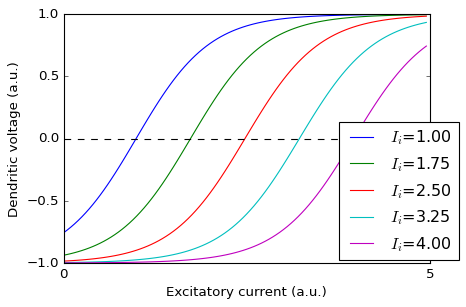

In [65]:
# plot the dendritic nonlinearity
g_i_list = np.linspace(1,4,num=5)
g_e_list = np.linspace(0,5,num=100)
dend_activity = np.zeros([len(g_i_list), len(g_e_list)])
for g_i_id in np.arange(len(g_i_list)):
    g_i = g_i_list[g_i_id]
    for g_e_id in np.arange(len(g_e_list)):
        g_e = g_e_list[g_e_id]
        dend_activity[g_i_id, g_e_id] = model.rnn.nonlinearity_dend(g_e=torch.Tensor([g_e]), g_i=torch.Tensor([g_i]))

fig = plt.figure(figsize=[6,4])
plt.rc('font', size=15)
fig.patch.set_facecolor('white')
plt.style.use('classic')
# plt.title('Nonlinear dendrites gate excitation \n Mean I current {:0.4f}, mean E current {:0.4f}'.format(avg_gi, avg_ge))
for g_i_id in np.arange(len(g_i_list)):
    plt.plot(dend_activity[g_i_id,:], label='$I_i$={:0.2f}'.format(g_i_list[g_i_id]))
plt.legend(bbox_to_anchor=(1.1, 0.6))
plt.xlabel('Excitatory current (a.u.)')
plt.ylabel('Dendritic voltage (a.u.)')
plt.axhline(y=model.rnn.nonlinearity_dend(g_e=torch.Tensor([0]), g_i=torch.Tensor([0])), linestyle='--', color='k')
xticks = np.linspace(min(g_e_list), max(g_e_list), num=2, dtype=np.int)
xtickpos = np.linspace(0,len(g_e_list), num=2)
plt.xticks(xtickpos, xticks)
fig.tight_layout()

sr_esoma
[0.29 0.18 0.15 0.11]
(1280, 4)


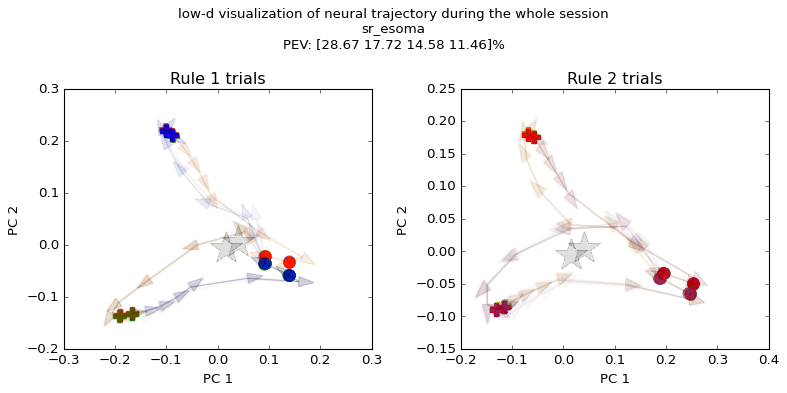

sr_edend
[0.45 0.22 0.17 0.09]
(1280, 4)


KeyboardInterrupt: 

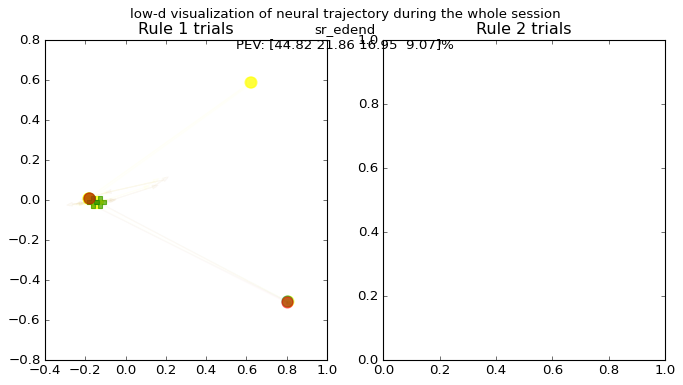

In [66]:
# Plot state space trajectory across trials

trial_duration = (hp_task_test['trial_end'] - hp_task_test['trial_start'])//hp_test['dt']
total_tsteps = rnn_activity_concat.shape[-1]

x_pc = 0    # plot which PC on the x axis
y_pc = 1    # plot which PC on the y axis
    
    
for cg in ['sr_esoma', 'sr_edend']:
    print(cg)
    cg_idx = model.rnn.cg_idx[cg]
    
    pca = PCA(n_components=4)
    pca.fit(np.transpose(rnn_activity_concat[0, cg_idx, :]))
                                  
    rnn_activity_concat_lowd = pca.transform(np.transpose(rnn_activity_concat[0, cg_idx, :]))    # can change the neuron ids here
    print(pca.explained_variance_ratio_)
    print(rnn_activity_concat_lowd.shape)
    
    left_states_lowd = pca.transform(left_states[:, cg_idx])
    right_states_lowd = pca.transform(right_states[:, cg_idx])
    stable_states_lowd = pca.transform(stable_states[:, cg_idx])
    
    
    
    
    fig, ax = plt.subplots(1,2, figsize=[10,5]); plt.rc('font', size=15)
    fig.patch.set_facecolor('white')
    plt.style.use('classic')
    fig.suptitle('low-d visualization of neural trajectory during the whole session\n{}\nPEV: {}%'.format(cg, pca.explained_variance_ratio_*100))
    ax[0].set_title('Rule 1 trials')
    ax[1].set_title('Rule 2 trials')
#     plt.scatter(x=rnn_activity_concat_lowd[:,0], y=rnn_activity_concat_lowd[:,1], alpha=0)    # to create an appropriate xlim and ylim for plt.arrow
    
    for t in range(total_tsteps):
        tr_id = t//trial_duration
        t_within_trial = t%trial_duration
        
        if (tr_id not in rule1_trs_stable and tr_id not in rule2_trs_stable) or tr_id==0:
            continue
            

        # color by stimulus
        if stims[tr_id]=='A':
            color = 'blue'
        elif stims[tr_id]=='B':
            color = 'red'
        elif stims[tr_id]=='C':
            color = 'yellow'
        elif stims[tr_id]=='D':
            color = 'green'

#         alpha = (t+1000)/(total_tsteps+1000)
        alpha = 0.01
        
        if t>0:
            if rules[tr_id]=='cxt1':
                ax[0].arrow(x=rnn_activity_concat_lowd[t-1,x_pc], dx=rnn_activity_concat_lowd[t,x_pc]-rnn_activity_concat_lowd[t-1,x_pc], 
                            y=rnn_activity_concat_lowd[t-1,y_pc], dy=rnn_activity_concat_lowd[t,y_pc]-rnn_activity_concat_lowd[t-1,y_pc], 
                            width=0.001, head_width=0.02, color=color, alpha=alpha)
            elif rules[tr_id]=='cxt2':
                ax[1].arrow(x=rnn_activity_concat_lowd[t-1,x_pc], dx=rnn_activity_concat_lowd[t,x_pc]-rnn_activity_concat_lowd[t-1,x_pc], 
                            y=rnn_activity_concat_lowd[t-1,y_pc], dy=rnn_activity_concat_lowd[t,y_pc]-rnn_activity_concat_lowd[t-1,y_pc], 
                            width=0.001, head_width=0.02, color=color, alpha=alpha)

        
#         # label the epochs in other trials
#         if t_within_trial in np.arange(hp_task_test['trial_history_start']/hp_test['dt'], hp_task_test['trial_history_end']/hp_test['dt']):    
#             plt.scatter(x=rnn_activity_concat_lowd[t,x_pc], y=rnn_activity_concat_lowd[t,y_pc], s=300, color=color, marker='s', alpha=0.5)    # mark the feedback period
#         if t_within_trial in np.arange(hp_task_test['trial_history_end']/hp_test['dt'], hp_task_test['stim_start']/hp_test['dt']):    
#             plt.scatter(x=rnn_activity_concat_lowd[t,x_pc], y=rnn_activity_concat_lowd[t,y_pc], s=300, color=color, marker='^', alpha=0.5)    # mark the first delay period
        if t_within_trial in np.arange(hp_task_test['stim_start']/hp_test['dt'], hp_task_test['stim_end']/hp_test['dt']):    # mark the stimulus period
            if rules[tr_id]=='cxt1':
                ax[0].scatter(x=rnn_activity_concat_lowd[t,x_pc], y=rnn_activity_concat_lowd[t,y_pc], s=100, color=color, marker='o', alpha=0.5)
            elif rules[tr_id]=='cxt2':
                ax[1].scatter(x=rnn_activity_concat_lowd[t,x_pc], y=rnn_activity_concat_lowd[t,y_pc], s=100, color=color, marker='o', alpha=0.5)
#         if t_within_trial in np.arange(hp_task_test['stim_end']/hp_test['dt'], hp_task_test['resp_start']/hp_test['dt']):    # mark the second delay period
#             plt.scatter(x=rnn_activity_concat_lowd[t,x_pc], y=rnn_activity_concat_lowd[t,y_pc], s=300, color=color, marker='1', alpha=0.5)
        if t_within_trial in np.arange(hp_task_test['resp_start']/hp_test['dt'], hp_task_test['resp_end']/hp_test['dt']):    # mark the response period
            if rules[tr_id]=='cxt1':
                ax[0].scatter(x=rnn_activity_concat_lowd[t,x_pc], y=rnn_activity_concat_lowd[t,y_pc], s=100, color=color, marker='P', alpha=0.5)
            elif rules[tr_id]=='cxt2':
                ax[1].scatter(x=rnn_activity_concat_lowd[t,x_pc], y=rnn_activity_concat_lowd[t,y_pc], s=100, color=color, marker='P', alpha=0.5)
        #         if t_within_trial==0:
#             plt.scatter(x=rnn_activity_concat_lowd[t,x_pc], y=rnn_activity_concat_lowd[t,y_pc], s=1000, color='red', marker='o', alpha=0.5)
        
    # plot the stable states
    ax[0].scatter(x=stable_states_lowd[rule1_trs_stable, x_pc], y=stable_states_lowd[rule1_trs_stable, y_pc], s=1000, alpha=0.005, color='k', marker='*')
    ax[0].scatter(x=stable_states_lowd[rule2_trs_stable, x_pc], y=stable_states_lowd[rule2_trs_stable, y_pc], s=1000, alpha=0.005, color='k', marker='*')
    ax[1].scatter(x=stable_states_lowd[rule1_trs_stable, x_pc], y=stable_states_lowd[rule1_trs_stable, y_pc], s=1000, alpha=0.005, color='k', marker='*')
    ax[1].scatter(x=stable_states_lowd[rule2_trs_stable, x_pc], y=stable_states_lowd[rule2_trs_stable, y_pc], s=1000, alpha=0.005, color='k', marker='*')
    # plot the response states          
#     plt.scatter(x=left_states_lowd[:,x_pc], y=left_states_lowd[:,x_pc], s=1000, color='yellow', marker='.')
#     plt.scatter(x=right_states_lowd[:,x_pc], y=right_states_lowd[:,x_pc], s=1000, color='green', marker='.')
    
    ax[0].set_xlabel('PC {}'.format(x_pc+1))
    ax[0].set_ylabel('PC {}'.format(y_pc+1))
    ax[1].set_xlabel('PC {}'.format(x_pc+1))
    ax[1].set_ylabel('PC {}'.format(y_pc+1))
#     plt.xlim([0.7, 1.5])
#     plt.ylim([-0.5, 1.25])
    
    fig.tight_layout()
    plt.show()

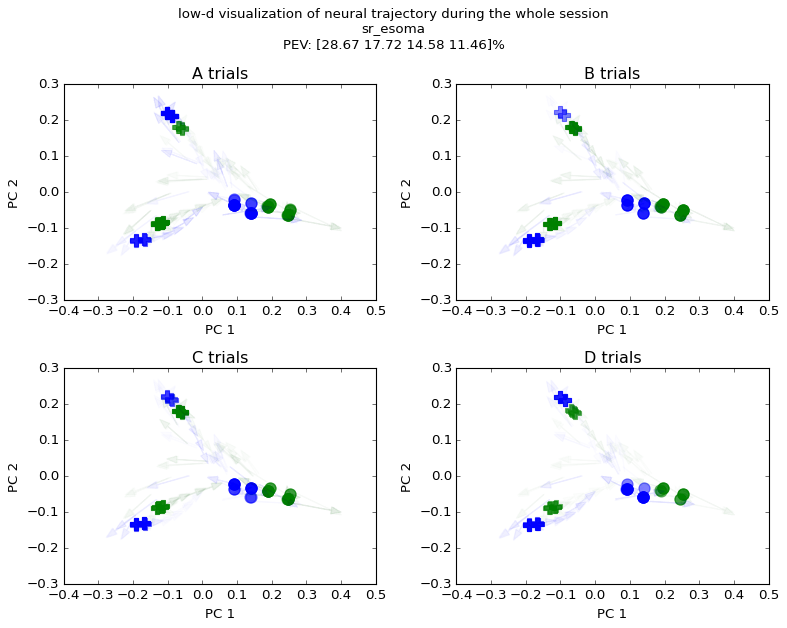

In [67]:
# Plot state space trajectory across trials

trial_duration = (hp_task_test['trial_end'] - hp_task_test['trial_start'])//hp_test['dt']
total_tsteps = rnn_activity_concat.shape[-1]

x_pc = 0    # plot which PC on the x axis
y_pc = 1    # plot which PC on the y axis
    
    
for cg in ['sr_esoma']:
    cg_idx = model.rnn.cg_idx[cg]
    
    pca = PCA(n_components=4)
    pca.fit(np.transpose(rnn_activity_concat[0, cg_idx, :]))               
    rnn_activity_concat_lowd = pca.transform(np.transpose(rnn_activity_concat[0, cg_idx, :]))    # can change the neuron ids here
#     print(pca.explained_variance_ratio_)
#     print(rnn_activity_concat_lowd.shape)
    
    left_states_lowd = pca.transform(left_states[:, cg_idx])
    right_states_lowd = pca.transform(right_states[:, cg_idx])
    stable_states_lowd = pca.transform(stable_states[:, cg_idx])
    

    fig, ax = plt.subplots(2,2, figsize=[10,8]); plt.rc('font', size=15)
    fig.patch.set_facecolor('white')
    plt.style.use('classic')
    fig.suptitle('low-d visualization of neural trajectory during the whole session\n{}\nPEV: {}%'.format(cg, pca.explained_variance_ratio_*100))
    
    ax[0,0].set_title('A trials')
    ax[0,1].set_title('B trials')
    ax[1,0].set_title('C trials')
    ax[1,1].set_title('D trials')
    
    for i in range(ax.shape[0]):
        for j in range(ax.shape[1]):
            ax[i,j].set_xlabel('PC {}'.format(x_pc+1))
            ax[i,j].set_ylabel('PC {}'.format(y_pc+1))
            ax[i,j].scatter(x=rnn_activity_concat_lowd[:,x_pc], y=rnn_activity_concat_lowd[:,y_pc], alpha=0)    # to create an appropriate xlim and ylim 
    
    for t in range(total_tsteps):
        tr_id = t//trial_duration
        t_within_trial = t%trial_duration
        
        if (tr_id not in rule1_trs_stable and tr_id not in rule2_trs_stable) or tr_id==0:
            continue
            

        # color by rule
        if rules[tr_id]=='cxt1':
            color = 'blue'
        elif rules[tr_id]=='cxt2':
            color = 'green'
        
        # which panel to draw
        if stims[tr_id]=='A':
            axx = ax[0,0]
        elif stims[tr_id]=='B':
            axx = ax[0,1]
        elif stims[tr_id]=='C':
            axx = ax[1,0]
        elif stims[tr_id]=='D':
            axx = ax[1,1]

#         alpha = (t+1000)/(total_tsteps+1000)
        alpha = 0.01
        
        if t>=0:
            state_x = rnn_activity_concat_lowd[t,x_pc]
            state_y = rnn_activity_concat_lowd[t,y_pc]
            state_x_prev = rnn_activity_concat_lowd[t-1,x_pc]
            state_y_prev = rnn_activity_concat_lowd[t-1,y_pc]
            
            # plot the trajectory
            axx.arrow(x=state_x, dx=state_x-state_x_prev, y=state_y, dy=state_y-state_y_prev, width=0.001, head_width=0.02, color=color, alpha=alpha)
            
            
            # mark task epochs
#             if t_within_trial in np.arange(hp_task_test['trial_history_start']/hp_test['dt'], hp_task_test['trial_history_end']/hp_test['dt']):
#                 axx.scatter(x=state_x, y=state_y, s=100, color=color, marker='s', alpha=0.5)
            
#             if t_within_trial in np.arange(hp_task_test['trial_history_end']/hp_test['dt'], hp_task_test['stim_start']/hp_test['dt']):  
#                 axx.scatter(x=state_x, y=state_y, s=100, color=color, marker='^', alpha=0)
                
            if t_within_trial in np.arange(hp_task_test['stim_start']/hp_test['dt'], hp_task_test['stim_end']/hp_test['dt']):    # mark the stimulus period
                axx.scatter(x=state_x, y=state_y, s=100, color=color, marker='o', alpha=0.5)
        
            if t_within_trial in np.arange(hp_task_test['resp_start']/hp_test['dt'], hp_task_test['resp_end']/hp_test['dt']):    # mark the response period
                axx.scatter(x=state_x, y=state_y, s=100, color=color, marker='P', alpha=0.5)
                
                

    fig.tight_layout()
    plt.show()

In [ ]:
# plot current

total_tsteps = rnn_activity_concat.shape[-1]

for sender, receiver in [('pfc_esoma', 'sr_edend'), ('pfc_esoma', 'sr_pv'),
                         ('pfc_esoma', 'sr_vip'), ('pfc_esoma', 'sr_sst'), ('sr_vip', 'sr_sst'), ('sr_sst', 'sr_edend'), 
                         ('sr_sst', 'sr_vip'),
                         ('sr_edend', 'sr_esoma'), ('sr_esoma', 'sr_esoma'), ('sr_pv', 'sr_esoma'),
                         ('sr_esoma', 'pfc_edend')]:
    print(sender, receiver)
    if model.rnn.is_connected(receiver, sender) is False:
        print('{} does not project to {}'.format(sender, receiver))
        continue

    sender_id = model.rnn.cg_idx[sender]
    receiver_id = model.rnn.cg_idx[receiver]

    current = torch.movedim(rnn_activity[:,:,sender_id,:], -2, -1)@\
                        model.rnn.effective_weight(w=model.rnn.w_rec, mask=model.rnn.mask, w_fix=model.rnn.w_fix)[np.ix_(sender_id, receiver_id)]
    current = torch.movedim(current, -2, -1)
#     print(current.shape)

    # concatenate all trials along the time dimension. rnn_activity shape = n_batches*n_neurons*n_totaltimesteps
    for tr in range(current.shape[0]):
        if tr==0:
            current_concat = current[tr,:,:,:]
        else:
            current_concat = torch.cat((current_concat, current[tr,:,:,:]), dim=-1)
#     print(current_concat.shape)


    pca = PCA(n_components=2)
    current_concat_lowd = pca.fit_transform(np.transpose(current_concat.detach().numpy()[0,:,:]))    # take the 1st sample in a batch
    print(pca.explained_variance_ratio_)

    fig = plt.figure(figsize=[6,5])
    fig.patch.set_facecolor('white')
    plt.style.use('classic')
    plt.rc('font', size=12)
    for t in range(total_tsteps):
        alpha = (t+10)/(total_tsteps+10)    # such that alpha is never 0
        tr_id = t//trial_duration
        if tr_id-1 in switch_trs:    # plot the switch trial
            color = 'k'
#             print('switch trial {}'.format(tr_id))
        elif tr_id in rule1_trs:
            color = 'blue'
        elif tr_id in rule2_trs:
            color = 'green'
    #     plt.scatter(x=current_concat_lowd[t,0], y=current_concat_lowd[t,1], c=color, alpha=alpha)
        if t>0:
#             print(color)
            plt.arrow(x=current_concat_lowd[t-1,0], dx=current_concat_lowd[t,0]-current_concat_lowd[t-1,0], 
                      y=current_concat_lowd[t-1,1], dy=current_concat_lowd[t,1]-current_concat_lowd[t-1,1], 
                      width=0.0001, head_width=0, head_length=0, color=color, alpha=alpha)
#                 plt.plot([current_concat_lowd[t-1,0],current_concat_lowd[t,0]],[current_concat_lowd[t-1,1],current_concat_lowd[t,1]], 
#                          color=color, linestyle='-', alpha=alpha)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.title('low-d visualization of current across a session\n{} to {}\nPEV: {}%'.format(sender, receiver, pca.explained_variance_ratio_*100))
    fig.tight_layout()
    plt.show()

sr_esoma is connected to sr_esoma
sr_esoma is not connected to sr_edend
sr_esoma is connected to sr_pv
sr_esoma is connected to sr_sst
sr_esoma is not connected to sr_vip
sr_esoma is not connected to pfc_esoma
sr_esoma is connected to pfc_edend
sr_esoma is connected to pfc_pv
sr_esoma is not connected to pfc_sst
sr_esoma is not connected to pfc_vip
sr_edend is connected to sr_esoma
sr_edend is not connected to sr_edend
sr_edend is not connected to sr_pv
sr_edend is not connected to sr_sst
sr_edend is not connected to sr_vip
sr_edend is not connected to pfc_esoma
sr_edend is not connected to pfc_edend
sr_edend is not connected to pfc_pv
sr_edend is not connected to pfc_sst
sr_edend is not connected to pfc_vip
sr_pv is connected to sr_esoma
sr_pv is not connected to sr_edend
sr_pv is connected to sr_pv
sr_pv is not connected to sr_sst
sr_pv is not connected to sr_vip
sr_pv is not connected to pfc_esoma
sr_pv is not connected to pfc_edend
sr_pv is not connected to pfc_pv
sr_pv is not conn

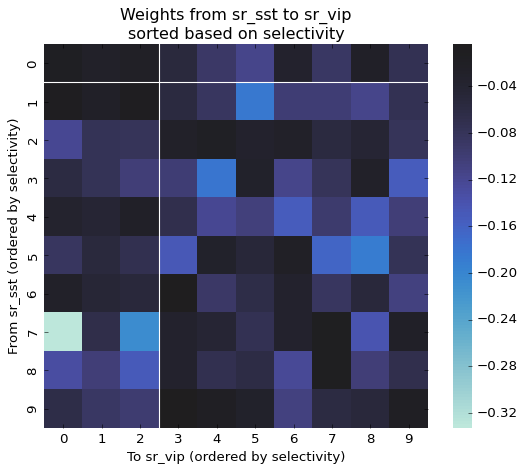

sender id boundary = [1], receiver id boudary = [3]


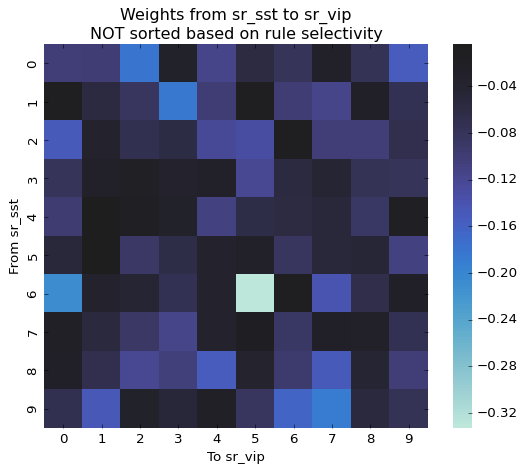

sr_sst is not connected to pfc_esoma
sr_sst is not connected to pfc_edend
sr_sst is not connected to pfc_pv
sr_sst is not connected to pfc_sst
sr_sst is not connected to pfc_vip
sr_vip is not connected to sr_esoma
sr_vip is not connected to sr_edend
sr_vip is not connected to sr_pv
sr_vip is connected to sr_sst
sr_vip is not connected to sr_vip
sr_vip is not connected to pfc_esoma
sr_vip is not connected to pfc_edend
sr_vip is not connected to pfc_pv
sr_vip is not connected to pfc_sst
sr_vip is not connected to pfc_vip
pfc_esoma is not connected to sr_esoma
pfc_esoma is not connected to sr_edend
pfc_esoma is not connected to sr_pv
pfc_esoma is not connected to sr_sst
pfc_esoma is connected to sr_vip
pfc_esoma is connected to pfc_esoma
pfc_esoma is not connected to pfc_edend
pfc_esoma is connected to pfc_pv
pfc_esoma is connected to pfc_sst
pfc_esoma is not connected to pfc_vip
pfc_edend is not connected to sr_esoma
pfc_edend is not connected to sr_edend
pfc_edend is not connected to sr

In [83]:
# plot the weight matrices with neurons ordered by selectivity

w_rec_eff = model.rnn.effective_weight(w=model.rnn.w_rec, mask=model.rnn.mask, w_fix=model.rnn.w_fix).detach().cpu().numpy()
sel_used_sender = rule_sel_normalized_activity
sel_used_receiver = rule_sel_normalized_activity
sel_used_sorted_sender = {k: v for k, v in sorted(sel_used_sender.items(), key=lambda item: item[1])}
sel_used_sorted_receiver = {k: v for k, v in sorted(sel_used_receiver.items(), key=lambda item: item[1])}




for sender in model.rnn.cell_group_list:
    for receiver in model.rnn.cell_group_list:
        if model.rnn.is_connected(receiver, sender)==False:
            print('{} is not connected to {}'.format(sender, receiver))
            continue
        else:
            print('{} is connected to {}'.format(sender, receiver))
            
        if sender!='sr_sst' or receiver!='sr_vip':
            continue
            
        
        # sort the cell indices
#         if receiver=='sr_edendd':    # sort dend based on esoma selectivity
#             sender_id = model.rnn.cg_idx[sender]
#             receiver_id = model.rnn.cg_idx[receiver]
#             sender_id_sorted = [n for n in sel_used_sorted_sender.keys() if n in sender_id]
#             receiver_id_sorted = [n+len(model.rnn.cg_idx['sr_esoma']) for n in sel_used_sorted_receiver.keys() if n+len(model.rnn.cg_idx['sr_esoma']) in receiver_id]    # to select the dendrites
#         else:
        sender_id = model.rnn.cg_idx[sender]
        receiver_id = model.rnn.cg_idx[receiver]
        sender_id_sorted = [n for n in sel_used_sorted_sender.keys() if n in sender_id]
        receiver_id_sorted = [n for n in sel_used_sorted_receiver.keys() if n in receiver_id]
        
        
#         if len(sender_id_sorted)==0 or len(receiver_id_sorted)==0:
#             print('all neurons in some cell group have 0 rule selectivity. {}:{}, {}:{}'.format(sender, len(sender_id_sorted), receiver, len(receiver_id_sorted)))
#             continue
            
            
        
        # plot the sorted weight matrix
        weight_sorted = np.zeros([len(sender_id_sorted), len(receiver_id_sorted)])
        for i in range(len(sender_id_sorted)):
            for j in range(len(receiver_id_sorted)):
                weight_sorted[i,j] = w_rec_eff[sender_id_sorted[i], receiver_id_sorted[j]]
        
                
        fig = plt.figure()
        fig.patch.set_facecolor('white')
        plt.style.use('classic')
        plt.title('Weights from {} to {}\nsorted based on selectivity'.format(sender, receiver))
        sns.heatmap(weight_sorted, square=True, center=0)
#         print(weight_sorted.shape)
        sender_id_boundary = []
        receiver_id_boundary = []
        for i in range(len(sender_id_sorted)-1):
            if (sel_used_sorted_sender[sender_id_sorted[i]]!=0 or sel_used_sorted_sender[sender_id_sorted[i+1]]!=0) and sel_used_sorted_sender[sender_id_sorted[i]]<=0 and sel_used_sorted_sender[sender_id_sorted[i+1]]>=0:
                plt.axhline(y=i+1, color='white')
                sender_id_boundary.append(i+1)
        for j in range(len(receiver_id_sorted)-1):
#             if receiver=='sr_edendd':    # draw the boundary according to the selectivity of soma
#                 if sel_used_sorted_receiver[receiver_id_sorted[j]-len(model.rnn.cg_idx['sr_esoma'])]<=0 and sel_used_sorted_receiver[receiver_id_sorted[j+1]-len(model.rnn.cg_idx['sr_esoma'])]>0:
#                     plt.axvline(x=j+1, color='white')
#                     receiver_id_boundary = j+1
#             else:
            if (sel_used_sorted_receiver[receiver_id_sorted[j]]!=0 or sel_used_sorted_receiver[receiver_id_sorted[j+1]]!=0) and sel_used_sorted_receiver[receiver_id_sorted[j]]<=0 and sel_used_sorted_receiver[receiver_id_sorted[j+1]]>=0:
                plt.axvline(x=j+1, color='white')
                receiver_id_boundary.append(j+1)
        plt.xlabel('To {} (ordered by selectivity)'.format(receiver))
        plt.ylabel('From {} (ordered by selectivity)'.format(sender))
        plt.show()
        
        print('sender id boundary = {}, receiver id boudary = {}'.format(sender_id_boundary, receiver_id_boundary))
#         if sender_id_boundary!='N/A' and receiver_id_boundary!='N/A':
#             print('mean upper left: {:0.4f}\nmean upper right: {:0.4f}\nmean lower left: {:0.4f}\nmean lower right: {:0.4f}'
#                  .format(np.mean(weight_sorted[:sender_id_boundary, :receiver_id_boundary]),
#                          np.mean(weight_sorted[:sender_id_boundary, receiver_id_boundary:]),
#                          np.mean(weight_sorted[sender_id_boundary:, :receiver_id_boundary]),
#                          np.mean(weight_sorted[sender_id_boundary:, receiver_id_boundary:])
#                         )
#                  )
        
        # plot the unsorted weight matrix
        weight_unsorted = w_rec_eff[np.ix_(sender_id, receiver_id)]
        fig = plt.figure()
        fig.patch.set_facecolor('white')
        plt.style.use('classic')
        plt.title('Weights from {} to {}\nNOT sorted based on rule selectivity'.format(sender, receiver))
        sns.heatmap(weight_unsorted, square=True, center=0)
        plt.xlabel('To {}'.format(receiver))
        plt.ylabel('From {}'.format(sender))
        plt.show() 
        
        
        
        
        
        
#         # computed the sorted current matrix
#         current_matrix_sorted = np.zeros([len(sender_id_sorted), len(receiver_id_sorted)])
#         for i in range(len(sender_id_sorted)):
#             for j in range(len(receiver_id_sorted)):
#                 current_matrix_sorted[i,j] = torch.mean(current_matrix[:,sender_id_sorted[i], receiver_id_sorted[j],:])
                
#         fig = plt.figure()
#         fig.patch.set_facecolor('white')
#         plt.style.use('classic')
#         plt.title('Current from {} to {}\nsorted based on selectivity'.format(sender, receiver))
#         sns.heatmap(current_matrix_sorted, square=True, center=0, vmax=0.01)
# #         print(weight_sorted.shape)
#         sender_id_boundary = 'N/A'
#         receiver_id_boundary = 'N/A'
#         for i in range(len(sender_id_sorted)-1):
#             if sel_used_sorted_sender[sender_id_sorted[i]]<=0 and sel_used_sorted_sender[sender_id_sorted[i+1]]>0:
#                 plt.axhline(y=i+1, color='white')
#                 sender_id_boundary = i+1
#         for j in range(len(receiver_id_sorted)-1):
#             if receiver=='sr_edendd':    # draw the boundary according to the selectivity of soma
#                 if sel_used_sorted_receiver[receiver_id_sorted[j]-len(model.rnn.cg_idx['sr_esoma'])]<=0 and sel_used_sorted_receiver[receiver_id_sorted[j+1]-len(model.rnn.cg_idx['sr_esoma'])]>0:
#                     plt.axvline(x=j+1, color='white')
#                     receiver_id_boundary = j+1
#             else:
#                 if sel_used_sorted_receiver[receiver_id_sorted[j]]<=0 and sel_used_sorted_receiver[receiver_id_sorted[j+1]]>0:
#                     plt.axvline(x=j+1, color='white')
#                     receiver_id_boundary = j+1
#         plt.xlabel('To {} (ordered by selectivity)'.format(receiver))
#         plt.ylabel('From {} (ordered by selectivity)'.format(sender))
#         plt.show()
        
#         print('sender id boundary = {}, receiver id boudary = {}'.format(sender_id_boundary, receiver_id_boundary))
#         if sender_id_boundary!='N/A' and receiver_id_boundary!='N/A':
#             print('mean upper left: {:0.4f}\nmean upper right: {:0.4f}\nmean lower left: {:0.4f}\nmean lower right: {:0.4f}'
#                  .format(np.mean(current_matrix_sorted[:sender_id_boundary, :receiver_id_boundary]),
#                          np.mean(current_matrix_sorted[:sender_id_boundary, receiver_id_boundary:]),
#                          np.mean(current_matrix_sorted[sender_id_boundary:, :receiver_id_boundary]),
#                          np.mean(current_matrix_sorted[sender_id_boundary:, receiver_id_boundary:])
#                         )
#                  )
        
#         # plot the unsorted current matrix
#         current_matrix_unsorted = torch.mean(current_matrix[:,sender_id,:,:][:,:,receiver_id,:], axis=(0,-1)).detach().cpu().numpy()
#         fig = plt.figure()
#         fig.patch.set_facecolor('white')
#         plt.style.use('classic')
#         plt.title('Current from {} to {}\nNOT sorted based on selectivity'.format(sender, receiver))
#         sns.heatmap(current_matrix_unsorted, square=True, center=0, vmax=0.01)
#         plt.xlabel('To {}'.format(receiver))
#         plt.ylabel('From {}'.format(sender))
#         plt.show() 
        
        
        
        
        

In [82]:

for j in range(len(receiver_id_sorted)-1):
    print(sel_used_sorted_receiver[receiver_id_sorted[j]])
    if (sel_used_sorted_receiver[receiver_id_sorted[j]]!=0 or sel_used_sorted_receiver[receiver_id_sorted[j+1]]!=0) and sel_used_sorted_receiver[receiver_id_sorted[j]]<=0 and sel_used_sorted_receiver[receiver_id_sorted[j+1]]>=0:
        print('yes')

-0.4924091
-0.44757524
-0.4191111
yes
0
0
0
0
0
0


In [72]:
for key in subcg_sr_idx.keys():
    if 'sst' not in key and 'vip' not in key:
        continue
    print(key, subcg_sr_idx[key])

ac_sst []
bd_sst []
left_sst []
right_sst []
rule1_sst []
rule2_sst []
ac_vip []
bd_vip []
left_vip []
right_vip []
rule1_vip []
rule2_vip []
acxrule1xleft_sst []
acxrule1xleft_vip []
acxrule2xright_sst []
acxrule2xright_vip []
bdxrule1xright_sst []
bdxrule1xright_vip []
bdxrule2xleft_sst []
bdxrule2xleft_vip []
unselective_sst [150, 151, 152, 153, 154, 155, 156, 157, 158, 159]
unselective_vip [160, 161, 162, 163, 164, 165, 166, 167, 168, 169]


In [76]:
for n in np.concatenate([model.rnn.cg_idx['sr_sst'], model.rnn.cg_idx['sr_vip']]):
    print(n, rule_sel_normalized_activity[n])

150 0.002547043
151 0.0016764719
152 0.23513673
153 0.0023088148
154 0.24361858
155 0.1993504
156 0.2165628
157 -0.0052966806
158 0.0161445
159 0.02373792
160 -0.4191111
161 0
162 0
163 0
164 0
165 -0.4924091
166 0
167 0
168 -0.44757524
169 0


In [ ]:
#### plot the pfc_esoma with the strongest inputs to each sr_edend

rule_sel_used = rule_sel_activity
rule_sel_used_sorted = {k: v for k, v in sorted(rule_sel_used.items(), key=lambda item: item[1])}
targ_cg = 'sr_edend'    # target cell group
source_cg = 'pfc_esoma'    # source
targ_cg_idx = model.rnn.cg_idx[targ_cg]
targ_cg_idx_sorted = [n for n in rule_sel_used_sorted.keys() if n in model.rnn.cg_idx[targ_cg]]    # sort cell index based on some selectivity
w_rec_eff = model.rnn.effective_weight(w=model.rnn.w_rec, mask=model.rnn.mask, w_fix=model.rnn.w_fix).detach().cpu().numpy()

for n in targ_cg_idx_sorted:
    fig, ax = plt.subplots(1,2,figsize=[12,4])
    fig.patch.set_facecolor('white')
    plt.style.use('classic')

    ax[0].set_title('{} {}\ncolored by rule\nrule sel used={:0.4f}'.format(targ_cg, n, rule_sel_used[n]))
    for tr in range(rnn_activity.shape[0]):
        if tr in rule1_trs_stable:
            color='blue'
            alpha=1
            lw=0.1
        elif tr in rule2_trs_stable:
            color='green'
            alpha=1
            lw=0.1
        else:
            continue
        ax[0].plot(rnn_activity[tr, 0, n, :], color=color, linewidth=lw, alpha=alpha)
    ax[0].plot(np.mean(rnn_activity.cpu().numpy()[rule1_trs_stable, 0, n,:], axis=0), alpha=0.3, linewidth=10, color='blue', label='rule 1')
    ax[0].plot(np.mean(rnn_activity.cpu().numpy()[rule2_trs_stable, 0, n,:], axis=0), alpha=0.3, linewidth=10, color='green', label='rule 2')
    plot_task_epochs(hp_task=hp_task_test, hp=hp_test, ax=ax[0])
    fig.tight_layout()
    plt.show()


    # see which neurons are most strongly projecting to it
    weight_from_source_to_targ = {}
    for k in model.rnn.cg_idx[source_cg]:
        weight_from_source_to_targ[k] = w_rec_eff[k,n]
    weight_from_source_to_targ_sorted = {k: v for k, v in sorted(weight_from_source_to_targ.items(), key=lambda item: np.abs(item[1]), reverse=True)}

    current_from_source_to_targ = {}    # or use current
    for k in model.rnn.cg_idx[source_cg]:
        current_from_source_to_targ[k] = torch.mean(current_matrix[:,k,n,:]).detach().numpy()
    current_from_source_to_targ_sorted = {k: v for k, v in sorted(current_from_source_to_targ.items(), key=lambda item: np.abs(item[1]), reverse=True)}
            
    
    # plot the activity of the neurons that are most strongly coupled
    i = 0
    for kk in current_from_source_to_targ_sorted.keys():
        i += 1
        if i>10:
            break
        fig, ax = plt.subplots(1,2, figsize=[12,4])
        fig.patch.set_facecolor('white')
        plt.style.use('classic')
        if kk in model.rnn.e_idx and kk in model.rnn.soma_idx:    # if it is a E soma, look at the error/correct weights onto its dendrite
            ax[0].set_title('The {}th most strongly coupled neuron ({}) to neuron {}\n weight={:0.4f}, current={:0.4f}, rule sel={:0.4f}\nerror weight (to its dend)={:0.4f}, correct weight (to its dend)={:0.4f}'
                      .format(i, kk, n, weight_from_source_to_targ_sorted[kk], current_from_source_to_targ_sorted[kk], 
                              rule_sel_used[kk], error_signal_dict[kk+70], correct_signal_dict[kk+70]))
        else:
            ax[0].set_title('The {}th most strongly coupled neuron ({}) to neuron {}\n weight={:0.4f}, current={:0.4f}, rule sel={:0.4f}\nerror weight={:0.4f}, correct weight={:0.4f}'
                      .format(i, kk, n, weight_from_source_to_targ_sorted[kk], current_from_source_to_targ_sorted[kk], rule_sel_used[kk], error_signal_dict[kk], correct_signal_dict[kk]))
        ax[0].plot(np.mean(rnn_activity.cpu().numpy()[rule1_trs_stable, 0, kk,:], axis=0), alpha=0.3, linewidth=10, color='blue', label='rule 1, previous correct')
        ax[0].plot(np.mean(rnn_activity.cpu().numpy()[rule2_trs_stable, 0, kk,:], axis=0), alpha=0.3, linewidth=10, color='green', label='rule 2, previous correct')
        plot_task_epochs(hp_task=hp_task_test, hp=hp_test, ax=ax[0])
        ax[0].set_xlabel('Timestep')
        ax[0].set_ylabel('Activity')
        ax[0].legend(bbox_to_anchor=(1.1, 1), prop={'size': 8})
        
        ax[1].set_title('Target neuron # {}'.format(n))
        ax[1].plot(np.mean(rnn_activity.cpu().numpy()[rule1_trs_stable, 0, n,:], axis=0), alpha=0.3, linewidth=10, color='blue', label='rule 1, previous correct')
        ax[1].plot(np.mean(rnn_activity.cpu().numpy()[rule2_trs_stable, 0, n,:], axis=0), alpha=0.3, linewidth=10, color='green', label='rule 2, previous correct')
        plot_task_epochs(hp_task=hp_task_test, hp=hp_test, ax=ax[1])
        ax[1].set_xlabel('Timestep')
        ax[1].set_ylabel('Activity')
        ax[1].legend(bbox_to_anchor=(1.1, 1), prop={'size': 8})
        
        fig.tight_layout()
        plt.show()
        
    

In [ ]:
# Plot the correlation between the projection from PFC to SR E dend and the selectivity at SR E soma

## current from PFC E soma to SR E dend
pfc_to_sredend_current = current_matrix.detach().cpu().numpy()[:,model.rnn.cg_idx['pfc_esoma'],:,:][:,:,model.rnn.cg_idx['sr_edend'],:]
pfc_to_sredend_current = np.mean(pfc_to_sredend_current, axis=(0,-1))    # average across trials and time
pfc_to_sredend_current = np.mean(pfc_to_sredend_current, axis=0)     # average over the source neurons
pfc_to_sr_dend_current_dict = {}
for n in range(len(pfc_to_sredend_current)):
    pfc_to_sr_dend_current_dict[n] = pfc_to_sredend_current[n]
pfc_to_sr_dend_current_dict_sorted = {k: v for k, v in sorted(pfc_to_sr_dend_current_dict.items(), key=lambda item: item[1], reverse=True)}

## weight from PFC E soma to SR E dend
w_rec_eff = model.rnn.effective_weight(w=model.rnn.w_rec, mask=model.rnn.mask, w_fix=model.rnn.w_fix)
pfc_to_sredend_weight = w_rec_eff.detach().cpu().numpy()[np.ix_(model.rnn.cg_idx['pfc_esoma'], model.rnn.cg_idx['sr_edend'])]
pfc_to_sredend_weight = np.mean(pfc_to_sredend_weight, axis=0)    # avg across source neurons
pfc_to_sr_dend_weight_dict = {}
for n in range(len(pfc_to_sredend_weight)):
    pfc_to_sr_dend_weight_dict[n] = pfc_to_sredend_weight[n]
pfc_to_sr_dend_weight_dict_sorted = {k: v for k, v in sorted(pfc_to_sr_dend_weight_dict.items(), key=lambda item: item[1], reverse=True)}


top_down_proj_used = pfc_to_sredend_weight

fig, ax=plt.subplots(2,2,figsize=[12,10])
fig.patch.set_facecolor('white')
plt.style.use('classic')
plt.rc('font', size=12)
ax[0,0].set_title('Correlation between top-down weight and current')
ax[0,0].scatter(x=pfc_to_sredend_weight, y=pfc_to_sredend_current, color='k', s=5)
ax[0,0].set_xlabel('Current from PFC to SR Edend')
ax[0,0].set_ylabel('Weight from PFC to SR Edend')

ax[0,1].set_title('Top-down projection vs. rule selectivity')
ax[0,1].scatter(x=[rule_sel_normalized_activity[n] for n in model.rnn.cg_idx['sr_esoma']], y=top_down_proj_used, color='k', s=5)
ax[0,1].set_xlabel('Rule selectivity')
ax[0,1].set_ylabel('Top-down projection')

ax[1,0].set_title('Top-down projection vs. response selectivity')
ax[1,0].scatter(x=[resp_sel_normalized[n] for n in model.rnn.cg_idx['sr_esoma']], y=top_down_proj_used, color='k', s=5)
ax[1,0].set_xlabel('Response selectivity')
ax[1,0].set_ylabel('Top-down projection')

ax[1,1].set_title('Top-down projection vs. stimulus (category) selectivity')
ax[1,1].scatter(x=[cat_sel_normalized[n] for n in model.rnn.cg_idx['sr_esoma']], y=top_down_proj_used, color='k', s=5)
ax[1,1].set_xlabel('Stimulus selectivity')
ax[1,1].set_ylabel('Top-down projection')

fig.tight_layout()
plt.show()

In [ ]:
# correlation between different selectivities within SR

idx = model.rnn.cg_idx['sr_esoma']
rule_sels = [rule_sel_normalized_activity[n] for n in idx]
resp_sels = [resp_sel_normalized[n] for n in idx]
cat_sels = [cat_sel_normalized[n] for n in idx]

fig, ax=plt.subplots(1,3,figsize=[15,5])
fig.patch.set_facecolor('white')
plt.style.use('classic')
ax[0].set_title('Rule vs. resp selectivity')
ax[0].scatter(x=rule_sels, y=resp_sels, color='k', s=5)
ax[0].set_xlabel('Rule selectivity')
ax[0].set_ylabel('Response selectivity')

ax[1].set_title('Rule vs. category selectivity')
ax[1].scatter(x=rule_sels, y=cat_sels, color='k', s=5)
ax[1].set_xlabel('Rule selectivity')
ax[1].set_ylabel('Category selectivity')

ax[2].set_title('Category vs. resp selectivity')
ax[2].scatter(x=cat_sels, y=resp_sels, color='k', s=5)
ax[2].set_xlabel('Category selectivity')
ax[2].set_ylabel('Response selectivity')

fig.tight_layout()
plt.show()

In [ ]:
# connectivity between subpopulations of SR
w_rec_eff = model.rnn.effective_weight(w=model.rnn.w_rec, mask=model.rnn.mask, w_fix=model.rnn.w_fix).detach().cpu().numpy()

# response network
# subcg_to_plot_sender = ['subcg_sr_left_esoma', 'subcg_sr_right_esoma', 'subcg_sr_left_pv', 'subcg_sr_right_pv']
# subcg_to_plot_receiver = ['subcg_sr_left_esoma', 'subcg_sr_right_esoma', 'subcg_sr_left_pv', 'subcg_sr_right_pv']

# rule network
subcg_to_plot_sender = ['subcg_sr_rule1_esoma', 'subcg_sr_rule2_esoma', 'subcg_sr_rule1_pv', 'subcg_sr_rule2_pv']
subcg_to_plot_receiver = ['subcg_sr_rule1_esoma', 'subcg_sr_rule2_esoma', 'subcg_sr_rule1_pv', 'subcg_sr_rule2_pv']

# category network
# subcg_to_plot_sender = ['subcg_sr_ac_esoma', 'subcg_sr_bd_esoma', 'subcg_sr_ac_pv', 'subcg_sr_bd_pv']
# subcg_to_plot_receiver = ['subcg_sr_ac_esoma', 'subcg_sr_bd_esoma', 'subcg_sr_ac_pv', 'subcg_sr_bd_pv']



#==================================================================#
 
neuron_id_aggr_sender = []    # aggregated neuron id
for subcg in subcg_to_plot_sender:
    neuron_id_aggr_sender += model.rnn.cg_idx[subcg]
neuron_id_aggr_receiver = []    # aggregated neuron id
for subcg in subcg_to_plot_receiver:
    neuron_id_aggr_receiver += model.rnn.cg_idx[subcg]
    
fig, ax = plt.subplots(figsize=[10,8])
fig.patch.set_facecolor('white')
plt.style.use('classic')
ax.set_title('Connectivity between different subpopulations')
ax = sns.heatmap(w_rec_eff[np.ix_(neuron_id_aggr_sender, neuron_id_aggr_receiver)], square=True, center=0, cbar_kws={"shrink": .5})

# print(w_rec_eff)

vlines = []    # the lines on the heatmap separating different sub-populations
x = 0
for subcg in subcg_to_plot_receiver:
    x+=len(model.rnn.cg_idx[subcg])
    vlines.append(x)
hlines = []    # the lines on the heatmap separating different sub-populations
y = 0
for subcg in subcg_to_plot_sender:
    y+=len(model.rnn.cg_idx[subcg])
    hlines.append(y)
for x in vlines:
    ax.axvline(x=x, color='white', linewidth=2)
for y in hlines:
    ax.axhline(y=y, color='white', linewidth=2)
ax.set_xlabel('To')
ax.set_ylabel('From')

xticks = []
xticklabels = []
x_up = 0
for subcg in subcg_to_plot_receiver:
    if len(model.rnn.cg_idx[subcg])==0:
        continue
    x_up += len(model.rnn.cg_idx[subcg])
    xt = x_up - len(model.rnn.cg_idx[subcg])//2
    xticks.append(xt)
    xticklabels.append(subcg)
yticks = []
yticklabels = []
y_up = 0
for subcg in subcg_to_plot_sender:
    if len(model.rnn.cg_idx[subcg])==0:
        continue
    y_up += len(model.rnn.cg_idx[subcg])
    yt = y_up - len(model.rnn.cg_idx[subcg])//2
    yticks.append(yt)
    yticklabels.append(subcg)
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, rotation=45)
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels, rotation=45)
fig.tight_layout()
plt.show()

# print(w_rec_eff)
for subcg_sender in subcg_to_plot_sender:
    for subcg_receiver in subcg_to_plot_receiver:
        sender_idx = model.rnn.cg_idx[subcg_sender]
        receiver_idx = model.rnn.cg_idx[subcg_receiver]
        print('mean weight from {} to {}: {:0.4f}'.format(subcg_sender, subcg_receiver, np.mean(w_rec_eff[np.ix_(sender_idx, receiver_idx)])))

In [ ]:
top_down_proj = {}

w_pfc_esoma_to_sr_edend = w_rec_eff[np.ix_(model.rnn.cg_idx['pfc_esoma'], model.rnn.cg_idx['sr_edend'])]
w_pfc_esoma_rule1_to_sr_edend = w_rec_eff[np.ix_(model.rnn.cg_idx['subcg_pfc_rule1_esoma'], model.rnn.cg_idx['sr_edend'])]
w_pfc_esoma_rule2_to_sr_edend = w_rec_eff[np.ix_(model.rnn.cg_idx['subcg_pfc_rule2_esoma'], model.rnn.cg_idx['sr_edend'])]

current_matrix_avg = torch.mean(current_matrix, axis=(0,-1)).detach().cpu().numpy()
current_pfc_esoma_to_sr_edend = current_matrix_avg[np.ix_(model.rnn.cg_idx['pfc_esoma'], model.rnn.cg_idx['sr_edend'])]
current_pfc_esoma_rule1_to_sr_edend = current_matrix_avg[np.ix_(model.rnn.cg_idx['subcg_pfc_rule1_esoma'], model.rnn.cg_idx['sr_edend'])]
current_pfc_esoma_rule2_to_sr_edend = current_matrix_avg[np.ix_(model.rnn.cg_idx['subcg_pfc_rule2_esoma'], model.rnn.cg_idx['sr_edend'])]

for subcg in model.rnn.cg_idx:
    subcg_idx = [_-70 for _ in model.rnn.cg_idx[subcg]]
    if 'subcg_sr' not in subcg or 'edend' not in subcg or len(subcg_idx)==0:
        continue
    top_down_proj['w_pfc_to_'+subcg] = np.mean(w_pfc_esoma_to_sr_edend[:,subcg_idx], axis=0)
    top_down_proj['w_pfc_rule1_to_'+subcg] = np.mean(w_pfc_esoma_rule1_to_sr_edend[:,subcg_idx], axis=0)
    top_down_proj['w_pfc_rule2_to_'+subcg] = np.mean(w_pfc_esoma_rule2_to_sr_edend[:,subcg_idx], axis=0)
                                                     
    top_down_proj['current_pfc_to_'+subcg] = np.mean(current_pfc_esoma_to_sr_edend[:,subcg_idx], axis=0)
    top_down_proj['current_pfc_rule1_to_'+subcg] = np.mean(current_pfc_esoma_rule1_to_sr_edend[:,subcg_idx], axis=0)
    top_down_proj['current_pfc_rule2_to_'+subcg] = np.mean(current_pfc_esoma_rule2_to_sr_edend[:,subcg_idx], axis=0)
    

fig, ax=plt.subplots(6,1,figsize=[15,60])
fig.patch.set_facecolor('white')
plt.style.use('classic')

ax[0].set_title('Weight from all PFC E soma to SR E soma')
ax[1].set_title('Weight from PFC E soma rule 1 to SR E soma')
ax[2].set_title('Weight from PFC E soma rule 2 to SR E soma')
ax[3].set_title('Current from all PFC E soma to SR E soma')
ax[4].set_title('Current from PFC E soma rule 1 to SR E soma')
ax[5].set_title('Current from PFC E soma rule 2 to SR E soma')

for i in range(6):
    x = 0
    xticklabels=[]
    for key in top_down_proj:
        if i==0:
            if 'pfc_rule1' not in key and 'pfc_rule2' not in key and 'w' in key:
                x += 1
                ax[i].scatter(x=np.full(len(top_down_proj[key]), x), y=top_down_proj[key])
                xticklabels.append(key)
        if i==1:
            if 'pfc_rule1' in key and 'w' in key:
                x += 1
                ax[i].scatter(x=np.full(len(top_down_proj[key]), x), y=top_down_proj[key])
                xticklabels.append(key)
        if i==2:
            if 'pfc_rule2' in key and 'w' in key:
                x += 1
                ax[i].scatter(x=np.full(len(top_down_proj[key]), x), y=top_down_proj[key])
                xticklabels.append(key)
        if i==3:
            if 'pfc_rule1' not in key and 'pfc_rule2' not in key and 'current' in key:
                x += 1
                ax[i].scatter(x=np.full(len(top_down_proj[key]), x), y=top_down_proj[key])
                xticklabels.append(key)
        if i==4:
            if 'pfc_rule1' in key and 'current' in key:
                x += 1
                ax[i].scatter(x=np.full(len(top_down_proj[key]), x), y=top_down_proj[key])
                xticklabels.append(key)
        if i==5:
            if 'pfc_rule2' in key and 'current' in key:
                x += 1
                ax[i].scatter(x=np.full(len(top_down_proj[key]), x), y=top_down_proj[key])
                xticklabels.append(key)
            
    ax[i].set_xticks(np.arange(x)+1)
    ax[i].set_xticklabels(xticklabels, rotation=70)

fig.tight_layout()
plt.show()

In [ ]:
# decode rule info in dendrite

from sklearn import svm
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats

def decoding(variable, neural_activity, target, cgs, decoder, model, chance, hp_task, hp, n_cv=5, plot=False):
    """ Decode task variable from neural activity 
        Args:
            - neural_activity: trial*neuron*timestep
    """
    
    start = time.time()
    
    if decoder=='svc':
        decoder = svm.SVC()
    elif decoder=='lda':
        decoder = LinearDiscriminantAnalysis()
    
    # compute decoding accuracy
    test_accuracy = {}
    for cg in cgs:
        print(cg, neural_activity.shape, len(target), decoder, n_cv)
        _test_accuracy = np.array([cross_validate(decoder, X=neural_activity[:,model.rnn.cg_idx[cg],t], y=target,
                                                 cv=n_cv)['test_score'] for t in range(neural_activity.shape[-1])])
        _test_accuracy = np.transpose(_test_accuracy)    # number of folds * number of timesteps
        print('_test_accuracy shape: {}'.format(_test_accuracy.shape))
        test_accuracy[cg] = _test_accuracy
    
    # plot decoding accuracy
    if plot==True:
        fig, ax = plt.subplots(figsize=[10,5])
        plt.style.use('classic')
        fig.patch.set_facecolor('white')
        plt.rc('font', size=15)
        ax.set_title('{} decoding'.format(variable))
        ax.set_xlabel('Time (ms)')
        ax.set_ylabel('Decoding accuracy')
        ax.set_ylim([-0.1, 1.1])
        xticks = np.arange(0,neural_activity.shape[-1], step=2)
        xticklabels = [hp['dt']*x for x in xticks]
        ax.set_xticks(xticks)
        ax.set_xticklabels(xticklabels)
        ax.axhline(y=chance, linestyle='--', color='k')
        plot_task_epochs(hp_task=hp_task, hp=hp, ax=ax)

        for cg in cgs:
#             print(test_accuracy[cg].shape)
            x = np.arange(test_accuracy[cg].shape[-1])
            y = np.mean(test_accuracy[cg], axis=0)
            y_error = stats.sem(test_accuracy[cg], axis=0)
            if 'sr' in cg:
                plt.plot(x, y, linestyle='-', label=cg)
            elif 'pfc' in cg:
                plt.plot(x, y, linestyle='--', label=cg)
            plt.fill_between(x, y-y_error, y+y_error, color='k', alpha=0.1)

        plt.legend()
        fig.tight_layout()
        plt.show() 

    print('Elapsed time: {}s'.format(time.time()-start))
          
    return test_accuracy, fig


X = rnn_activity[stable_trs, 0, :, :].detach().cpu().numpy()
# np.random.shuffle(X)
y = [rules[tr] for tr in stable_trs]
test_accuracy, fig = decoding(variable='rule', neural_activity=X, target=y, decoder='lda', model=model, 
                              cgs=['sr_edend'], 
                              chance=0.5, hp_task=hp_task_test, hp=hp_test, plot=True, n_cv=10)

In [ ]:
decoder=LinearDiscriminantAnalysis()
neural_activity = X
target = y
cg = 'pfc_esoma'
n_cv = 5
np.array([cross_validate(decoder, X=neural_activity[:,model.rnn.cg_idx[cg],t], y=target,
                                                 cv=n_cv)['test_score'] for t in range(neural_activity.shape[-1])])

In [ ]:
# decoder = LinearDiscriminantAnalysis()
decoder = svm.SVC()
X = rnn_activity[stable_trs, 0, :, :].detach().cpu().numpy()
# np.random.shuffle(X)
_test_accuracy = [cross_validate(decoder, X=X[:,model.rnn.cg_idx['pfc_esoma'],t], y=y, cv=10, scoring='accuracy')['test_score'] for t in range(X.shape[-1])]
_test_accuracy = np.transpose(_test_accuracy)
print('_test_accuracy shape: {}'.format(_test_accuracy.shape))

In [ ]:
X[:,model.rnn.cg_idx['pfc_esoma'],0].shape

In [ ]:
np.random.shuffle(X.detach().cpu().numpy())

In [ ]:
X.shape

In [ ]:
# null_space = scipy.linalg.null_space(w_rec_eff[np.ix_(model.rnn.cg_idx['pfc_esoma'], model.rnn.cg_idx['sr_edend'])].T)
# print(null_space)
# print(null_space.shape)

In [ ]:
# w_rec_eff[np.ix_(model.rnn.cg_idx['pfc_esoma'], model.rnn.cg_idx['sr_edend'])]@np.random.normal(loc=np.mean(null_space), scale=np.std(null_space), size=null_space.shape)

In [ ]:
# w_rec_eff[np.ix_(model.rnn.cg_idx['pfc_esoma'], model.rnn.cg_idx['sr_edend'])]@null_space

In [ ]:
# null_space.T@w_rec_eff[np.ix_(model.rnn.cg_idx['pfc_esoma'], model.rnn.cg_idx['sr_edend'])]

In [ ]:
# # variation in initial state
# init_states = rnn_activity[:,0,model.rnn.sr_idx,0]    # look at sample 0 in a batch
# n_trials = init_states.shape[0]
# pca = PCA(n_components=2)
# init_states_lowd = pca.fit_transform(init_states)

# fig = plt.figure()
# plt.title('low-d visualization of the initial states')
# for tr in range(n_trials):
#     alpha = (tr+10)/(n_trials+10)
#     if tr in rule1_trs:
#         color = 'red'
#     elif tr in rule2_trs:
#         color = 'green'
#     plt.scatter(x=init_states_lowd[tr,0], y=init_states_lowd[tr,1], color=color, alpha=alpha)
#     if tr>0:
#         plt.plot([init_states_lowd[tr-1,0],init_states_lowd[tr,0]],[init_states_lowd[tr-1,1],init_states_lowd[tr,1]],'k-',linewidth=1)
# plt.xlabel('PC 1')
# plt.ylabel('PC 2')
# fig.tight_layout()
# plt.show()

# 4. SR to PFC projection 

# remaining questions:
## 1. Do neurons with larger stimulus selectivity also receive top-down inputs that are more rule-selective?
## definition of selectivity: np.std(firing rates during diff conditions)/np.sum(firing rates during diff conditions)


## 2. Do neurons with larger response selectivity also receive top-down inputs that are more rule-selective?


## 3. How does switch happen - look at the weights for a non-reward/reward signal

## Backprop across 1 trial

In [ ]:
# Backprop across 1 trial
start = time.time()
torch.autograd.set_detect_anomaly(False)
torch.manual_seed(1)
plt.rc('font', size=15)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('device: {}'.format(device))

hp, optimizer, loss_fnc = get_default_hp()
# hp['block_len'] = 20    # one block contains 20 trials
n_switches = 1     # one block contains 1 rule switch
hp['dt'] = 10    # timestep (ms)
hp['tau'] = 50    # neuron time constant (ms)

hp_task = get_default_hp_fusi()
## modify hyperparameter of the task
hp_task['trial_start'] = 0
hp_task['stim_start'] = 0
hp_task['stim_end'] = 200
hp_task['resp_start'] = 800
hp_task['resp_end'] = 1000
hp_task['trial_end'] = 1000

# model = Net_readoutSR(hp)
model = SimpleNet_readoutSR(hp)    # simplified net
# model.rnn.w_out_rule.require_grad = False    # test: do not train the readout weights for rule
model.to(device)
print('model leak rate (alpha) = {}'.format(model.rnn.decay))    # set the decay rate smaller
optim = optimizer(params=model.parameters(), lr=hp['learning_rate'], amsgrad=False)    # instantiate the optimizer. amsgrad may help with convergence (test?)  

print('Hyperparameters:\n{}\n'.format(hp))
print('Hyperparameters for the task:\n{}\n'.format(hp_task))
print(model)


#============================START===========================#
perf_list = []
perf_rule_list = []
loss_list = []
rule_switches = []

grad_list = {}
for name, param in model.rnn.named_parameters():
    grad_list[name] = []
    
n_switches_last = 0

reset_network = True
give_prev_stim = False
give_prev_choice = False
give_prev_rew = False
curriculum = False

print('reset network: {}\ngive_prev_stim: {}\ngive_prev_choice: {}\ngive_prev_rew: {}'.format(reset_network, give_prev_stim, give_prev_choice, give_prev_rew))

current_rule = random.choice(['cxt1', 'cxt2'])
ba = 0

while True: 
    ba += 1
    # compute the trial history
    if ba==1:
        h_init = None
        last_rew = None
        prev_stim = None
        prev_choice = None
    else:
        if reset_network==False:
            h_init = h_last.detach()    
        else:
            h_init = None
        if give_prev_rew==True:
            last_rew = perf.detach()    # detach it from the graph
        else:
            last_rew = None
        if give_prev_stim==True:
            prev_stim = _x.detach()    # detach it from the graph
        else:
            prev_stim = None
        if give_prev_choice==True:
            prev_choice = choice.detach()    # detach it from the graph
        else:
            prev_choice = None
            
    
    
    
    
    
    # compute the trial history current
    input_period = np.arange(int(hp_task['stim_start']/hp['dt']), int(hp_task['stim_end']/hp['dt']))    # input period for the trial history info
    n_steps = (hp_task['trial_end'] - hp_task['trial_start'])//hp['dt']
    I_prev_rew, I_prev_stim, I_prev_choice = compute_trial_history(model=model, last_rew=last_rew, prev_stim=prev_stim, prev_choice=prev_choice, input_period=input_period,
                                                                   batch_size=model.rnn.batch_size, n_steps=n_steps, input_dim=model.rnn.n['input'], 
                                                                   hp_task=hp_task, hp=hp)
    I_prev_rew, I_prev_stim, I_prev_choice = I_prev_rew.to(device), I_prev_stim.to(device), I_prev_choice.to(device)

    # generate input and target for 1 trial
    start_gendata = time.time()
    hp_task_var_delay = copy.deepcopy(hp_task)
    hp_task_var_delay['resp_start'] = hp_task['resp_start'] + np.random.uniform(low=hp_task['stim_end']-hp_task['resp_start'], 
                                                                                high=hp_task['resp_end']-hp_task['resp_start'])
    _x, _x_rule, _yhat, _yhat_rule, task_data = make_task_fusi(n_trials=model.rnn.batch_size, rule=current_rule, hp=hp, hp_fusi=hp_task_var_delay)
    _x, _yhat, _yhat_rule = _x.to(device), _yhat.to(device), _yhat_rule.to(device)
    if _x_rule is not None:
        _x_rule = _x_rule.to(device)
#     print('generate data takes {}s'.format(time.time()-start_gendata))
    
    # update the A matrix for OWM
    if len(rule_switches)==1:    # when the network is being trained for the 2nd rule
        if ba==1:
            A_in = _x[0,:,:]    # take the 0th sample from the batch
        elif ba>1 and A_in.shape[1]<=1000:    # stop updating if there are enough data pts in A
            A_in = torch.cat((A_in, _x[0,:,:]), axis=-1)
#             print('A_in shape={}'.format(A_in.shape))


    # run model forward 1 trial
    start_forward = time.time()
    _y, _y_rule, perf, choice_prob, choice, data = model(input=_x, h_init=h_init, I_prev_rew=I_prev_rew, I_prev_stim=I_prev_stim, 
                                                         I_prev_choice=I_prev_choice, yhat=_yhat, yhat_rule=_yhat_rule, hp_task=hp_task_var_delay, hp=hp)
    print('forward pass takes {}s'.format(time.time()-start_forward))
    rnn_activity = data['activity']
    h_last = data['h_last']
    
    
    # update the A matrix for rec weights
    if len(rule_switches)==1:    # when the network is being trained for the 2nd rule
        if ba==1:
            A_rec = rnn_activity[0,:,:]    # take the 0th sample from the batch
        elif ba>1 and A_rec.shape[1]<=1000:    # stop updating if there are enough data pts in A
            A_rec = torch.cat((A_rec, rnn_activity[0,:,:]), axis=-1)
#             print('A_rec shape={}'.format(A_rec.shape))
    

    # get the performance
    perf, choice_prob, choice = get_perf(y=_y, yhat=_yhat, hp=hp, hp_task=hp_task_var_delay)
    if hp['train_rule']==True:
        perf_rule, _, _ = get_perf(y=_y_rule, yhat=_yhat_rule, hp=hp, hp_task=hp_task_var_delay)


    loss = loss_fnc(_y, _yhat)
    if hp['train_rule']==True:
        loss += loss_fnc(_y_rule, _yhat_rule)

    # backprop at the end of each trial (test)
    optim.zero_grad()           # clear gradients for this training step
#     print('loss={}'.format(loss))
    loss.backward(retain_graph=True)           # backpropagation, compute gradients
    optim.step()                # apply gradients
    
    # TODO: implement OWM (learining rate* P@model.rnn.w_rec.grad)
    
    # first, manually implement SGD (doesn't converge)
#     with torch.no_grad():
#         for name, param in model.rnn.named_parameters():
#             if param.requires_grad==True and name!='h0':
#                 param.data = param.data - model.rnn.learning_rate*param.grad.data    # manual gradient descent. somehow h0.grad is None?
#                 grad_data = copy.deepcopy(np.mean(param.grad.data.detach().numpy()))
#                 grad_list[name].append(grad_data)
    #             if ba%100==0:
    #                 print('{}, {}, grad={}'.format(name, param.data[0, 0], param.grad.data[0, 0]))


    # collect perf across trials
    loss_list.append(loss.detach().cpu())
    perf_list.append(torch.mean(perf.float().detach().cpu()))
    if hp['train_rule']==True:
        perf_rule_list.append(torch.mean(perf_rule.float().detach().cpu()))
    else:
        perf_rule_list.append(0)


    # switch rule if necessary
    switch_condition = np.mean(perf_list[-100:])>0.95 and np.mean(perf_rule_list[-100:])>0.95 and np.mean(loss_list[-100:])<0.05 and ba!=0
    if switch_condition:
        if current_rule=='cxt1':
            current_rule = 'cxt2'
        elif current_rule=='cxt2':
            current_rule = 'cxt1'
        rule_switches.append(ba)
        print('*** rule switch ***')
        
        # TODO: compute the projector P
#         basis = scipy.linalg.orth(A)    # columns of A are the activity vectors at different times
#         P = identity - basis.T@np.inverse((basis@basis.T))@basis
        # should have another P for the input weights 
        

    if ba%100==0:
        print('batch {}, {} rule, total loss={:0.4f}, perf={:0.4f}, perf rule={:0.4f}, time={:0.2f}s'
              .format(ba, current_rule, loss, perf_list[-1], perf_rule_list[-1], time.time()-start))
    if ba%1000==0:
        print('\nreset network: {}\ngive_prev_stim: {}\ngive_prev_choice: {}\ngive_prev_rew: {}\n'
              .format(reset_network, give_prev_stim, give_prev_choice, give_prev_rew))

    if ba%5000==0 and ba>0:
        plot_y_yhat(_y, _yhat)
        if hp['train_rule']==True:
            plot_y_yhat(_y_rule, _yhat_rule)
        plot_perf(perf_list)
        plot_perf(perf_rule_list, title='performance (rule)', ylabel='performance (rule)')
    
    if np.mean(loss_list[-100:])<0.1 and np.mean(perf_list[-100:])>0.95 and np.mean(perf_rule_list[-100:])>0.95 and len(rule_switches)-n_switches_last>=2:
        # next step in the curriculum
        if curriculum==False:
            print('Testing performance reaches criterion. Training ends.')
            break
        elif curriculum==True:
            if give_prev_stim==True:
                give_prev_stim = False
                print('********Now not giving previous stimulus********')
                n_switches_last = len(rule_switches)    # number of switches at the last curriculum change
                continue
            elif give_prev_choice==True:
                give_prev_choice = False
                print('********Now not giving previous choice********')
                n_switches_last = len(rule_switches)    # number of switches at the last curriculum change
                continue
            else:
                print('Testing performance reaches criterion after curriculum training. Training ends.')
                break
            
    if ba>5e4:    
        print('Reaches enough number of batches. Training ends.')
        break

        
#     print('checking... shape of x={}, yhat={}'.format(x.shape, yhat.shape))
name = 'test_bp1tr_{}'.format(datetime.datetime.today().strftime('%Y-%m-%d-%H-%M-%S'))
torch.save({'model_state_dict': model.state_dict(), 'optim_state_dict': optim.state_dict(), 'hp': hp, 'hp_task': hp_task}, 'saved_models/{}'.format(name))         

In [ ]:
# TODO: test this code
import torch
torch.manual_seed(0)
N = 100
x = torch.rand(N,1)*5
# Let the following command be the true function
y = 2.3 + 5.1*x
# Get some noisy observations
y_obs = y + 0.2*torch.randn(N,1)

w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)


gamma = 0.01
for i in range(500):
    print(i)
    # use new weight to calculate loss
    y_pred = w * x + b
    mse = torch.mean((y_pred - y_obs) ** 2)

    # backward
    mse.backward()
    print('w:', w)
    print('b:', b)
    print('w.grad:', w.grad)
    print('b.grad:', b.grad)

    # gradient descent, don't track
    with torch.no_grad():
        w = w - gamma * w.grad
        b = b - gamma * b.grad
    w.requires_grad = True
    b.requires_grad = True

In [ ]:
# TODO check if manual gradient descent works
loss_list = []
W = nn.Parameter(torch.zeros([1,1]), requires_grad=True)
optim = torch.optim.Adam(params=[W])

for _ in range(100000):
    x = torch.rand([1,1])
    y = W*x
    yhat = x
    
    loss_fnc = nn.MSELoss()
    loss = loss_fnc(y, yhat)
    loss.backward()
     
#     optim.step()
    W.data = W.data - 0.001*W.grad.data    # gradient descent.
    
    loss_list.append(loss.detach().numpy())

    print(loss.detach())

In [ ]:
plt.plot(loss_list)

In [ ]:
for param in grad_list.keys():
    fig = plt.figure()
    plt.title(param)
    plt.plot(grad_list[param])

In [ ]:
# plot learning curve
plt.plot(perf_list)
plt.plot(perf_rule_list)    

In [ ]:
# plot some y
for k in range(model.rnn.batch_size):
    for i in range(2):
        plt.plot(_yhat_rule[k,i,:])
    plt.show()

    for i in range(2):
        plt.plot(_y_rule.data[k,i,:])
    plt.show()

In [ ]:
# plot some x
for k in range(model.rnn.batch_size):
    for i in range(5):
        plt.plot(_x[k,i,:])
    plt.show()


In [ ]:
# test the model
n_trials_test = 800
switch_every_test = 400
model, hp, hp_task, _ = load_model(name='test_bp1tr_2021-08-12-12-26-10')
optim = torch.optim.Adam(params=model.parameters(), lr=hp['learning_rate'], amsgrad=False)
perf_test, perf_rule_test, loss_test, test_data = test_changing_weights(model=model, n_trials_test=n_trials_test, switch_every_test=switch_every_test, 
                                                                        init_rule='cxt2', hp=hp, hp_task=hp_task, loss_fnc=nn.MSELoss(), optim=optim, 
                                                                        reset_network=True, give_prev_rew=False, give_prev_stim=False, give_prev_choice=False,
                                                                        variable_delay=True)
model = Net_readoutSR(hp)
model.load_state_dict(test_data['model_state_dict'])
model_other_rule = Net_readoutSR(hp)
model_other_rule.load_state_dict(test_data['model_state_dict_other'])

rnn_activity = test_data['rnn_activity']
print(rnn_activity.shape)

# concatenate activity across trials
rnn_activity_concat = concat_trials(rnn_activity)
print(rnn_activity_concat.shape)

rule1_trs = []
rule2_trs = []
for tr in range(n_trials_test):
    if (tr//switch_every_test)%2==0:
        rule1_trs.append(tr)
    elif (tr//switch_every_test)%2==1:
        rule2_trs.append(tr)   

In [ ]:
# TODO: pick out the correct trials
perf_list_test_each_sample = test_data['perf_rule_list_test_each_sample']
perf_list_test_each_sample

In [ ]:
# dynamical landscape of PFC
## probe at random locations in phase space

# n_probes = model.rnn.batch_size
probes_rdm = gen_rdm_probes(min=0, max=100, n_probes=100, n_dim=model.rnn.total_n_neurons)
n_timesteps = 2000    # total simulation time
# n_timesteps = int((hp_task['trial_end'] - hp_task['trial_start'])/hp['dt'])
activity_probe_rdm = probe_net(model=model, probes=probes_rdm, hp_task=hp_task, hp=hp, n_timesteps=n_timesteps)
activity_probe_rdm_pfc = activity_probe_rdm[:, model.rnn.pfc_idx, :]
plot_spd_trajectory(activity=activity_probe_rdm_pfc)
stable_states, stable_states_lowd, pca_stabel_states = visualize_stable_states(activity=activity_probe_rdm_pfc, method='pca')

In [ ]:
# flow field
start = probes_rdm
end = probe_net(model=model, probes=probes_rdm, hp_task=hp_task, hp=hp, n_timesteps=1)
end = end[:,:,-1]

pca = PCA(n_components=2).fit(np.transpose(rnn_activity_concat[0,:,:]))
start_lowd = pca.transform(start)
end_lowd = pca.transform(end)

fig = plt.figure()
for i in range(start_lowd.shape[0]):
    plt.arrow(x=start_lowd[i,0], dx=end_lowd[i,0]-start_lowd[i,0], y=start_lowd[i,1], dy=end_lowd[i,1]-start_lowd[i,1], width=0.001, head_width=0.5)
plt.xlim([0,40])
plt.ylim([0,10])

In [ ]:
# probe with real states (there are two different networks!!)
delay_ts = np.arange(hp_task['stim_end']/hp['dt'], hp_task['resp_start']/hp['dt'])    # number of timesteps during delay

# probes_real = rnn_activity[0:switch_every_test, 0, :, int(hp_task['stim_end']/hp['dt'])]    # take the activity at the end of stim presentation
probes_real = torch.mean(rnn_activity[0:switch_every_test, 0, :, int(hp_task['stim_end']/hp['dt']):int(hp_task['resp_start']/hp['dt'])], axis=-1)   
print(probes_real.shape)
# probes_real_other_rule = rnn_activity[switch_every_test:n_trials_test, 0, :, int(hp_task['stim_end']/hp['dt'])]    # take the activity at the end of stim presentation
probes_real_other_rule = torch.mean(rnn_activity[switch_every_test:n_trials_test, 0, :, int(hp_task['stim_end']/hp['dt']):int(hp_task['resp_start']/hp['dt'])], axis=-1)     # mean activity during delay

activity_probe_real = probe_net(model=model, probes=probes_real, hp_task=hp_task, hp=hp, n_timesteps=len(delay_ts))    
activity_probe_real_other_rule = probe_net(model=model_other_rule, probes=probes_real_other_rule, hp_task=hp_task, hp=hp, n_timesteps=len(delay_ts))
activity_probe_real_combined = np.concatenate((activity_probe_real,activity_probe_real_other_rule), axis=0)
activity_probe_real_combined_pfc = activity_probe_real_combined[:, model.rnn.pfc_idx, :]

plot_spd_trajectory(activity=activity_probe_real_combined_pfc)

stable_states, stable_states_lowd, pca = visualize_stable_states(activity=activity_probe_real_combined_pfc, method='pca')
probes_real_pfc = probes_real[:, model.rnn.pfc_idx]
probes_real_other_rule_pfc = probes_real_other_rule[:, model.rnn.pfc_idx]
probes_real_lowd = pca.transform(probes_real_pfc)
probes_real_other_rule_lowd = pca.transform(probes_real_other_rule_pfc)
probes_real_combined_lowd = np.concatenate((probes_real_lowd, probes_real_other_rule_lowd), axis=0)

# color the stable states according to rule
fig = plt.figure()
for i in range(stable_states_lowd.shape[0]):
    alpha = i/stable_states_lowd.shape[0]
#     if i<200 or (i>switch_every_test and i<switch_every_test+200):
#         continue    # leave out the first 200 trials after switch
    if i in rule1_trs:
        color = 'red'
    elif i in rule2_trs:
#         continue
        color = 'green'
    plt.scatter(probes_real_combined_lowd[i,0], probes_real_combined_lowd[i,1], color=color, s=10, alpha=alpha, marker='X')
    plt.scatter(stable_states_lowd[i,0], stable_states_lowd[i,1], color=color, s=10, alpha=alpha)
plt.show()

In [ ]:
# sim_matrix = np.zeros([n_probes, n_probes])
sim_matrix = cosine_similarity(X=stable_states)
sns.heatmap(sim_matrix)

In [ ]:
fig = plt.figure()
plt.title('activity of some random neurons')
for p in range(0, activity_probe_rdm.shape[0], 10):
    for n in range(0, activity_probe_rdm.shape[1], 10):
        plt.plot(activity_probe_rdm[p,n,:])
plt.show()

In [ ]:
# select a subset of time points
mid_delay_ts = int((hp_task['stim_end']+0.5*(hp_task['resp_start']-hp_task['stim_end']))/hp['dt'])   
rnn_activity_selected = rnn_activity[:,:,:,mid_delay_ts][:,:,:,np.newaxis]
print(rnn_activity_selected.shape)
rnn_activity_selected_concat = concat_trials(rnn_activity_selected)
print(rnn_activity_selected_concat.shape)

In [ ]:
# plot the single neuron activity
fig = plt.figure(figsize=[15,5])
plt.title('single neuron activity across trials, pfc')
for n in model.rnn.pfc_idx:
    if n%10!=0:
        continue
    plt.plot(rnn_activity_selected_concat[0,n,:])
plt.show()

fig = plt.figure(figsize=[15,5])
plt.title('single neuron activity across trials, sr')
for n in model.rnn.sr_idx:
    if n%10!=0:
        continue
    plt.plot(rnn_activity_selected_concat[0,n,:])
plt.show()

In [ ]:
n_trials = rnn_activity.shape[0]
for n in model.rnn.cg_idx['pfc_esoma']:
    fig = plt.figure()
    plt.title('Unit {}. Activity during a trial'.format(n))
    for tr in range(n_trials):
        if tr in rule1_trs:
            color='red'
        elif tr in rule2_trs:
            color='green'
        plt.plot(rnn_activity[tr,0,n,:], color=color, alpha=0.1)
    plot_task_epochs(hp_task=hp_task, hp=hp)
    plt.show()

In [ ]:
fig = plt.figure()
plt.title('readout weight for rule')
readout_rule = (model.rnn.w_out_rule*model.mask_out_rule).data
for i in range(2):
    plt.plot(readout_rule[:,0])
    plt.plot(readout_rule[:,1])
plt.show()

fig = plt.figure()
plt.title('readout weight for rule. the other model')
readout_rule = (model_other_rule.rnn.w_out_rule*model_other_rule.mask_out_rule).data
for i in range(2):
    plt.plot(readout_rule[:,0])
    plt.plot(readout_rule[:,1])
plt.show()

In [ ]:
# Plot state space trajectory in low-d space


trial_duration = (hp_task['trial_end'] - hp_task['trial_start'])/hp['dt']

n_trs_test = 1000
switch_every_test = 200
n_switches = int(n_trs_test/switch_every_test)



pca = PCA(n_components=3).fit(np.transpose(rnn_activity_concat[0,model.rnn.pfc_idx,:]))
rnn_activity_concat_lowd = pca.transform(np.transpose(rnn_activity_concat[0,model.rnn.pfc_idx,:]))    # take the 1st sample in a batch
print(pca.explained_variance_ratio_)
print(rnn_activity_concat_lowd.shape)

# mds = MDS(n_components=2).fit(np.transpose(rnn_activity_selected_concat[0,model.rnn.pfc_idx,:]))
# rnn_activity_concat_lowd = mds.transform(np.transpose(rnn_activity_concat[0,model.rnn.pfc_idx,:]))    # take the 1st sample in a batch



fig = plt.figure(); plt.rc('font', size=12)
for t in range(rnn_activity_concat_lowd.shape[0]):
    if t%trial_duration!=mid_delay_ts:
        continue    # only plot one timepoint per trial
    alpha = (t+rnn_activity_concat_lowd.shape[0]/10)/(rnn_activity_concat_lowd.shape[0]+rnn_activity_concat_lowd.shape[0]/10)    # such that alpha is never 0
    if int(t/trial_duration) in rule1_trs:
        color = 'red'
#         print('rule1 trial')
    elif int(t/trial_duration) in rule2_trs:
        color = 'green'
#         print('rule2 trial')
    x = rnn_activity_concat_lowd[t,0]
    y = rnn_activity_concat_lowd[t,1]
    plt.scatter(x=x, y=y, c=color, alpha=alpha)
    if t>0:
        plt.plot([x_last,x],[y_last,y],'k-')
    x_last = x
    y_last = y
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('low-d visualization of neural trajectory during the whole session')
fig.tight_layout()
plt.show()


# 3D plot
fig = plt.figure(); plt.rc('font', size=12); ax=plt.axes(projection='3d')
for t in range(rnn_activity_concat_lowd.shape[0]):
    if t%trial_duration!=mid_delay_ts:
        continue    # only plot one timepoint per trial
    alpha = (t+rnn_activity_concat_lowd.shape[0]/10)/(rnn_activity_concat_lowd.shape[0]+rnn_activity_concat_lowd.shape[0]/10)    # such that alpha is never 0
    if int(t/trial_duration) in rule1_trs:
        color = 'red'
#         print('rule1 trial')
    elif int(t/trial_duration) in rule2_trs:
        color = 'green'
#         print('rule2 trial')
    x = rnn_activity_concat_lowd[t,0]
    y = rnn_activity_concat_lowd[t,1]
    z = rnn_activity_concat_lowd[t,2]
    ax.scatter3D(x, y, z, c=color, alpha=alpha)
    if t>0:
        ax.plot3D([x_last,x],[y_last,y],[z_last,z],'k-')
    x_last = x
    y_last = y
    z_last = z
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.title('low-d visualization of neural trajectory during the whole session')
fig.tight_layout()
plt.show()

# Archive

In [ ]:
# hp_task = get_default_hp_cxtdm()
# n_probes_rdm = 900; n_probes_real = 100    # random input and real input (actual input during training)
# n_probes = n_probes_rdm+n_probes_real
# n_timesteps = int((hp_task['trial_end'] - hp_task['trial_start'])/hp['dt'])+1000
# input_len = int((hp_task['stim_end']-hp_task['stim_start'])/hp['dt'])    # duration of the probe input

# hp['input_noise_perceptual'] = 0

# # load model
# model = Net_readoutSR(hp)
# model.load_state_dict(saved_data['model_state_dict'])
# model.rnn.batch_size = n_probes
# model.rnn.network_noise = 0
# model.eval()

# model_switch = Net_readoutSR(hp)    # the model that performs the 2nd to last rule
# model_switch.load_state_dict(saved_data['model_state_dict_switch'])
# # model_switch.load_state_dict(model_dict_switch)
# model_switch.rnn.batch_size = n_probes
# model_switch.rnn.network_noise = 0
# model_switch.eval()

# # generate some random input
# x_in_probe_rdm = np.zeros([n_probes_rdm, model.rnn.n['input'], n_timesteps])    # number of conditions * neurons * timesteps
# for t in range(int(hp_task['stim_start']/hp['dt']), int(hp_task['stim_end']/hp['dt'])):
#     x_in_probe_rdm[:,:,t] = np.random.uniform(-1, 1, [n_probes_rdm, model.rnn.n['input']])
# for t in range(int(hp_task['stim_end']/hp['dt'])):
#     x_in_probe_rdm[:,0,t] = np.random.uniform(-1, 1, [n_probes_rdm])    # fixation (1st dim) input starts at t=0
# x_in_probe_rdm = torch.Tensor(x_in_probe_rdm)

# # generate some real input 

# x_in_probe_real, yhat_probe_real, yhat_rule_probe_real, _, _, _, _, _, _ = make_task_siegel(hp=hp, rule=saved_data['last_rule'], 
#                                                                                             n_trials=n_probes_real, hp_cxtdm=hp_task)
# padding = torch.zeros([x_in_probe_real.shape[0], x_in_probe_real.shape[1], int(n_timesteps-x_in_probe_real.shape[2])])
# x_in_probe_real = torch.cat((x_in_probe_real, padding), axis=-1)

# x_in_probe = torch.cat((x_in_probe_rdm, x_in_probe_real))

# x_in_probe[0:200,:,:] = 0.00    # probe the resting state

# # probe the network 
# y_out_probe, y_out_rule_probe, rnn_activity_probe, total_input_probe, input_dend_e_probe, input_dend_i_probe, \
#     w_rec_eff_probe, _ = model(input=x_in_probe, h_init=None, I_rew=None, I_prev_stim=None, I_prev_choice=None)

# # total_loss, loss_mse, loss_reg = train(model=model, hp=hp, optimizer=optim, loss_fnc=loss_fnc,
# #                                        train_y=yhat_probe_real, train_y_rule=yhat_rule_probe_real,
# #                                        y=y_out_probe[-n_probes_real:], y_rule=y_out_rule_probe[-n_probes_real:], 
# #                                        rnn_activity=torch.Tensor(rnn_activity_probe), retain_graph=True)
# # perf = get_perf(y=y_out_probe[-n_probes_real:], yhat=yhat_probe_real)
# # print('Performance: {}'.format(perf))
# # print(total_loss)

# y_out_probe_switch, y_out_rule_probe_switch, rnn_activity_probe_switch, _, _, _, _, _ = model_switch(input=x_in_probe, 
#                                                                                                     h_init=None, I_rew=None,
#                                                                                                     I_prev_stim=None, I_prev_choice=None)
    
# pfc_idx = []
# for cg in model.rnn.cg_idx:
#     if 'pfc' in cg and 'esoma' in cg:
#         pfc_idx.extend(model.rnn.cg_idx[cg])
        
# rnn_activity_probe = rnn_activity_probe[:,:,:].detach().numpy()
# # rnn_activity_probe = rnn_activity_probe[:,pfc_idx,:].detach().numpy()
# # rnn_activity_probe = rnn_activity_probe[:,model.rnn.cg_idx['pfc_esoma'],:]
# # rnn_activity_probe_switch = rnn_activity_probe_switch[:,pfc_idx,:].detach().numpy()
# rnn_activity_probe_switch = rnn_activity_probe_switch[:,:,:].detach().numpy()

# print(rnn_activity_probe.shape)

In [ ]:
# # output for each probe
# for i in range(0,1000,20):
#     fig = plt.figure(figsize=[10,3])
#     plt.subplot(121)
#     plt.title('Probe {}'.format(i))
#     plt.xlabel('Timestep')
#     plt.ylabel('Magnitude (a.u.)')
#     plot_task_epochs(hp_task=hp_cxtdm, hp=hp)
#     for x in range(x_in_probe.shape[1]):
#         plt.plot(x_in_probe.detach().numpy()[i,x,:], color='k')
#     plt.plot(y_out_probe.detach().numpy()[i,0,:], label='respond L')
#     plt.plot(y_out_probe.detach().numpy()[i,1,:], label='respond R')
#     plt.plot(y_out_rule_probe.detach().numpy()[i,0,:], label='color rule')
#     plt.plot(y_out_rule_probe.detach().numpy()[i,1,:], label='motion rule')
#     plt.legend(fontsize=12)
    
#     plt.subplot(122)
#     plt.title('Probe {}'.format(i))
#     plt.xlabel('Timestep')
#     plt.ylabel('Magnitude (a.u.)')
#     plot_task_epochs(hp_task=hp_cxtdm, hp=hp)
#     for x in range(x_in_probe.shape[1]):
#         plt.plot(x_in_probe.detach().numpy()[i,x,:], color='k')
#     plt.plot(y_out_probe_switch.detach().numpy()[i,0,:], label='respond L')
#     plt.plot(y_out_probe_switch.detach().numpy()[i,1,:], label='respond R')
#     plt.plot(y_out_rule_probe_switch.detach().numpy()[i,0,:], label='color rule')
#     plt.plot(y_out_rule_probe_switch.detach().numpy()[i,1,:], label='motion rule')
#     plt.legend(fontsize=12)
    
#     fig.tight_layout()
#     plt.show()

In [ ]:
# # plot single neuron activity for each probe stimulus
# for pr in range(0,1000,20):
# # for pr in range(1000,1100):
#     fig = plt.figure(figsize=[10,3])
#     plt.subplot(121)
#     plt.title('Probe {}'.format(pr))
#     plt.xlabel('Timestep')
#     plt.ylabel('Magnitude (a.u.)')
#     plot_task_epochs(hp_task=hp_cxtdm, hp=hp)
#     for n in range(rnn_activity_probe.shape[1]):
#         plt.plot(rnn_activity_probe[pr,n,:])
#     for x in range(x_in_probe.shape[1]):
#         plt.plot(x_in_probe[pr,x,:], color='k')
    
#     plt.subplot(122)
#     plt.title('Probe {}.The other rule'.format(pr))
#     plt.xlabel('Timestep')
#     plt.ylabel('Magnitude (a.u.)')
#     plot_task_epochs(hp_task=hp_cxtdm, hp=hp)
#     for n in range(rnn_activity_probe_switch.shape[1]):
#         plt.plot(rnn_activity_probe_switch[pr,n,:])
#     for x in range(x_in_probe.shape[1]):
#         plt.plot(x_in_probe[pr,x,:], color='k')
#     fig.tight_layout()
#     plt.show()

In [ ]:
# for tr in list(set(np.where(np.isnan(rnn_activity_probe[:,:,:]))[0])):
#     print('\ntrial {}'.format(tr))
    
# #     print('nan neurons: {}'.format(list(set(np.where(np.isnan(rnn_activity_probe[tr,:,:]))[0]))))
# #     print('# of nan neurons: {}'.format(len(list(set(np.where(np.isnan(rnn_activity_probe[tr,:,:]))[0])))))
# #     print('nan timesteps: {}'.format(np.where(np.isnan(rnn_activity_probe[tr,:,:]))[1]))
# #     first_time = np.where(np.isnan(rnn_activity_probe[tr,:,:]))[1][0]
# #     print('nan neurons at 1st timestep: {}'.format(np.where(np.isnan(rnn_activity_probe[tr,:,first_time]))[0]))
# #     print('# of nan neurons at 1st timestep: {}'.format(len(np.where(np.isnan(rnn_activity_probe[tr,:,first_time]))[0])))
# #     if len(np.where(np.isnan(rnn_activity_probe[tr,:,first_time]))[0])!=80:
# #         raise ValueError('!')
    
#     threshold = 1e5
#     larg_act_times = list(set(np.where(rnn_activity_probe[tr,:,:]>threshold)[1]))
#     print('large activity timesteps: {}'.format(larg_act_times))
#     first_time = larg_act_times[0]
#     neurons_at_first_time = np.where(rnn_activity_probe[tr,:,first_time]>threshold)[0]
#     print('large activity neurons at 1st timestep: {}'.format(neurons_at_first_time))
#     print('# of large activity neurons at 1st timestep: {}'.format(len(neurons_at_first_time)))



In [ ]:
# fig = plt.figure()
# for tr in range(900,1000):
#     plt.plot(rnn_activity_probe[tr,34,:])
# plt.show()

In [ ]:
# # distance between stable states
# from scipy.spatial.distance import euclidean
# from sklearn.cluster import KMeans
# from scipy.cluster import hierarchy

# n_states = stable_states_combined.shape[0]
# dist_matrix = np.zeros([n_states, n_states])
# dist_matrix_readout_rule = np.zeros([n_states, n_states])
# dist_matrix_readout_resp = np.zeros([n_states, n_states])
# readout_rule = np.concatenate((y_out_rule_probe.detach().numpy(), y_out_rule_probe_switch.detach().numpy()), axis=0)[:,:,-1]    # rule readout at last timestep
# readout_resp = np.concatenate((y_out_probe.detach().numpy(), y_out_probe_switch.detach().numpy()), axis=0)[:,:,-1]    # response readout at last timestep
# relabel = np.arange(stable_states_combined.shape[0])    
# # relabel = np.concatenate((cluster1_id, cluster2_id, cluster3_id, cluster4_id))

# for st1 in range(len(relabel)):
#     for st2 in range(len(relabel)):
#         dist_matrix[st1, st2] = euclidean(stable_states_combined[relabel[st1],:], stable_states_combined[relabel[st2],:])
#         dist_matrix_readout_rule[st1, st2] = euclidean(readout_rule[st1], readout_rule[st2])
#         dist_matrix_readout_resp[st1, st2] = euclidean(readout_resp[st1], readout_resp[st2])
# fig = plt.figure()
# plt.title('Euclidean distance between steady states')
# sns.heatmap(dist_matrix)
# plt.xlabel('Steady state #')
# plt.ylabel('Steady state #')
# plt.show()

# fig = plt.figure()
# plt.title('Euclidean distance between rule readouts')
# sns.heatmap(dist_matrix_readout_rule)
# plt.xlabel('Rule readout from steady state x')
# plt.ylabel('Rule readout from steady state y')
# plt.show()

# # fig = plt.figure()
# # plt.title('Euclidean distance between response readouts')
# # sns.heatmap(dist_matrix_readout_resp)
# # plt.xlabel('Response readout from steady state x')
# # plt.ylabel('Response readout from steady state y')
# # plt.show()

## Neural activity

In [ ]:
# saved_data['last_rule'] = 'color'    # if need to put in last rule by hand

In [ ]:
hp_test['n_batches_per_block'] = 3000
hp_test['batch_size'] = 5
hp_test['n_blocks'] = 2
hp_test['total_n_trials'] = hp_test['n_batches_per_block']*hp_test['n_blocks']*hp_test['batch_size']
hp_test['train_weights']=True

print(hp_test['total_n_trials'])


# Generate a bunch of test trials
start = time.time(); print('start')
# torch.autograd.set_detect_anomaly(True)

print(hp_test)

## load the model
model = Net_readoutSR(hp)
model.load_state_dict(saved_data['model_state_dict']) 
model.rnn.batch_size = hp_test['batch_size']

# freeze part of the model
# model.rnn.w_in.requires_grad = False    # freeze input weights during testing
# model.readout.weight.requires_grad = False    # freeze output weights as well
# model.rnn.bias.requires_grad = False  # freeze bias
freeze_sr_rec = False   # freeze sr local weights

optim = optimizer(params=model.parameters(), lr=hp['learning_rate'])    # instantiate the optimizer here
optim.load_state_dict(saved_data['optim_state_dict'])

hp_task = get_default_hp_cxtdm()
 
rule_over_blocks = []
rule_cues_over_blocks = []
stim_over_blocks = []
resps_over_blocks = []
neural_activity_over_blocks = []
correct_over_blocks = []
input_dend_i_over_blocks = []
input_dend_e_over_blocks = []
total_input_over_blocks = []
perf_over_blocks = []
perf_rule_over_blocks = []
w_rec_eff_over_blocks = []
w_in_eff_over_blocks = []
w_out_over_blocks = []
w_out_rule_over_blocks = []
coh_color_over_blocks = []
coh_motion_over_blocks = []
x_in_over_blocks = []
models = []

last_rule = saved_data['last_rule']
# last_rule = 'motion'


for bl in range(hp_test['n_blocks']):
    print('\n')
    # for cued rule
    if hp_test['explicit_rule']==True:
        current_rule = 'random'
    # for block design
    elif hp_test['explicit_rule']==False:
        if last_rule=='color':
            current_rule = 'motion'
        elif last_rule=='motion':
            current_rule = 'color'
        last_rule = current_rule
        
    for ba in range(hp_test['n_batches_per_block']):    
        
        if ba==0:
            h_init = None    # initial state of the current trial
            last_rew = None    
        else:
            h_init = h_last    # set it to h_last if do not want to reset the network dynamics
            h_init[:, model.rnn.sr_idx] = 0     # reset the SR activity
            last_rew = perf    # reward of the last trial
        
        x_in, yhat, yhat_rule, rules, rule_cues, coh_color, coh_motion, left_trs, right_trs = \
                                make_task_siegel(hp=hp, rule=current_rule, n_trials=hp_test['batch_size'], 
                                                 hp_cxtdm=hp_task)
        y_out, y_out_rule, rnn_activity, total_input, input_dend_e, input_dend_i, w_rec_eff, h_last = model(input=x_in,
                                                                                                            h_init=h_init, 
                                                                                                            I_rew=last_rew)
        if hp_test['train_weights']==False:
            total_loss = loss_fnc(y_out, yhat) + loss_fnc(y_out_rule, yhat_rule)
        elif hp_test['train_weights']==True:    # for block design, train the weights
            total_loss, loss_mse, loss_reg = train(model=model, hp=hp, optimizer=optim, loss_fnc=loss_fnc,
                                                   train_y=yhat, train_y_rule=yhat_rule, y=y_out, y_rule=y_out_rule, 
                                                   rnn_activity=rnn_activity, retain_graph=True, 
                                                   freeze_sr_rec=freeze_sr_rec)

        perf = get_perf(y=y_out, yhat=yhat).float()
        perf_rule = get_perf(y=y_out_rule, yhat=yhat_rule).detach().numpy()

        # the correct response of each trial
        resps = np.zeros(len(left_trs))    
        for tr in range(len(resps)):
            if left_trs[tr]==True:
                resps[tr] = 1
            elif right_trs[tr]==True:
                resps[tr] = -1    # 1: left; -1: right

        # the stimulus of each trial
        stim = np.array([(str(coh_c)+','+str(coh_m)) for (coh_c, coh_m)
                           in zip(coh_color, coh_motion)])    # the stimulus of each trial

        # extend the big list
        correct_over_blocks.extend(perf)    # 1 if correct, 0 incorrect
#         coh_color_over_blocks.extend(coh_color)
#         coh_motion_over_blocks.extend(coh_motion)
#         rule_over_blocks.extend(rules)
#         rule_cues_over_blocks.extend(rule_cues)
#         stim_over_blocks.extend(stim)
#         resps_over_blocks.extend(resps)
#         x_in_over_blocks.append(x_in.detach().numpy())
#         neural_activity_over_blocks.append(rnn_activity.detach().numpy())
#         input_dend_i_over_blocks.append(input_dend_i.detach().numpy())
#         input_dend_e_over_blocks.append(input_dend_e.detach().numpy())
#         total_input_over_blocks.append(total_input.detach().numpy())
#         w_rec_eff_over_blocks.append(np.repeat(w_rec_eff[np.newaxis,:], hp_test['batch_size'], axis=0))
#         w_in_eff = model.rnn.effective_weight(w=model.rnn.w_in, mask=model.rnn.mask_in)
#         w_in_eff_over_blocks.append(np.repeat(w_in_eff.detach().numpy()[np.newaxis,:], hp_test['batch_size'], axis=0))
#         w_out = model.readout.weight.detach().numpy()
#         w_out_over_blocks.append(np.repeat(w_out[np.newaxis,:], hp_test['batch_size'], axis=0))
#         w_out_rule = model.readout_rule.weight.detach().numpy()
#         w_out_rule_over_blocks.append(np.repeat(w_out_rule[np.newaxis,:], hp_test['batch_size'], axis=0))
#         models.append(model)
        
        # the thing to append is of shape batch_size*n_neurons*n_neurons
        perf_over_blocks.extend(perf)
        perf_rule_over_blocks.extend(perf_rule)
        
        if ba%100==0:
            print('\tBlock {}. Batch {}. {} rule. Elapsed time:{:0.2f}s. loss={:0.4f}. reg loss={:0.4f}. perf={:0.2f}. perf rule={:0.2f}'
                  .format(bl, ba, current_rule, time.time()-start, total_loss, loss_reg, torch.mean(perf), np.mean(perf_rule)))
    
    # if performance is bad at the end of the block, stop testing
    if np.mean(perf_over_blocks[-10:])<0.8:
        print('Does not reach criteria at the end of the block!')

    # plot input weights
    plot_inp_weights(model)

    
    
    
# coh_color_over_blocks = np.asarray(coh_color_over_blocks)  
# coh_motion_over_blocks = np.asarray(coh_motion_over_blocks)   
# rule_over_blocks = np.array(rule_over_blocks)
# x_in_over_blocks = np.asarray(x_in_over_blocks).reshape([hp_test['total_n_trials'], x_in.shape[1], x_in.shape[2]])
# neural_activity_over_blocks = np.asarray(neural_activity_over_blocks).reshape([hp_test['total_n_trials'], rnn_activity.shape[1], rnn_activity.shape[2]])
# input_dend_i_over_blocks = np.asarray(input_dend_i_over_blocks).reshape([hp_test['total_n_trials'], input_dend_i.shape[1], input_dend_i.shape[2]])
# input_dend_e_over_blocks = np.asarray(input_dend_e_over_blocks).reshape([hp_test['total_n_trials'], input_dend_e.shape[1], input_dend_e.shape[2]])
# total_input_over_blocks = np.asarray(total_input_over_blocks).reshape([hp_test['total_n_trials'], total_input.shape[1], total_input.shape[2]])
# correct_trs_over_blocks = np.where(np.asarray(correct_over_blocks)==1)[0]
# w_rec_eff_over_blocks = np.asarray(w_rec_eff_over_blocks).reshape([hp_test['total_n_trials'], w_rec_eff.shape[0], w_rec_eff.shape[1]])
# w_in_eff_over_blocks = np.asarray(w_in_eff_over_blocks).reshape([hp_test['total_n_trials'], w_in_eff.shape[0], w_in_eff.shape[1]])
# w_out_over_blocks = np.asarray(w_out_over_blocks).reshape([hp_test['total_n_trials'], w_out.shape[0], w_out.shape[1]])
# w_out_rule_over_blocks = np.asarray(w_out_rule_over_blocks).reshape([hp_test['total_n_trials'], w_out_rule.shape[0], w_out_rule.shape[1]])

print('Performace: {}'.format(np.mean(correct_over_blocks)))

if np.mean(correct_over_blocks)<0.8:
    raise Exception('Performance is too bad ({})!'.format(np.mean(correct_over_blocks)))



In [ ]:
# plot testing performace

plt.rc('font', size=15)

fig = plt.figure()
plt.plot(perf_over_blocks)
plt.xlabel('Trial(batch number*batch size)')
plt.ylabel('Performance')
plt.show()

fig = plt.figure()
for i in range(hp_test['n_blocks']):
    trs = np.arange(i*hp_test['n_batches_per_block']*hp_test['batch_size']
                    ,(i+1)*hp_test['n_batches_per_block']*hp_test['batch_size'])
    plt.plot(smooth(np.array(perf_over_blocks)[trs], window_size=100), 
             label='block {}'.format(i))
plt.xlabel('Trial(batch number*batch size)')
plt.ylabel('Performance')
plt.legend()
plt.show()

In [ ]:
# Compare connectivity between contexts
full_conn1 = w_rec_eff_over_blocks[int(hp_test['batch_size']*hp_test['n_batches_per_block']),:,:]
full_conn2 = w_rec_eff_over_blocks[-1,:,:]
delta_conn = full_conn1 - full_conn2

fig = plt.figure()
plt.title('$\Delta$ connectivity')
sns.heatmap(delta_conn, square=True, center=0)
plt.xlabel('To')
plt.ylabel('From')
plt.show() 

print(np.mean(np.abs(delta_conn[np.ix_(model.rnn.cg_idx['sr_esoma'], model.rnn.cg_idx['sr_esoma'])])))
print(np.mean(np.abs(delta_conn[np.ix_(model.rnn.cg_idx['sr_esoma'], model.rnn.cg_idx['pfc_edend'])])))
print(np.mean(np.abs(delta_conn[np.ix_(model.rnn.cg_idx['pfc_esoma'], model.rnn.cg_idx['sr_vip'])])))

# compare input weights
w_in_eff1 = w_in_eff_over_blocks[int(hp_test['batch_size']*hp_test['n_batches_per_block']),:,:]
w_in_eff2 = w_in_eff_over_blocks[-1,:,:]
delta_w_in_eff = w_in_eff1 - w_in_eff2

fig = plt.figure()
plt.title('$\Delta$ input weight')
sns.heatmap(delta_w_in_eff, square=True, center=0)
plt.xlabel('To')
plt.ylabel('From')
plt.show()

print(np.mean(np.abs(delta_w_in_eff[np.ix_(np.arange(1,5), model.rnn.input_targ_idx)])))


# compare output weights
w_out_1 = w_out_over_blocks[int(hp_test['batch_size']*hp_test['n_batches_per_block']),:,:]
w_out_2 = w_out_over_blocks[-1,:,:]
delta_w_out = w_out_1 - w_out_2

fig = plt.figure()
plt.title('$\Delta$ output weight')
sns.heatmap(delta_w_out, square=True, center=0)
plt.xlabel('To')
plt.ylabel('From')
plt.show()
print(np.mean(np.abs(delta_w_out)))

### Plot output

In [ ]:
# generate trials with the fixed model
n_trials = 100
x_in, yhat, yhat_rule, rules, rule_cues, coh_color, coh_motion, left_trs, right_trs = \
                                make_task_siegel(hp=hp, rule=current_rule, n_trials=n_trials, hp_cxtdm=hp_task)
model.rnn.batch_size = n_trials
y_out, y_out_rule, rnn_activity, total_input, input_dend_e, input_dend_i, w_rec_eff, _ = model(input=x_in, h_init=None, rew=None)
perf = get_perf(y_out, yhat)

plt.rc('font', size=15)
for tr in np.arange(0, n_trials,10):
    fig = plt.figure() 
    plt.title('Trial {}. Action output\n {} rule, coh_color={}, coh_motion={}, perf={}'
              .format(tr, rules[tr], coh_color[tr], coh_motion[tr], perf[tr]))
    plot_task_epochs(hp_task=hp_task, hp=hp)
    plt.plot(y_out.detach().numpy()[tr,0,:], label='left')
    plt.plot(y_out.detach().numpy()[tr,1,:], label='right')
    plt.plot(y_out.detach().numpy()[tr,2,:], label='fix')
    plt.legend()
    plt.xlabel('Timestep')
    plt.show()

    fig = plt.figure()
    plt.title('Trial {}. Target action output'.format(tr))
    plot_task_epochs(hp_task=hp_task, hp=hp)
    plt.plot(yhat.detach().numpy()[tr,0,:], label='left')
    plt.plot(yhat.detach().numpy()[tr,1,:], label='right')
    plt.plot(yhat.detach().numpy()[tr,2,:], label='fix')
    plt.legend()
    plt.xlabel('Timestep')
    plt.show()
    
    fig = plt.figure() 
    plt.title('Trial {}. Rule output'.format(tr))
    plot_task_epochs(hp_task=hp_task, hp=hp)
    plt.plot(y_out_rule.detach().numpy()[tr,0,:], label='color')
    plt.plot(y_out_rule.detach().numpy()[tr,1,:], label='motion')
    plt.legend()
    plt.xlabel('Timestep')
    plt.show()

    fig = plt.figure()
    plt.title('Trial {}. Target rule output'.format(tr))
    plot_task_epochs(hp_task=hp_task, hp=hp)
    plt.plot(yhat_rule.detach().numpy()[tr,0,:], label='color')
    plt.plot(yhat_rule.detach().numpy()[tr,1,:], label='motion')
    plt.legend()
    plt.xlabel('Timestep')
    plt.show()

### Check if error trials are for particular conditions

In [ ]:
# test = []
# n_err = 0
# coh_color_over_blocks = np.array(coh_color_over_blocks)
# coh_motion_over_blocks = np.array(coh_motion_over_blocks)
# for tr in range(len(coh_color_over_blocks)):
#     if correct_over_blocks[tr]==0:
#         n_err += 1
# #         print((coh_color_over_blocks[tr],coh_motion_over_blocks[tr]))
#         test.append((coh_color_over_blocks[tr],coh_motion_over_blocks[tr]))
# print(set(test))
# print(len(list(set(test))))
# print(n_err/len(coh_color_over_blocks))

In [ ]:
# # cohs = [-0.5,-0.25,-0.1,0.1,0.25,0.5]
# cohs = list(set(coh_color_over_blocks))
# print(cohs)
# N = 0
# for coh_color, coh_motion in itertools.product(cohs,cohs):
#     n = 0
#     for tr in range(len(coh_color_over_blocks)):
#         if (correct_over_blocks[tr]==0 and coh_color_over_blocks[tr]==coh_color and coh_motion_over_blocks[tr]==coh_motion):
# #         if (correct_over_blocks[tr]==0):
#             n += 1
#     N += n
#     print(coh_color, coh_motion, n)
# print(N)

In [ ]:
batch_size = 50000
x_in, yhat, yhat_rule, rules, rule_cues, coh_color, coh_motion, left_trs, right_trs = \
                                make_task_siegel(hp=hp, rule=current_rule, n_trials=batch_size, 
                                                 hp_cxtdm=hp_task)
model.rnn.batch_size = batch_size
y_out, y_out_rule, rnn_activity, total_input, input_dend_e, input_dend_i, w_rec_eff, _ = model(input=x_in, h_init=None, rew=None)
perf = get_perf(y=y_out, yhat=yhat).detach().numpy()
print('mean perf: {}'.format(np.mean(perf)))

err_conds = []    # conditions for error trials
for tr in range(len(perf)):
    if perf[tr]==0:
        err_conds.append((coh_color[tr],coh_motion[tr]))
print('number of error conditions: {}'.format(len(list(set(err_conds)))))
print('all error conditions: {}'.format(sorted(list(set(err_conds)))))

cohs = list(set(coh_color))
N = 0
for cond in itertools.product(cohs,cohs):
    n = 0
    for tr in range(len(coh_color)):
        if (perf[tr]==0 and coh_color[tr]==cond[0] and coh_motion[tr]==cond[1]):
#         if (correct_over_blocks[tr]==0):
            n += 1
    N += n
    print('condition {}. number of errors {}. percentage of all trials {:0.4f}%'.format((cond[0], cond[1]), n, 100*(n/batch_size)))

### Check non-linearity of dendrites

In [ ]:
fig = plt.figure()
plt.title('Total input to a random neuron \n E/I input to a random dendrite \n during a random trial')
plt.plot(total_input_over_blocks[random.randint(0,hp_test['total_n_trials']),
                                             random.randint(0,total_input_over_blocks.shape[1]-1),:], label='total input')
plt.plot(input_dend_e_over_blocks[random.randint(0,hp_test['total_n_trials']),
                                              random.randint(0,input_dend_e_over_blocks.shape[1]-1),:],label='E to dendrite')
plt.plot(input_dend_i_over_blocks[random.randint(0,hp_test['total_n_trials']),
                                              random.randint(0,input_dend_i_over_blocks.shape[1]-1),:],label='I to dendrite')
plot_task_epochs(hp_task=hp_task, hp=hp)
plt.legend()

print(np.mean(total_input_over_blocks))
print(np.mean(input_dend_e_over_blocks))
print(np.mean(input_dend_i_over_blocks))

avg_gi = np.mean(input_dend_i_over_blocks)
avg_ge = np.mean(input_dend_e_over_blocks)

In [ ]:
# avg_gi = 0
# avg_ge = 0
hp = get_default_hp()[0]
_model = Net_readoutSR(hp)
g_i_list = np.linspace(1,4,num=5)
g_e_list = np.linspace(0,5,num=100)
dend_activity = np.zeros([len(g_i_list), len(g_e_list)])
for g_i_id in np.arange(len(g_i_list)):
    g_i = g_i_list[g_i_id]
    for g_e_id in np.arange(len(g_e_list)):
        g_e = g_e_list[g_e_id]
        dend_activity[g_i_id, g_e_id] = _model.rnn.nonlinearity_dend(g_e=torch.Tensor([g_e]), g_i=torch.Tensor([g_i]))

fig = plt.figure()
plt.rc('font', size=15)
plt.title('Nonlinear dendrites gate excitation \n Mean I current {:0.4f}, mean E current {:0.4f}'.format(avg_gi, avg_ge))
for g_i_id in np.arange(len(g_i_list)):
    plt.plot(dend_activity[g_i_id,:], label='g_i={:0.2f}'.format(g_i_list[g_i_id]))
plt.legend()
plt.xlabel('Excitatory current (a.u.)')
plt.ylabel('Dendritic voltage (a.u.)')
plt.axhline(y=_model.rnn.nonlinearity_dend(g_e=torch.Tensor([0]), g_i=torch.Tensor([0])), linestyle='--', color='k')
xticks = np.linspace(min(g_e_list), max(g_e_list), num=2, dtype=np.int)
xtickpos = np.linspace(0,len(g_e_list), num=2)
plt.xticks(xtickpos, xticks)
fig.tight_layout()

### Plot single neuron activity

In [ ]:
def plot_single_neurons_rules(model, cgs_to_plot, activity, trial_types, rules):
    """ Plot single neuron activity, colored by rules 
        trial_types: n_trials*1 vector that indicates the type of each trial
        rules: n_trials*1 vector that indicates the rule of each trial 
    """
    
    for cg in cgs_to_plot:
        for n in model.rnn.cg_idx[cg]:
            fig = plt.figure(); plt.rc('font', size=15)
            plt.title(cg+', '+str(n))
            plt.xlabel('Timestep')
            plt.ylabel('Activity')
            plot_task_epochs(hp_task=hp_task, hp=hp)
            for cond in conditions:
    #             print(cond)
                if cond[2]=='color':
                    linecolor = 'blue'
                elif cond[2]=='motion':
                    linecolor = 'red'
                    
    pass
            
    

# plot the activity of each neuron, separating into conditions
start = time.time()
for cg in model.rnn.cell_group_list:
    for n in model.rnn.cg_idx[cg]:
#         print(n)
        conditions = itertools.product(set(np.array(coh_color_over_blocks)), set(np.array(coh_motion_over_blocks)), set(rule_over_blocks))
        fig = plt.figure(); plt.rc('font', size=15)
        plt.title(cg+', '+str(n))
        plt.xlabel('Timestep')
        plt.ylabel('Activity')
        plot_task_epochs(hp_task=hp_task, hp=hp)
        for cond in conditions:
#             print(cond)
            if cond[2]=='color':
                linecolor = 'blue'
            elif cond[2]=='motion':
                linecolor = 'red'
#             start_compute_trs = time.time()
            trials_to_plot = list(set(np.where(coh_color_over_blocks==cond[0])[0])
                                 &set(np.where(coh_motion_over_blocks==cond[1])[0])
                                 &set(np.where(rule_over_blocks==cond[2])[0])
                                 &set(correct_trs_over_blocks))
#             print('time for computing trials_to_plot: {}s'.format(time.time()-start_compute_trs))
            
#             start_plot = time.time()
            plt.plot(np.mean(neural_activity_over_blocks[trials_to_plot, n, :], axis=0), color=linecolor, alpha=0.1)
#             print('time for plotting: {}s'.format(time.time()-start_plot))
            
            # plot avg activity under a rule
            trs_rule_correct = list(set(np.where(rule_over_blocks==cond[2])[0])&set(correct_trs_over_blocks))
            plt.plot(np.mean(neural_activity_over_blocks[trs_rule_correct, n, :], axis=0), color=linecolor, alpha=1)
            
        plt.show()     
        
print('Elapsed time: {}s'.format(time.time()-start))

In [ ]:
# difference in activity between rules
trs_color_rule = np.where(np.asarray(rule_over_blocks)=='color')[0]
trs_motion_rule = np.where(np.asarray(rule_over_blocks)=='motion')[0]
trs_color_rule_correct = list(set(trs_color_rule) & set(correct_trs_over_blocks))
trs_motion_rule_correct = list(set(trs_motion_rule) & set(correct_trs_over_blocks))

diff_rules = np.mean(neural_activity_over_blocks[trs_color_rule_correct, :, :], axis=0)\
            - np.mean(neural_activity_over_blocks[trs_motion_rule_correct, :, :], axis=0)    # difference in firing rates between rules

plt.rc('font', size=15)
for cg in model.rnn.cell_group_list:
    fig = plt.figure()
    plt.title(cg)
    plot_task_epochs(hp_task=hp_task, hp=hp)
    plt.xlabel('Timestep')
    plt.ylabel('Diff. activity between rules (color-motion)')
    plt.axhline(y=0, linestyle='--', color='k')
    for n in model.rnn.cg_idx[cg]:
        plt.plot(diff_rules[n,:])
    plt.show()

In [ ]:
# plot current
start = time.time()
cg1s = model.rnn.cell_group_list + ['input']
cg2s = ['sr_vip', 'sr_sst', 'sr_edend', 'sr_esoma', 'sr_pv']
for cg2 in cg2s:
    for n in model.rnn.cg_idx[cg2]:
        for cg1 in cg1s:
            if cg1!='input' and model.rnn.is_connected(cg2, cg1) is False:
                print('{} is not connected to {}{}'.format(cg1, cg2, n))
                continue
#         for n in model.rnn.cg_idx[cg2]:
        #         print(n)
            conditions = itertools.product(set(np.array(coh_color_over_blocks)), set(np.array(coh_motion_over_blocks)), set(rule_over_blocks))
            fig = plt.figure(); plt.rc('font', size=15)
            plt.title('Current from {} to {} {}'.format(cg1, cg2, n))
            plt.xlabel('Timestep')
            plt.ylabel('Current')
            plot_task_epochs(hp_task=hp_task, hp=hp)
            for cond in conditions:
                if cond[2]=='color':
                    linecolor = 'blue'
                elif cond[2]=='motion':
                    linecolor = 'red'
                trials_to_plot = list(set(np.where(coh_color_over_blocks==cond[0])[0])
                                     &set(np.where(coh_motion_over_blocks==cond[1])[0])
                                     &set(np.where(rule_over_blocks==cond[2])[0])
                                     &set(correct_trs_over_blocks))
                if len(trials_to_plot)==0:
                    print('No correct trials for condition {}'.format(cond))
                    continue
                if cg1=='input':
                    current = np.array([np.transpose(w_in_eff_over_blocks[tr,:,:][:,model.rnn.cg_idx[cg2]])@
                                    x_in_over_blocks[tr,:,:] for tr in trials_to_plot])  
                else:
                    current = np.array([np.transpose(w_rec_eff_over_blocks[tr,:,:][np.ix_(model.rnn.cg_idx[cg1],model.rnn.cg_idx[cg2])])@
                                    neural_activity_over_blocks[tr,model.rnn.cg_idx[cg1],:] for tr in trials_to_plot])
                plt.plot(np.mean(current[:, n-model.rnn.cg_idx[cg2][0], :], axis=0), color=linecolor, alpha=0.1)
             
            
            # plot avg current under a rule
            for rule in ['color', 'motion']:
                if rule=='color':
                    linecolor='blue'
                elif rule=='motion':
                    linecolor='red'
                trs_rule_correct = list(set(np.where(rule_over_blocks==rule)[0])&set(correct_trs_over_blocks))
                if cg1=='input':
                    current_rule = np.array([np.transpose(w_in_eff_over_blocks[tr,:,:][:,model.rnn.cg_idx[cg2]])@
                                    x_in_over_blocks[tr,:,:] for tr in trs_rule_correct])  
                else:
                    current_rule = np.array([np.transpose(w_rec_eff_over_blocks[tr,:,:][np.ix_(model.rnn.cg_idx[cg1],model.rnn.cg_idx[cg2])])@
                                    neural_activity_over_blocks[tr,model.rnn.cg_idx[cg1],:] for tr in trs_rule_correct])
                plt.plot(np.mean(current_rule[:, n-model.rnn.cg_idx[cg2][0], :], axis=0), color=linecolor, alpha=1, linewidth=3)
            
            plt.show()     

print('Elapsed time: {}s'.format(time.time()-start))

### Within-trial popultion dynamics

In [ ]:
# Decode task variables within a trial
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats

def decoding(variable, neural_activity, target, decoder, model, chance, hp_task, hp, n_cv=5):
    """ Decode task variable from neural activity """
    
    start = time.time()
    
    if decoder=='svc':
        decoder = svm.SVC()
    elif decoder=='lda':
        decoder = LinearDiscriminantAnalysis()

    fig = plt.figure(figsize=[15,5])
    plt.rc('font', size=15)
    plt.title('{} decoding'.format(variable))
    plt.xlabel('Timestep')
    plt.ylabel('Decoding accuracy')
    plt.axhline(y=chance, linestyle='--', color='k')
    plot_task_epochs(hp_task=hp_task, hp=hp)

    for cg in model.rnn.cell_group_list:
        test_accuracy = np.array([cross_validate(decoder, X=neural_activity[:,model.rnn.cg_idx[cg],t], y=target,
                                                 cv=n_cv)['test_score'] for t in range(neural_activity.shape[-1])])
        test_accuracy = np.transpose(test_accuracy)    # number of folds * number of timesteps

        x = np.arange(test_accuracy.shape[-1])
        y = np.mean(test_accuracy, axis=0)
        y_error = stats.sem(test_accuracy, axis=0)
        if 'sr' in cg:
            plt.plot(x, y, linestyle='-', label=cg)
        elif 'pfc' in cg:
            plt.plot(x, y, linestyle='--', label=cg)
        plt.fill_between(x, y-y_error, y+y_error, color='k', alpha=0.1)
    
    plt.legend()
    fig.tight_layout()
    plt.show() 

    if hp_test['save_figures']==True:
        fig.savefig('figures/{}_decoding_{}.pdf'.format(variable, hp_test['model_name']))

    print('Elapsed time: {}s'.format(time.time()-start))

In [ ]:
n_cv = 5    # number of folds for cross-validation
correct_trs_over_blocks = np.where(np.asarray(correct_over_blocks)==1)[0]
# correct_trs_over_blocks_selected = random.sample(list(correct_trs_over_blocks), 1000)
correct_trs_over_blocks_selected = correct_trs_over_blocks

_ = decoding(variable='rule', neural_activity=neural_activity_over_blocks[correct_trs_over_blocks_selected,:,:], 
         target=np.array(rule_over_blocks)[correct_trs_over_blocks_selected], decoder='lda', model=model, chance=0.5) 

In [ ]:
test = np.array(rule_over_blocks)[correct_trs_over_blocks_selected]
print(np.sum(test=='motion'), np.sum(test=='color'))

In [ ]:
# decoding(variable='rule_cue', neural_activity=neural_activity_over_blocks[correct_trs_over_blocks_selected,:,:], 
#          target=np.asarray(rule_cues_over_blocks)[correct_trs_over_blocks_selected], decoder='lda', model=model, chance=0.25)

In [ ]:
stim_over_blocks = 
_ = decoding(variable='stimulus', neural_activity=neural_activity_over_blocks[correct_trs_over_blocks_selected,:,:], 
         target=np.asarray(stim_over_blocks)[correct_trs_over_blocks_selected], decoder='lda', model=model, chance=1/36)

In [ ]:
# decode the relevant and irrelevant features
# perhaps do it separately for the two rules
rules = np.array(rule_over_blocks)
stims = np.array(stim_over_blocks)
correct = np.array(correct_over_blocks)
color_rule_trs_correct = (rules=='color') & (correct==True)
motion_rule_trs_correct = (rules=='motion') & (correct==True)

test_accuracy = {}
for rule in ['color', 'motion']:
    if rule=='color':
        relevant_features = [i.split(',')[0] for i in stims[color_rule_trs_correct]]
        irrelevant_features = [i.split(',')[1] for i in stims[color_rule_trs_correct]]
        # decode the relevant feature
        _ = decoding(variable='relevant feature, '+rule+' rule', neural_activity=neural_activity_over_blocks[color_rule_trs_correct],
                    target=relevant_features, decoder='lda', model=model, chance=1/6)
        # decode the irrelevant feature
        _ = decoding(variable='irrelevant feature, '+rule+' rule', neural_activity=neural_activity_over_blocks[color_rule_trs_correct],
                    target=irrelevant_features, decoder='lda', model=model, chance=1/6)
    elif rule=='motion':
        relevant_features = [i.split(',')[1] for i in stims[motion_rule_trs_correct]]
        irrelevant_features = [i.split(',')[0] for i in stims[motion_rule_trs_correct]]
        # decode the relevant feature
        _ = decoding(variable='relevant feature, '+rule+' rule', neural_activity=neural_activity_over_blocks[motion_rule_trs_correct],
                    target=relevant_features, decoder='lda', model=model, chance=1/6)
        # decode the irrelevant feature
        _ = decoding(variable='irrelevant feature, '+rule+' rule', neural_activity=neural_activity_over_blocks[motion_rule_trs_correct],
                    target=irrelevant_features, decoder='lda', model=model, chance=1/6)

In [ ]:
_ = decoding(variable='action', neural_activity=neural_activity_over_blocks[correct_trs_over_blocks_selected,:,:], 
         target=np.asarray(resps_over_blocks)[correct_trs_over_blocks_selected], decoder='lda', model=model, chance=0.5)

### Across-trial dynamics

In [ ]:
# across-trial dynamics during rule switch
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from scipy import stats

def rule_prob(activity_overtrial, rules, decoder):
    """ Return probability for the correct rule given by the rule decoder 
        Args: 
            activity_overtrial: average neural activity during each trial. (trial*neuron)
            rule: the correct rule for each trial. 
            decoder: the trained decoder for rule.
        Return:
            prob: the probability of the correct rule over each trial
    """
    
    proba = decoder.predict_proba(activity_overtrial)    # trial*classes
    rule_idx = [np.where(decoder.classes_==rules[i])[0][0] for i in range(len(rules))]
    proba = [proba[i, rule_idx[i]] for i in range(len(rule_idx))]
    proba = np.asarray(proba)
    
    return proba



trs_train = correct_trs_over_blocks    # trials used to train decoder

for bl in range(hp_test['n_blocks']):
    trs_test = np.arange(bl*hp_test['n_batches_per_block']*hp_test['batch_size'], 
                         (bl+1)*hp_test['n_batches_per_block']*hp_test['batch_size'])
    
    # decode rule from trial-averaged activity
    fig = plt.figure(figsize=[15,7]); plt.rc('font', size=15)
    plt.title('Evolution of the rule representation during switching (block {})'.format(bl))
    for cg in model.rnn.cell_group_list:
#         if 'pv' in cg or 'sst' in cg or 'vip' in cg:
#             continue
        neurons_used = model.rnn.cg_idx[cg]
        decoder_rule = LinearDiscriminantAnalysis()
#         decoder_rule = svm.SVC()
#         decoder_rule = LogisticRegression(random_state=0)
        decoder_rule.fit(X=np.mean(neural_activity_over_blocks[np.ix_(trs_train, neurons_used, 
                                    np.arange(neural_activity_over_blocks.shape[-1]))], axis=-1), 
                         y=np.array(rule_over_blocks)[trs_train])
        
#         fig = plt.figure()
#         plt.title('Decoder weights. {}'.format(cg))
#         plt.plot(decoder_rule.coef_)
#         fig.show()
#         print(cg, np.linalg.norm(decoder_rule.means_[0]-decoder_rule.means_[1]), decoder_rule.coef_)
    
        proba = rule_prob(activity_overtrial=np.mean(neural_activity_over_blocks[np.ix_(trs_test,neurons_used,
                                             np.arange(neural_activity_over_blocks.shape[-1]))], axis=-1), 
                          rules=np.array(rule_over_blocks)[trs_test], 
                          decoder=decoder_rule)

        if 'sr' in cg:
            linestyle = '-'
        elif 'pfc' in cg:
            linestyle = '--'
        plt.plot(smooth(proba, window_size=100), linestyle=linestyle, label=cg)
    plt.plot(smooth(np.array(perf_over_blocks)[trs_test], window_size=100), color='k', label='perf')
    plt.xlabel('Trial number after rule switch')
    plt.ylabel('Probability of the correct rule \n (as given by the rule decoder)\n/Performance')
    plt.legend()
    plt.show()
    
    
    
    # decode rule from weights
    fig = plt.figure(figsize=[15,7]); plt.rc('font', size=15)
    plt.title('Evolution of the weights during rule switching (block {})'.format(bl))
    for (cg1, cg2) in itertools.product(model.rnn.cell_group_list, model.rnn.cell_group_list):
        if model.rnn.is_connected(cg2, cg1) is False:    # if cg1 is not connected to cg2
            continue 
        if (cg1,cg2) not in [('pfc_esoma','sr_vip'), 
                             ('pfc_esoma','sr_sst'), 
                             ('sr_esoma','sr_esoma'), 
                             ('pfc_esoma','pfc_esoma')]:
            continue    # plot some particular weights

        decoder_rule_weights = LinearDiscriminantAnalysis()
#         decoder_rule_weights = svm.SVC(probability=True)
#         decoder_rule_weights = LogisticRegression(random_state=0)
    
        X_train = w_rec_eff_over_blocks[np.ix_(trs_train,model.rnn.cg_idx[cg1],model.rnn.cg_idx[cg2])].reshape(
            len(trs_train), len(model.rnn.cg_idx[cg1])*len(model.rnn.cg_idx[cg2]))
#         X_train = w_rec_eff_over_blocks[np.ix_(trs_train,model.rnn.cg_idx[cg1],model.rnn.cg_idx[cg2])][:,0,:]
        
        decoder_rule_weights.fit(X=X_train, y=np.array(rule_over_blocks)[trs_train])
        
        
#         fig = plt.figure()
#         plt.title('Decoder weights. {} to {}'.format(cg1,cg2))
#         plt.plot(decoder_rule_weights.coef_)
#         fig.show()
#         print(cg1,cg2, np.linalg.norm(decoder_rule_weights.means_[0]-decoder_rule_weights.means_[1]),
#               decoder_rule_weights.coef_)
        
        X_test = w_rec_eff_over_blocks[np.ix_(trs_test,model.rnn.cg_idx[cg1], model.rnn.cg_idx[cg2])]\
                    .reshape(len(trs_test),len(model.rnn.cg_idx[cg1])*len(model.rnn.cg_idx[cg2]))
        
        proba_weights = rule_prob(activity_overtrial=X_test, rules=np.array(rule_over_blocks)[trs_test], 
                                  decoder=decoder_rule_weights)
        if 'sr' in cg1:
            linestyle = '-'
        elif 'pfc' in cg1:
            linestyle = '--'
        plt.plot(smooth(proba_weights, window_size=100), linestyle=linestyle, label=cg1+' to '+cg2)
    
    
    plt.plot(smooth(np.array(perf_over_blocks)[trs_test], window_size=100), color='k', label='perf')
    plt.xlabel('Trial number after rule switch')
    plt.ylabel('Probability of the correct rule \n (as given by the rule decoder)\n/Performance')
    plt.legend()
    plt.show()

In [ ]:
from sklearn.decomposition import PCA


weight = w_rec_eff_over_blocks

data = weight[:,:,:].reshape(weight.shape[0], weight.shape[1]*weight.shape[2])

# n = random.randint(0, weight.shape[1]); print(n)
# data = weight[:,n,:]

data.shape

# mds = MDS(n_components=2)
pca = PCA(n_components=2)
data_lowD = pca.fit_transform(data); print(pca.explained_variance_ratio_)

n_trials_per_block = hp_test['batch_size']*hp_test['n_batches_per_block']

fig = plt.figure()
use_colours = ['b','r','g','y']
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
for bl in range(hp_test['n_blocks']):
    
#     for tr in range(n_trials_per_block):
#         plt.scatter(data_lowD[bl*n_trials_per_block+tr,0], 
#                     data_lowD[bl*n_trials_per_block+tr,1], 
#                     color=use_colours[bl], s=2, alpha=1-tr/n_trials_per_block)
        
    plt.scatter(data_lowD[bl*n_trials_per_block:(bl+1)*n_trials_per_block,0], 
                data_lowD[bl*n_trials_per_block:(bl+1)*n_trials_per_block,1], 
                color=use_colours[bl], s=2, alpha=0.1, label='Block {}'.format(bl+1))
    
    plt.legend()

plt.show()

In [ ]:
cg1 = 'sr_esoma'
cg2 = 'pfc_edend'
# for tr in range(0,w_rec_eff_over_blocks.shape[0],100):
#     fig = plt.figure()
#     plt.title(tr)
#     sns.heatmap(np.squeeze(w_rec_eff_over_blocks[np.ix_([tr],model.rnn.cg_idx[cg1],model.rnn.cg_idx[cg2])]),
#                 square=True, center=0)
#     plt.show()

weight_flat = w_rec_eff_over_blocks[np.ix_(trs_train,model.rnn.cg_idx[cg1],model.rnn.cg_idx[cg2])]\
                            .reshape(len(trs_train), len(model.rnn.cg_idx[cg1])*len(model.rnn.cg_idx[cg2]))
fig = plt.figure()
for tr in range(0,weight_flat.shape[0],100):
    plt.plot(weight_flat[tr,:])
plt.show()

In [ ]:
plt.plot(np.std(weight_flat,axis=0)/np.mean(weight_flat,axis=0))

In [ ]:
w_rec_eff_over_blocks[tr,np.ix_(model.rnn.cg_idx[cg1],model.rnn.cg_idx[cg2])]

### Neural trajectories

### Normalized distance

In [ ]:
# def norm_dist(variable, neural_activity, target, model, chance=1, hp=hp, hp_task=hp_cxtdm):
#     """ Compute the normalized distance between neural trajecotories """
    
#     conditions = set(target)
#     trs_by_cond = [(tr for tr in range(len(target)) if target[tr]==c) for c in conditions]    # a list of lists. Each list is the trial ID for a particular condition
#     for (trs1, trs2) in itertools.combination(trs_by_cond, 2):
#         mean_cond1 = np.mean(neural_activity[trs1,:,:], axis=0)    # neuron*time
#         mean_cond2 = np.mean(neural_activity[trs2,:,:], axis=0)
#         inter_dist = np.linalg.norm(mean_cond1-mean_cond2, axis=0)
    
#     _ = []
#     for trs in trs_by_cond:
#         activity_cond = neural_activity[trs,:,:]
#     intra_dist =     # 1d array
#     norm_dist = inter_dist/intra_dist

### Example single cells

In [ ]:
for cg in model.rnn.cell_group_list:
    data = neural_activity_over_blocks[:, model.rnn.cg_idx[cg], :]
    n_neurons = data.shape[1]
    n_trials_per_batch = data.shape[0]
    neuron_idx = random.choice(np.arange(n_neurons))
    tr_idx = random.choice(np.arange(n_trials_per_batch))

    fig = plt.figure()
    plt.title('cg: {}, neuron {}, trial {}'.format(cg, neuron_idx, tr_idx))
    plot_task_epochs(hp_task=hp_task, hp=hp)
    plt.plot(data[tr_idx, neuron_idx, :])
    fig.tight_layout()
    plt.show()

### Single cell metrics

In [ ]:
# task variance
tv_color = np.var(neural_activity_over_blocks[trs_color_rule_correct, :, :], axis=0)
tv_motion = np.var(neural_activity_over_blocks[trs_motion_rule_correct, :, :], axis=0)

ftv = (tv_color-tv_motion)/(tv_color+tv_motion)   # fractional task variance (Guangyu Yang et al., Nat. Neuro. 2019)

plt.rc('font', size=15)
for cg in model.rnn.cell_group_list:
    fig = plt.figure()
    plt.title(cg)
    plot_task_epochs(hp_task=hp_task, hp=hp)
    plt.xlabel('Timestep')
    plt.ylabel('Fractional task variance')
    plt.axhline(y=0, linestyle='--', color='k')
    for n in model.rnn.cg_idx[cg]:
        plt.plot(ftv[n,:])
    plt.show()

for cg in model.rnn.cell_group_list:
    fig = plt.figure()
    plt.title(cg)
    plt.ylabel('Proportion')
    plt.xlabel('Fractional task variance (color, motion)')
    plt.hist(np.mean(ftv[model.rnn.cg_idx[cg],int(hp_task['stim_start']/hp['dt']):int(hp_task['resp_end']/hp['dt'])], axis=-1)
             , bins=np.arange(-1,1,0.01))
    plt.show()

fig = plt.figure()
plt.title('All neurons')
plt.ylabel('Proportion')
plt.xlabel('Fractional task variance (color, motion)')
plt.hist(np.mean(ftv[:,int(hp_task['stim_start']/hp['dt']):int(hp_task['resp_end']/hp['dt'])], axis=-1)
         , bins=np.arange(-1,1,0.1), density=True)
plt.show()

In [ ]:
tv_color = np.var(neural_activity_over_blocks[trs_color_rule_correct, :, :], axis=0)
tv_motion = np.var(neural_activity_over_blocks[trs_motion_rule_correct, :, :], axis=0)

fig = plt.figure()
plt.title('Color task variance')
plt.xlabel('Timestep')
plt.ylabel('TV')
plot_task_epochs(hp_task=hp_task, hp=hp)
for n in range(model.rnn.total_n_neurons):
    plt.plot(tv_color[n,:])
    
fig = plt.figure()
plt.title('Motion task variance')
plt.xlabel('Timestep')
plt.ylabel('TV')
plot_task_epochs(hp_task=hp_task, hp=hp)
for n in range(model.rnn.total_n_neurons):
    plt.plot(tv_motion[n,:])